# Import Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem Statements

_Consider only the below columns and prepare a prediction model for predicting Price.

_Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

_Model -- model of the car

_Price  -- Offer Price in EUROs	

_Age_08_04 -- Age in months as in August 2004	

_Mfg_Month -- Manufacturing month (1-12)

_Mfg_Year	-- Manufacturing Year

_KM -- Accumulated Kilometers on odometer

_Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

_HP -- Horse Power

_Met_Color	 -- Metallic Color?  (Yes=1, No=0)

_Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

_Automatic	-- Automatic ( (Yes=1, No=0)

_cc -- Cylinder Volume in cubic centimeters

_Doors -- Number of doors

_Cylinders	-- Number of cylinders

_Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

_Weight -- Weight in Kilograms

_Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

_BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

_Guarantee_Period -- 	Guarantee period in months

_ABS -- Anti-Lock Brake System (Yes=1, No=0)

_Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

_Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

_Airco -- Airconditioning  (Yes=1, No=0)

_Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

_Boardcomputer -- Boardcomputer  (Yes=1, No=0)

_CD_Player -- CD Player  (Yes=1, No=0)

_Central_Lock -- Central Lock  (Yes=1, No=0)

_Powered_Windows -- Powered Windows  (Yes=1, No=0)

_Power_Steering -- Power Steering  (Yes=1, No=0)

_Radio -- Radio  (Yes=1, No=0)

_Mistlamps	-- Mistlamps  (Yes=1, No=0)

_Sport_Model -- Sport Model  (Yes=1, No=0)

_Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

_Metallic_Rim --Metallic Rim  (Yes=1, No=0)

_Radio_cassette -- Radio Cassette  (Yes=1, No=0)

_Tow_Bar -- Tow Bar  (Yes=1, No=0)


# Read Data

In [55]:
df = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [56]:
car = df [["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
car

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

# Descriptive statistics

In [57]:
car.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [58]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [59]:
car.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Duplicates

In [60]:
car.duplicated().sum()

1

# Print the duplicated values

In [62]:
car[car.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [63]:
car[car.duplicated(keep=False)]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
112  24950          8  13253  116  2000      5      5            234    1320
113  24950          8  13253  116  2000      5      5            234    1320

# Drop Duplicated records

In [64]:
car.drop_duplicates(inplace=True)

In [65]:
car.shape

(1435, 9)

In [66]:
car.duplicated().sum()

0

# For the above table contain the duplicated values. Hence, I have deleted the one values.

# Reset the index

In [67]:
car.reset_index(inplace=True)

In [68]:
car

index  Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0         0  13500         23  46986   90  2000      3      5            210   
1         1  13750         23  72937   90  2000      3      5            210   
2         2  13950         24  41711   90  2000      3      5            210   
3         3  14950         26  48000   90  2000      3      5            210   
4         4  13750         30  38500   90  2000      3      5            210   
...     ...    ...        ...    ...  ...   ...    ...    ...            ...   
1430   1431   7500         69  20544   86  1300      3      5             69   
1431   1432  10845         72  19000   86  1300      3      5             69   
1432   1433   8500         71  17016   86  1300      3      5             69   
1433   1434   7250         70  16916   86  1300      3      5             69   
1434   1435   6950         76      1  110  1600      5      5             19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1430    1025  
1431    1015  
1432    1015  
1433    1015  
1434    1114  

[1435 rows x 10 columns]

In [69]:
car.drop(columns=["index"],inplace = True)

In [70]:
car

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

# Renaming the columns name and making it short

In [71]:
car = car.rename({"Age_08_04": "Age", "cc": "CC", "Quarterly_Tax": "Quartely"}, axis=1)
car.head()

Price  Age     KM  HP    CC  Doors  Gears  Quartely  Weight
0  13500   23  46986  90  2000      3      5       210    1165
1  13750   23  72937  90  2000      3      5       210    1165
2  13950   24  41711  90  2000      3      5       210    1165
3  14950   26  48000  90  2000      3      5       210    1165
4  13750   30  38500  90  2000      3      5       210    1170

# Checking for missing values

In [72]:
car[car.values==0.0]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, Quartely, Weight]
Index: []

# Visualizing missing values

<Axes: >

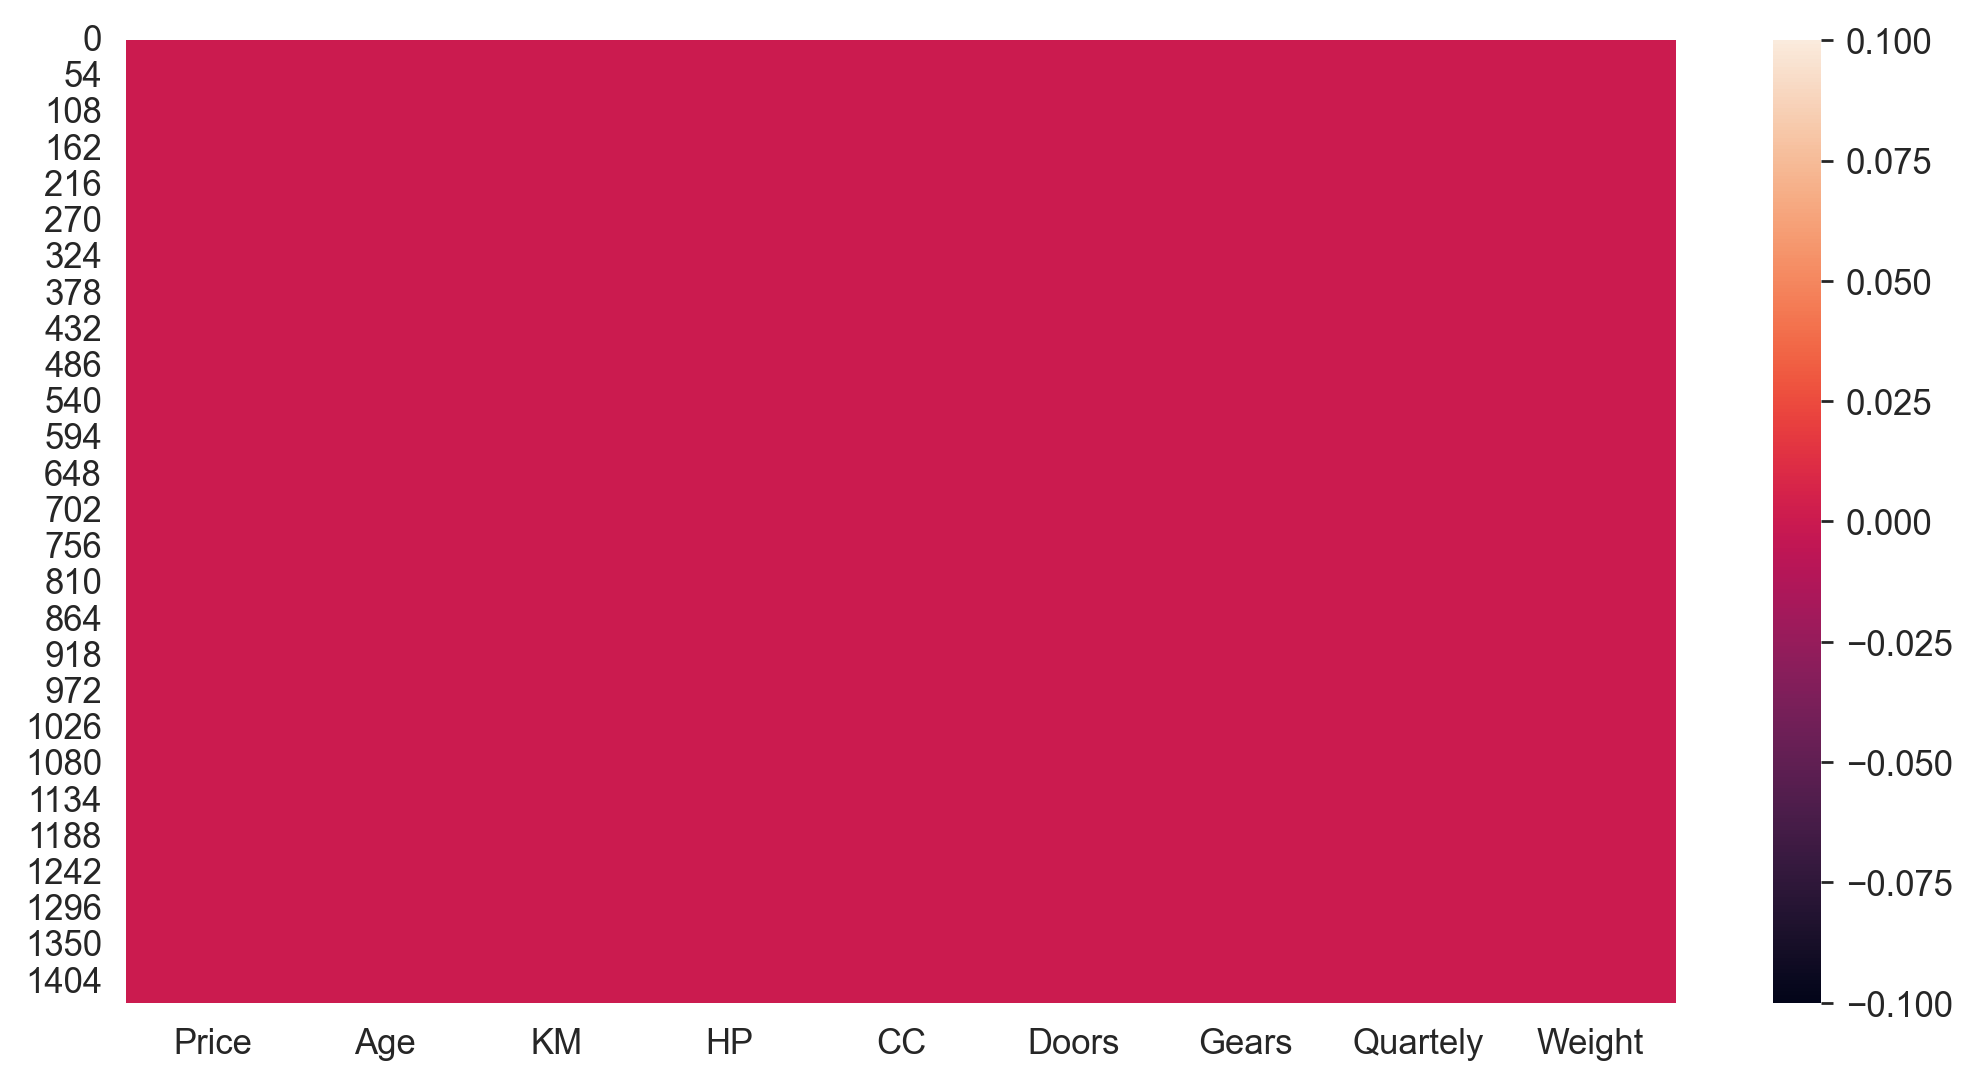

In [73]:
sns.heatmap(car.isnull())

# Outlier detection

# There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [74]:
car.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears     Quartely       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

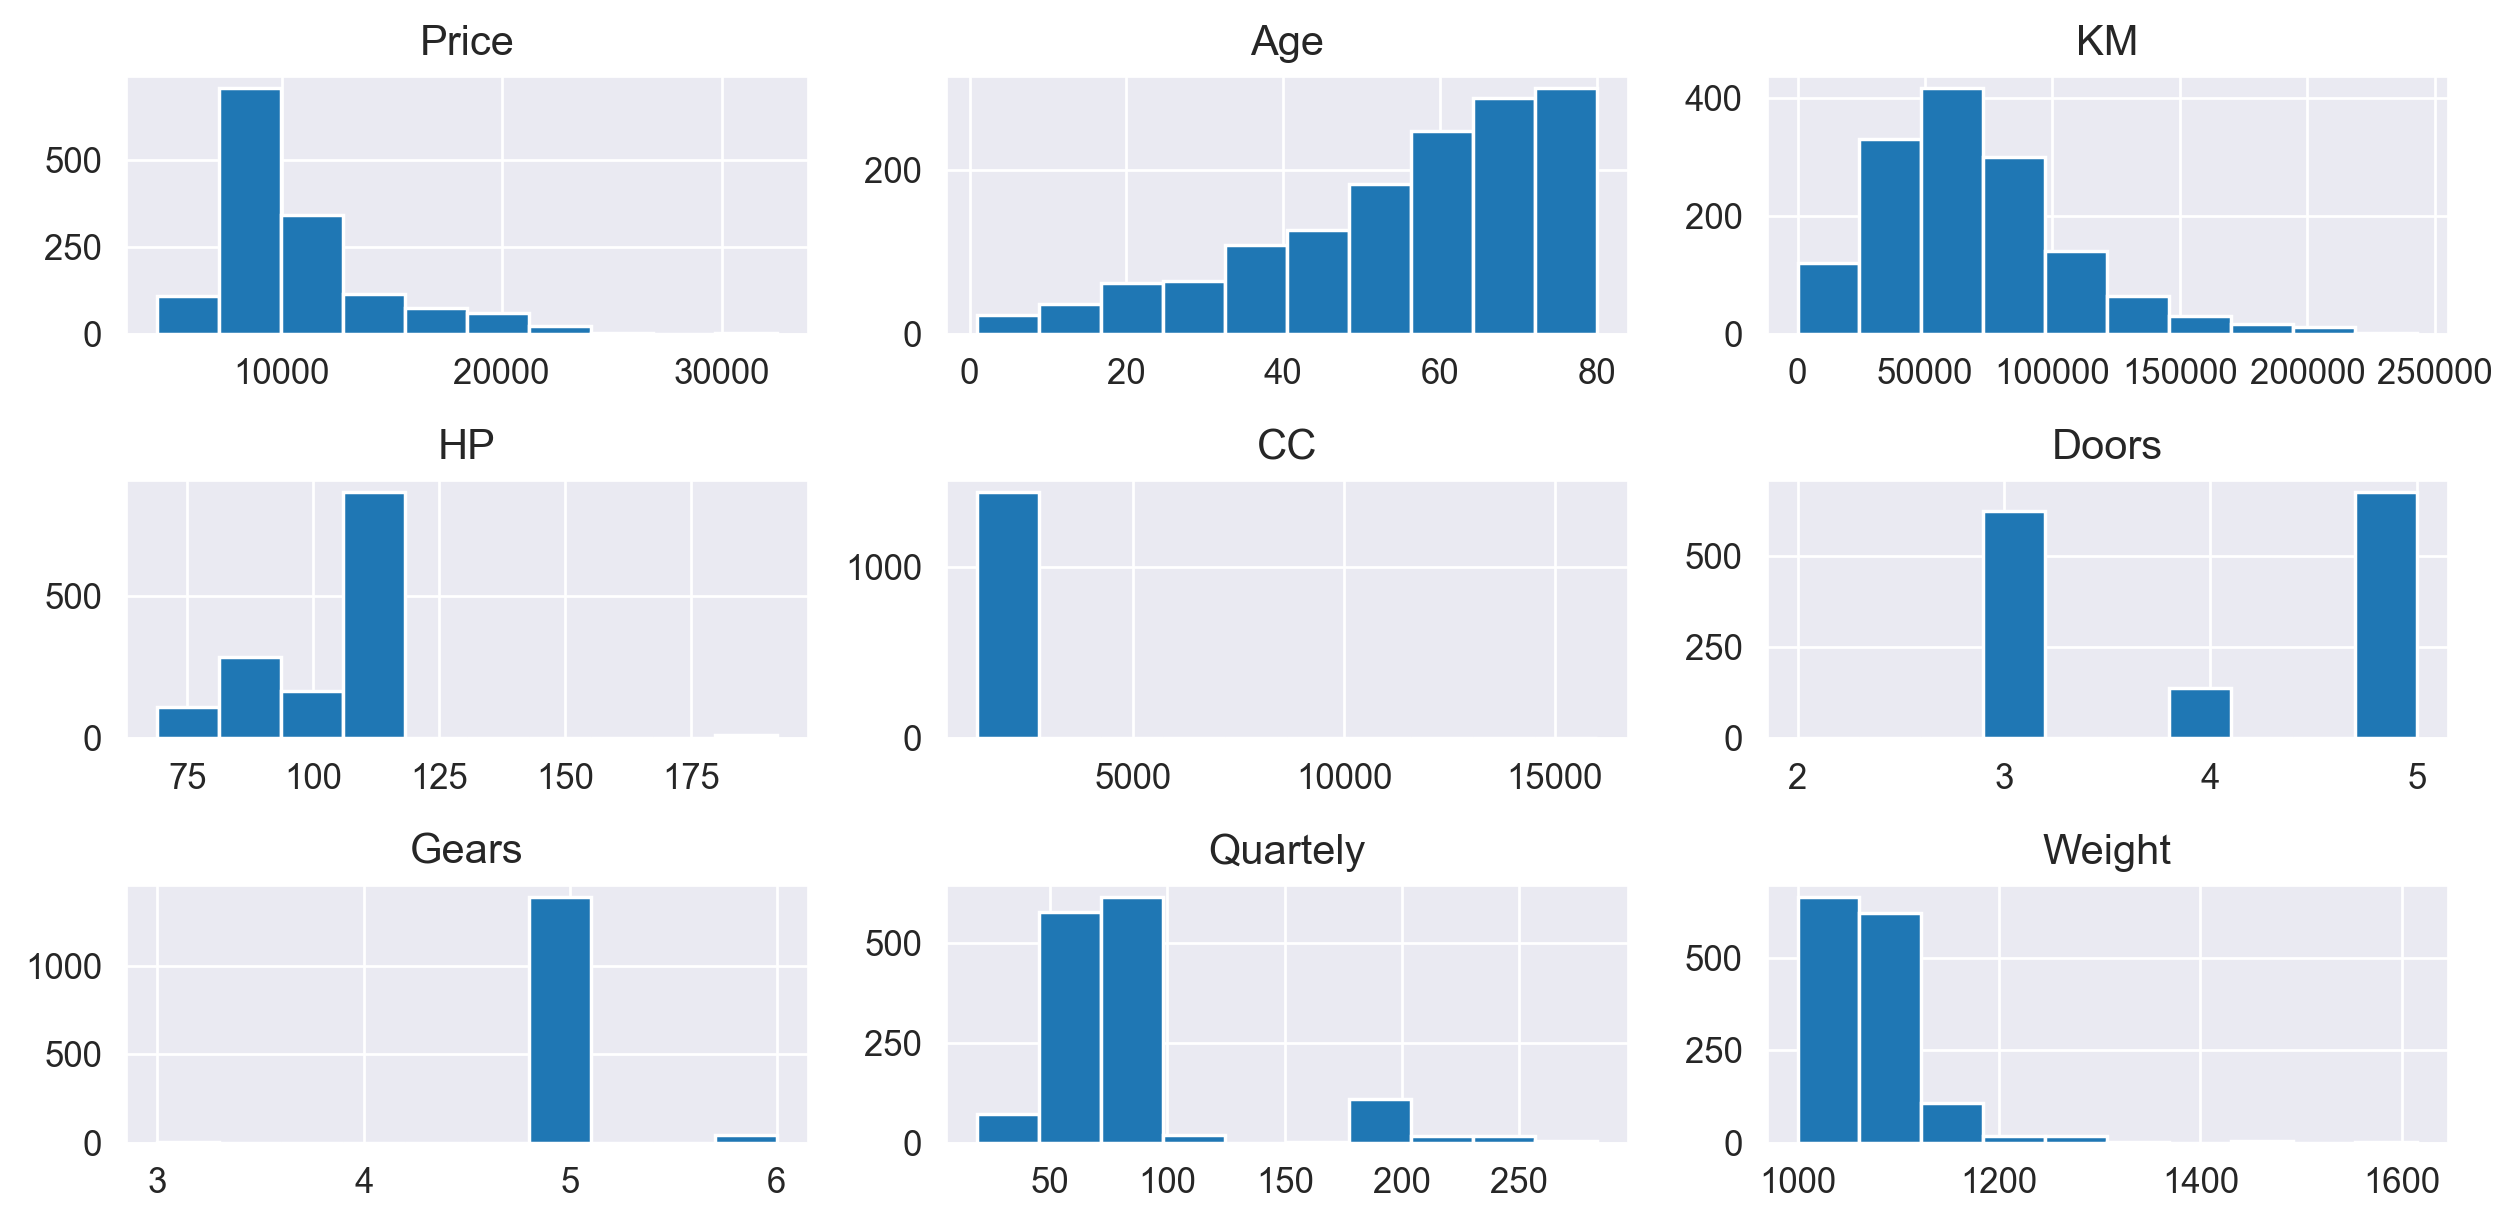

In [75]:
car.hist()
plt.tight_layout()

<Axes: >

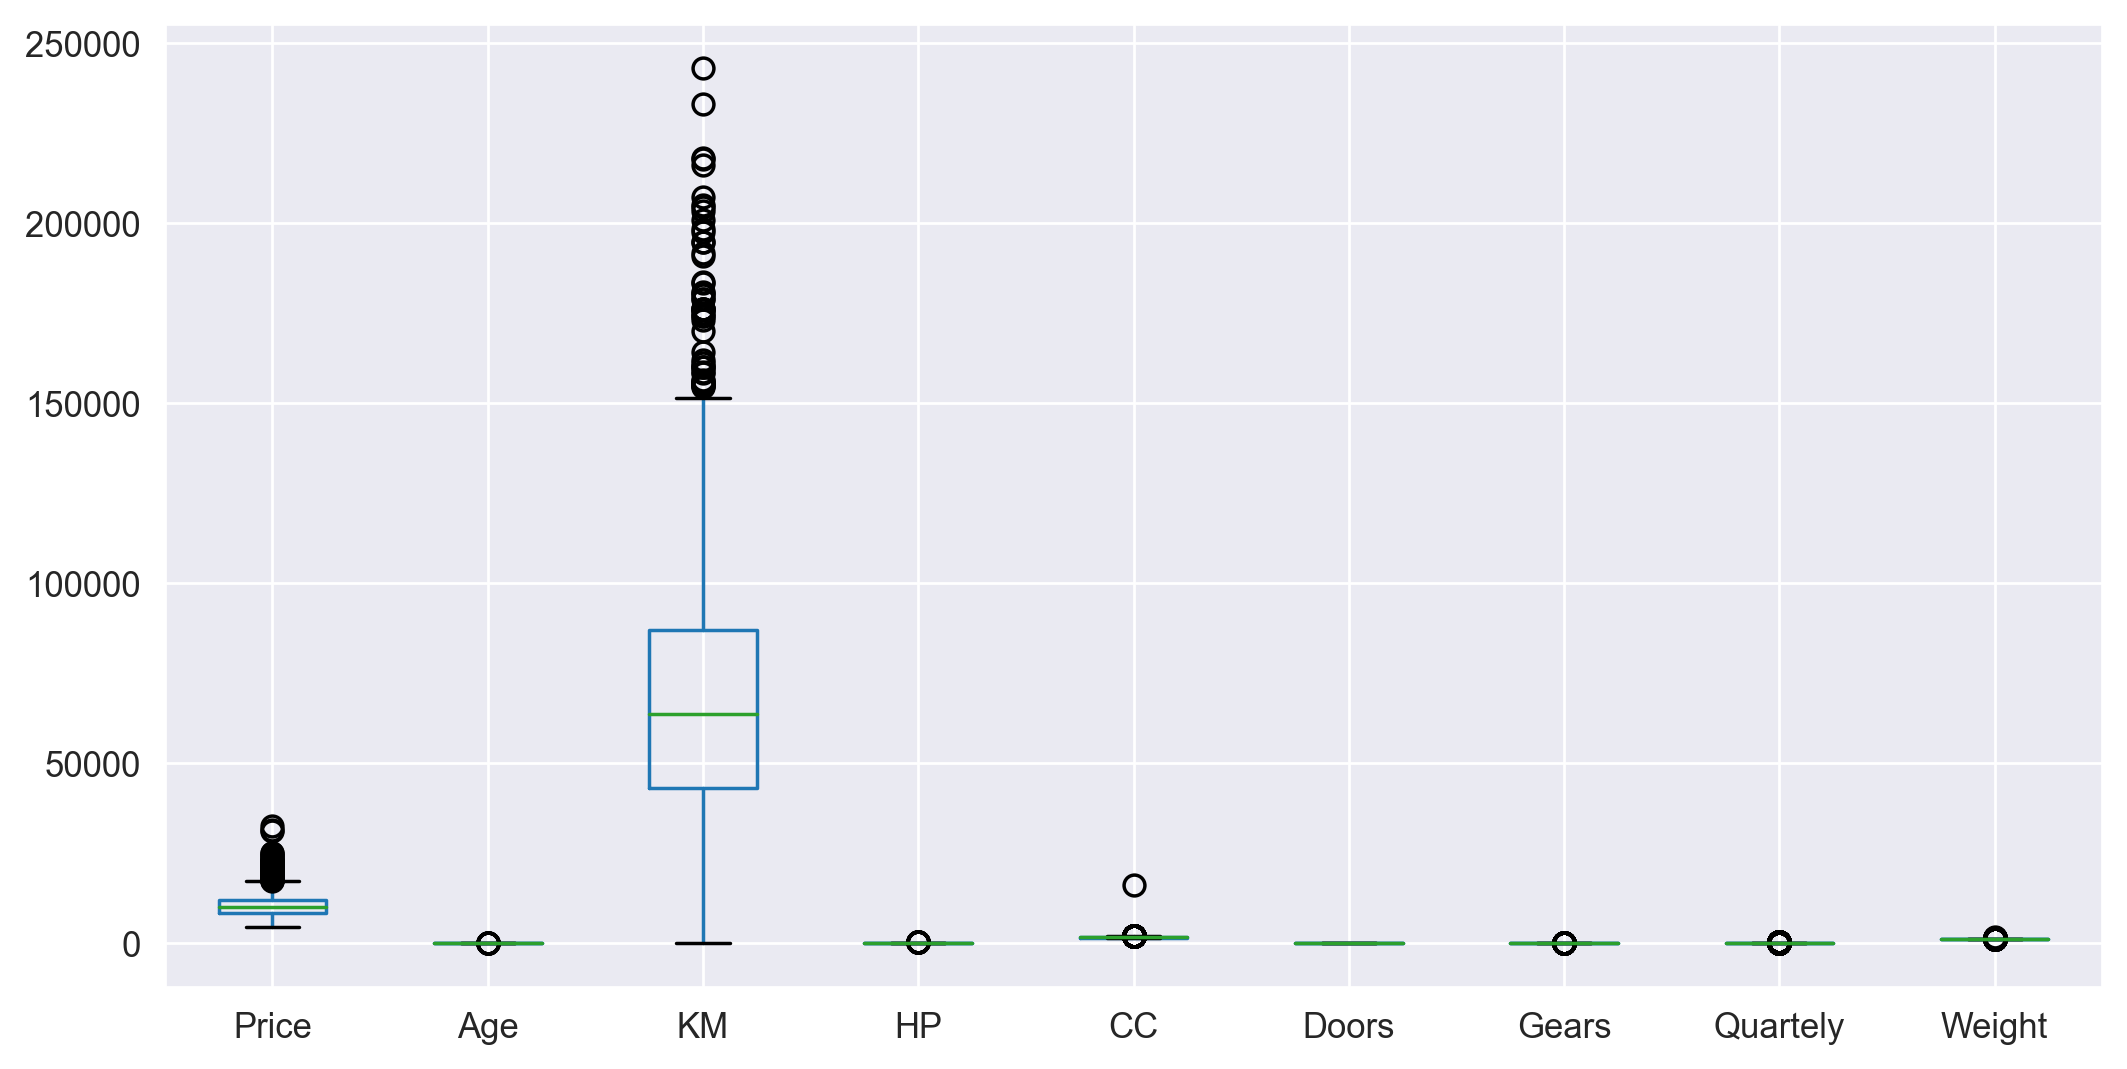

In [76]:
car.boxplot()

Text(0.5, 1.0, 'Weight')

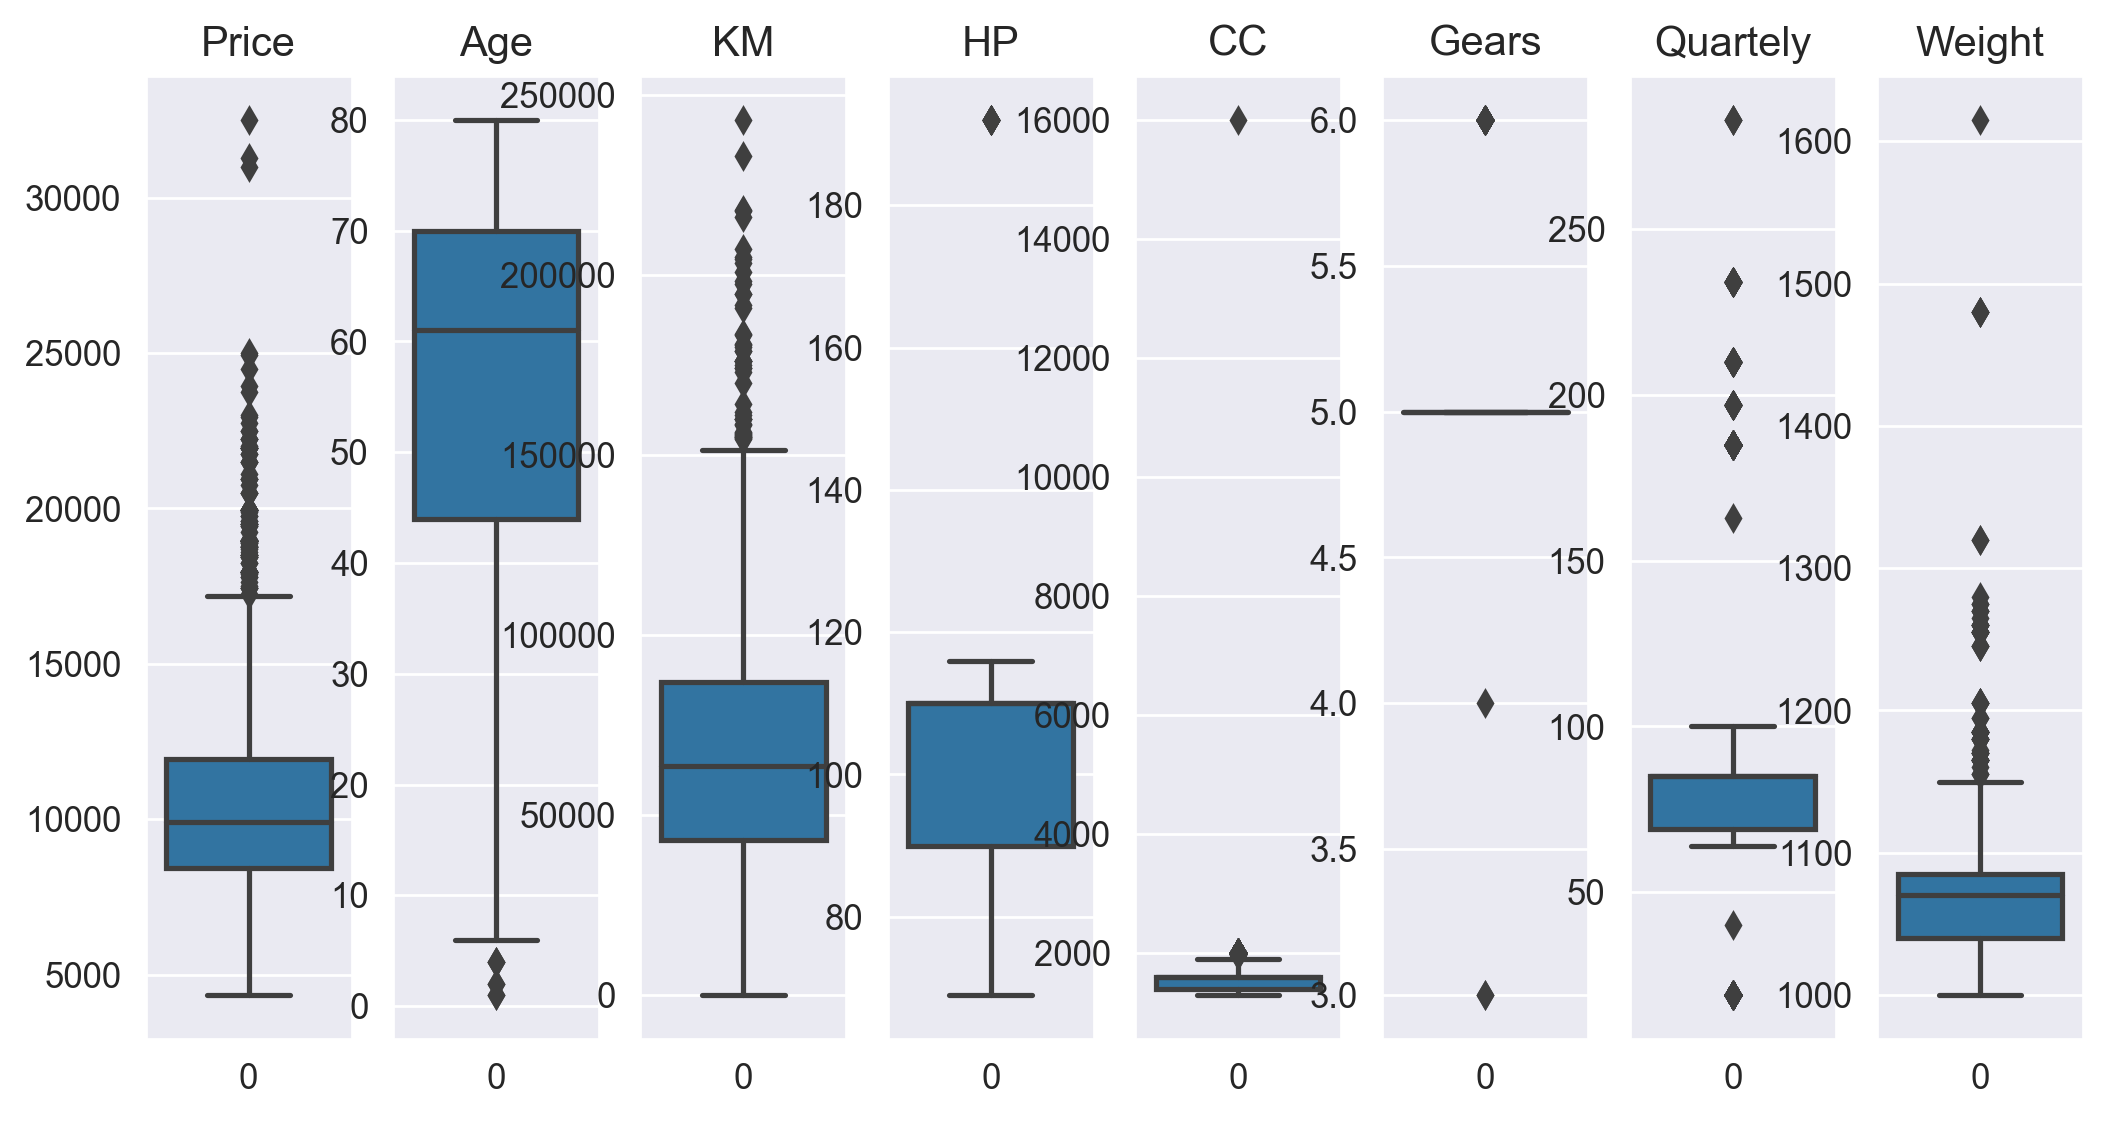

In [77]:
plt.subplot(1,8,1)
sns.boxplot(car['Price'])
plt.title("Price")

plt.subplot(1,8,2)
sns.boxplot(car['Age'])
plt.title("Age")

plt.subplot(1,8,3)
sns.boxplot(car['KM'])
plt.title("KM")

plt.subplot(1,8,4)
sns.boxplot(car['HP'])
plt.title("HP")

plt.subplot(1,8,5)
sns.boxplot(car['CC'])
plt.title("CC")

plt.subplot(1,8,6)
sns.boxplot(car['Gears'])
plt.title("Gears")

plt.subplot(1,8,7)
sns.boxplot(car['Quartely'])
plt.title("Quartely")

plt.subplot(1,8,8)
sns.boxplot(car['Weight'])
plt.title("Weight")

# Outlier detection function

In [78]:
def outlier_detection (data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [79]:
outlier_detection(car,"Price")

(3200.0, 17200.0)

In [80]:
outlier_detection(car,"Age")

(5.0, 109.0)

In [81]:
outlier_detection(car,"KM")

(-23062.25, 153103.75)

In [82]:
outlier_detection(car,"HP")

(60.0, 140.0)

In [83]:
outlier_detection(car,"CC")

(1100.0, 1900.0)

In [84]:
outlier_detection(car, "Gears")

(5.0, 5.0)

In [85]:
outlier_detection(car, "Quartely")

(45.0, 109.0)

In [86]:
outlier_detection(car, "Weight")

(972.5, 1152.5)

# lets try to create raw data set model with outliers

In [87]:
import statsmodels.formula.api as smf

In [88]:
raw_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quartely+Weight',data=car).fit()

In [89]:
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:50:19   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Quartely       3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Let's handle the outlier before handling the multicorrelation

<Axes: >

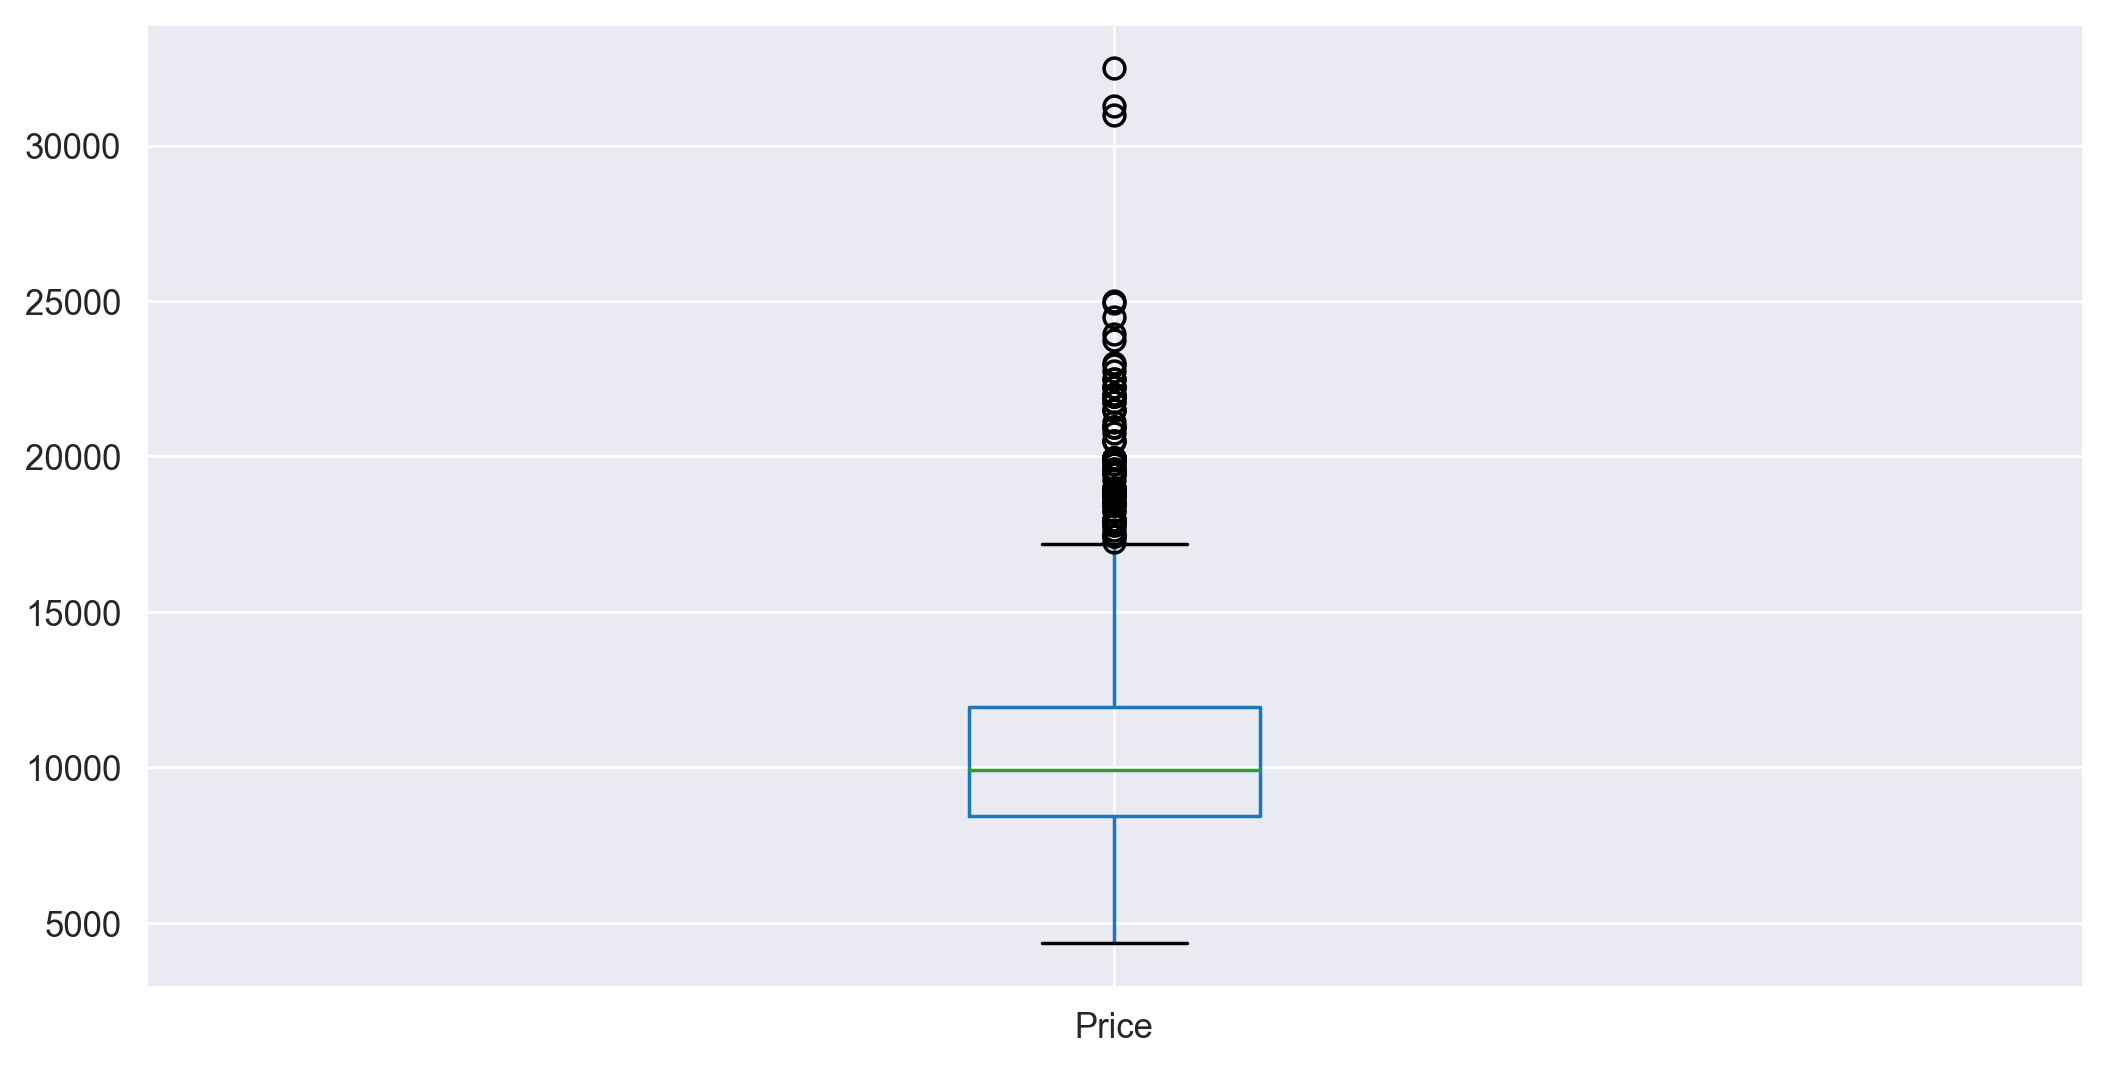

In [90]:
car.boxplot("Price")

In [91]:
car[car['Price']>17200.0]

Price  Age     KM   HP    CC  Doors  Gears  Quartely  Weight
7    18600   30  75889   90  2000      3      5       210    1245
8    21500   27  19700  192  1800      3      5       100    1185
10   20950   25  31461  192  1800      3      6       100    1185
11   19950   22  43610  192  1800      3      6       100    1185
12   19600   25  32189  192  1800      3      6       100    1185
..     ...  ...    ...  ...   ...    ...    ...       ...     ...
181  21125    2    225   97  1400      5      5        85    1110
182  21500    2     15  110  1600      5      5        85    1130
183  17795    1      1   98  1400      4      5        19    1100
184  18245    1      1  110  1600      5      5        19    1075
522  18950   49  49568  110  1600      3      5        19    1105

[109 rows x 9 columns]

In [92]:
len(car[car['Price']>17200.0])

109

In [93]:
car.loc[car['Price'] >17200.0,'Price']

7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
181    21125
182    21500
183    17795
184    18245
522    18950
Name: Price, Length: 109, dtype: int64

# Capping Outliers

In [94]:
car.loc[car['Price']>17200.0,'Price'] = 17200

Text(0.5, 1.0, 'After replacing outlier with upper extreme values')

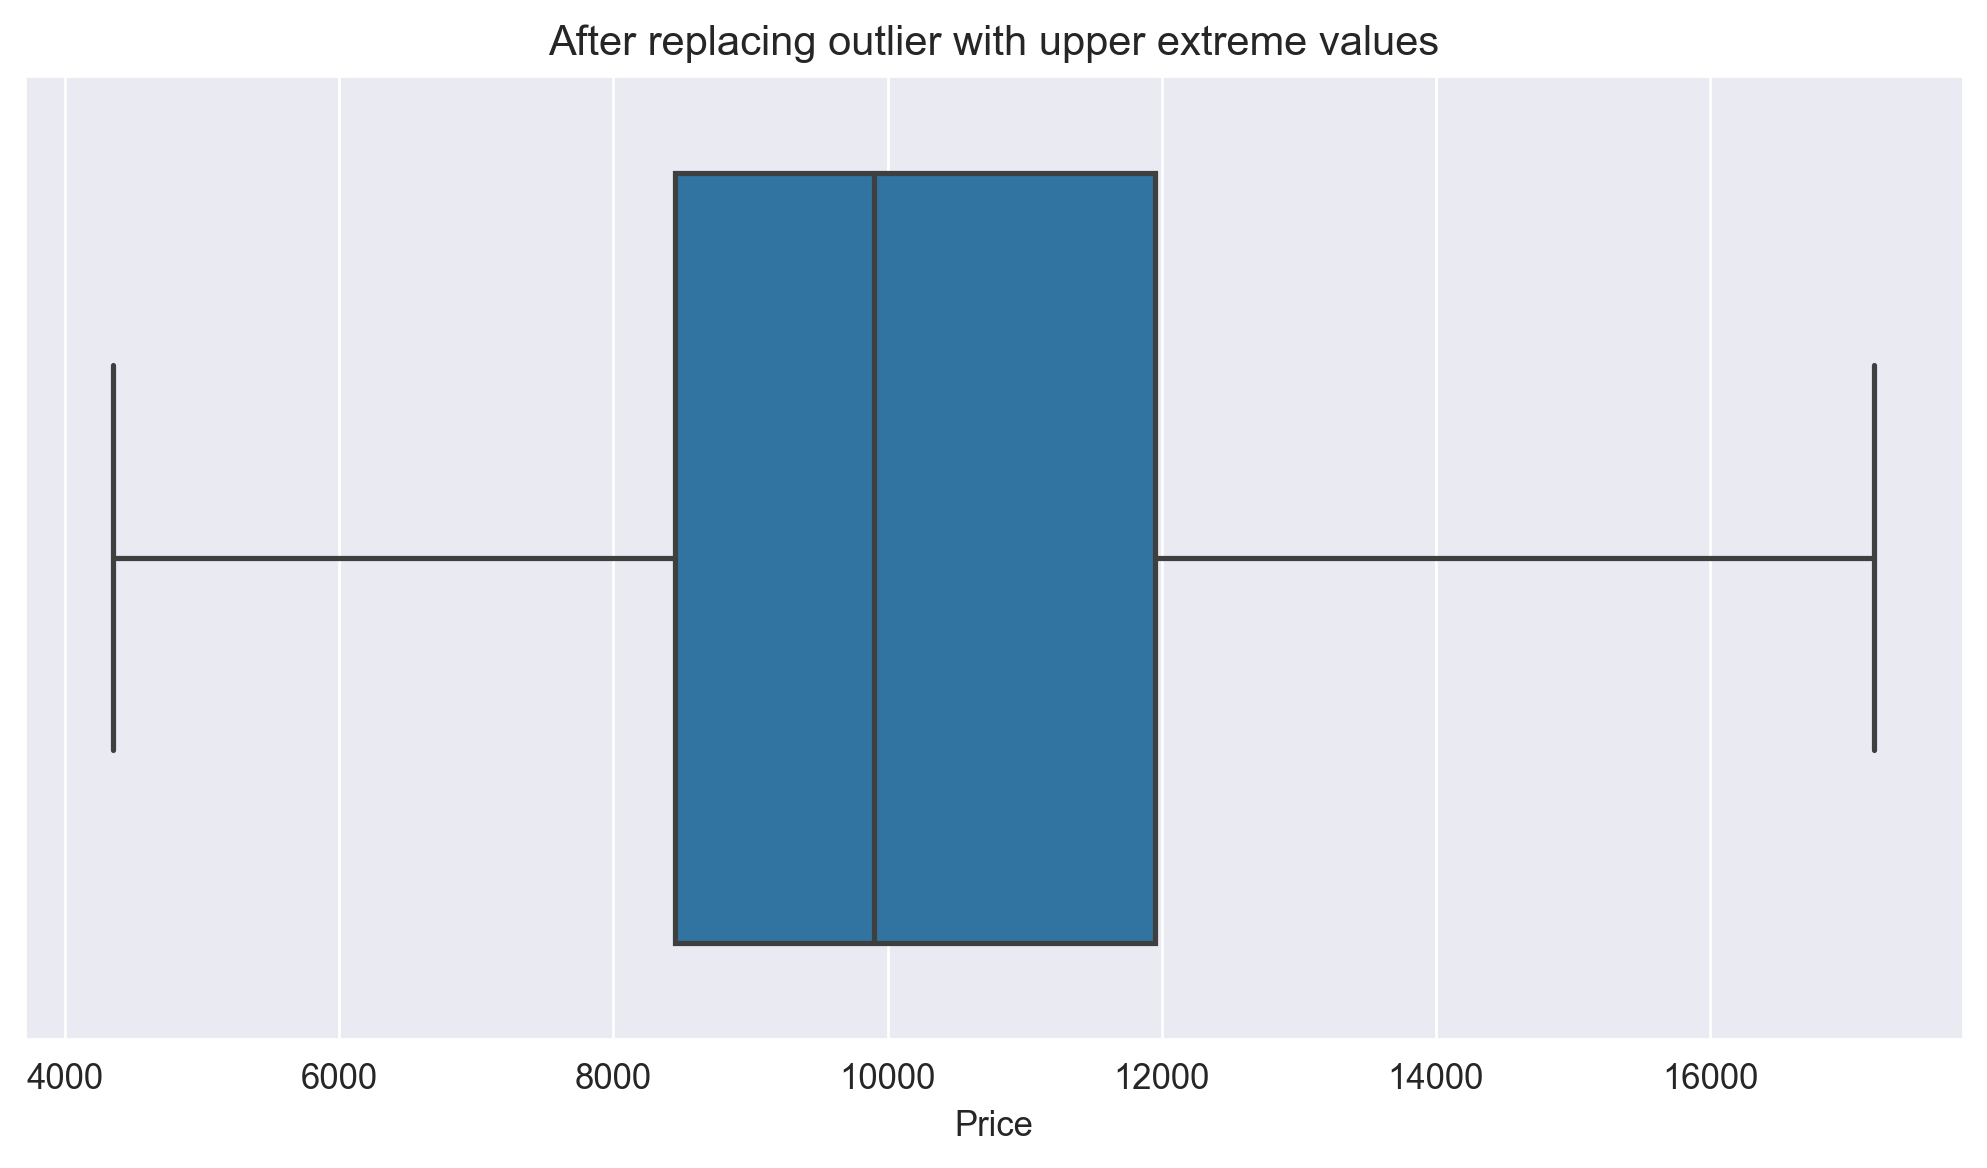

In [148]:
sns.boxplot(x = car["Price"])
plt.xlabel("Price")
plt.title ("After replacing outlier with upper extreme values")

Text(0.5, 1.0, 'Before replacing outlier with lower extreme values')

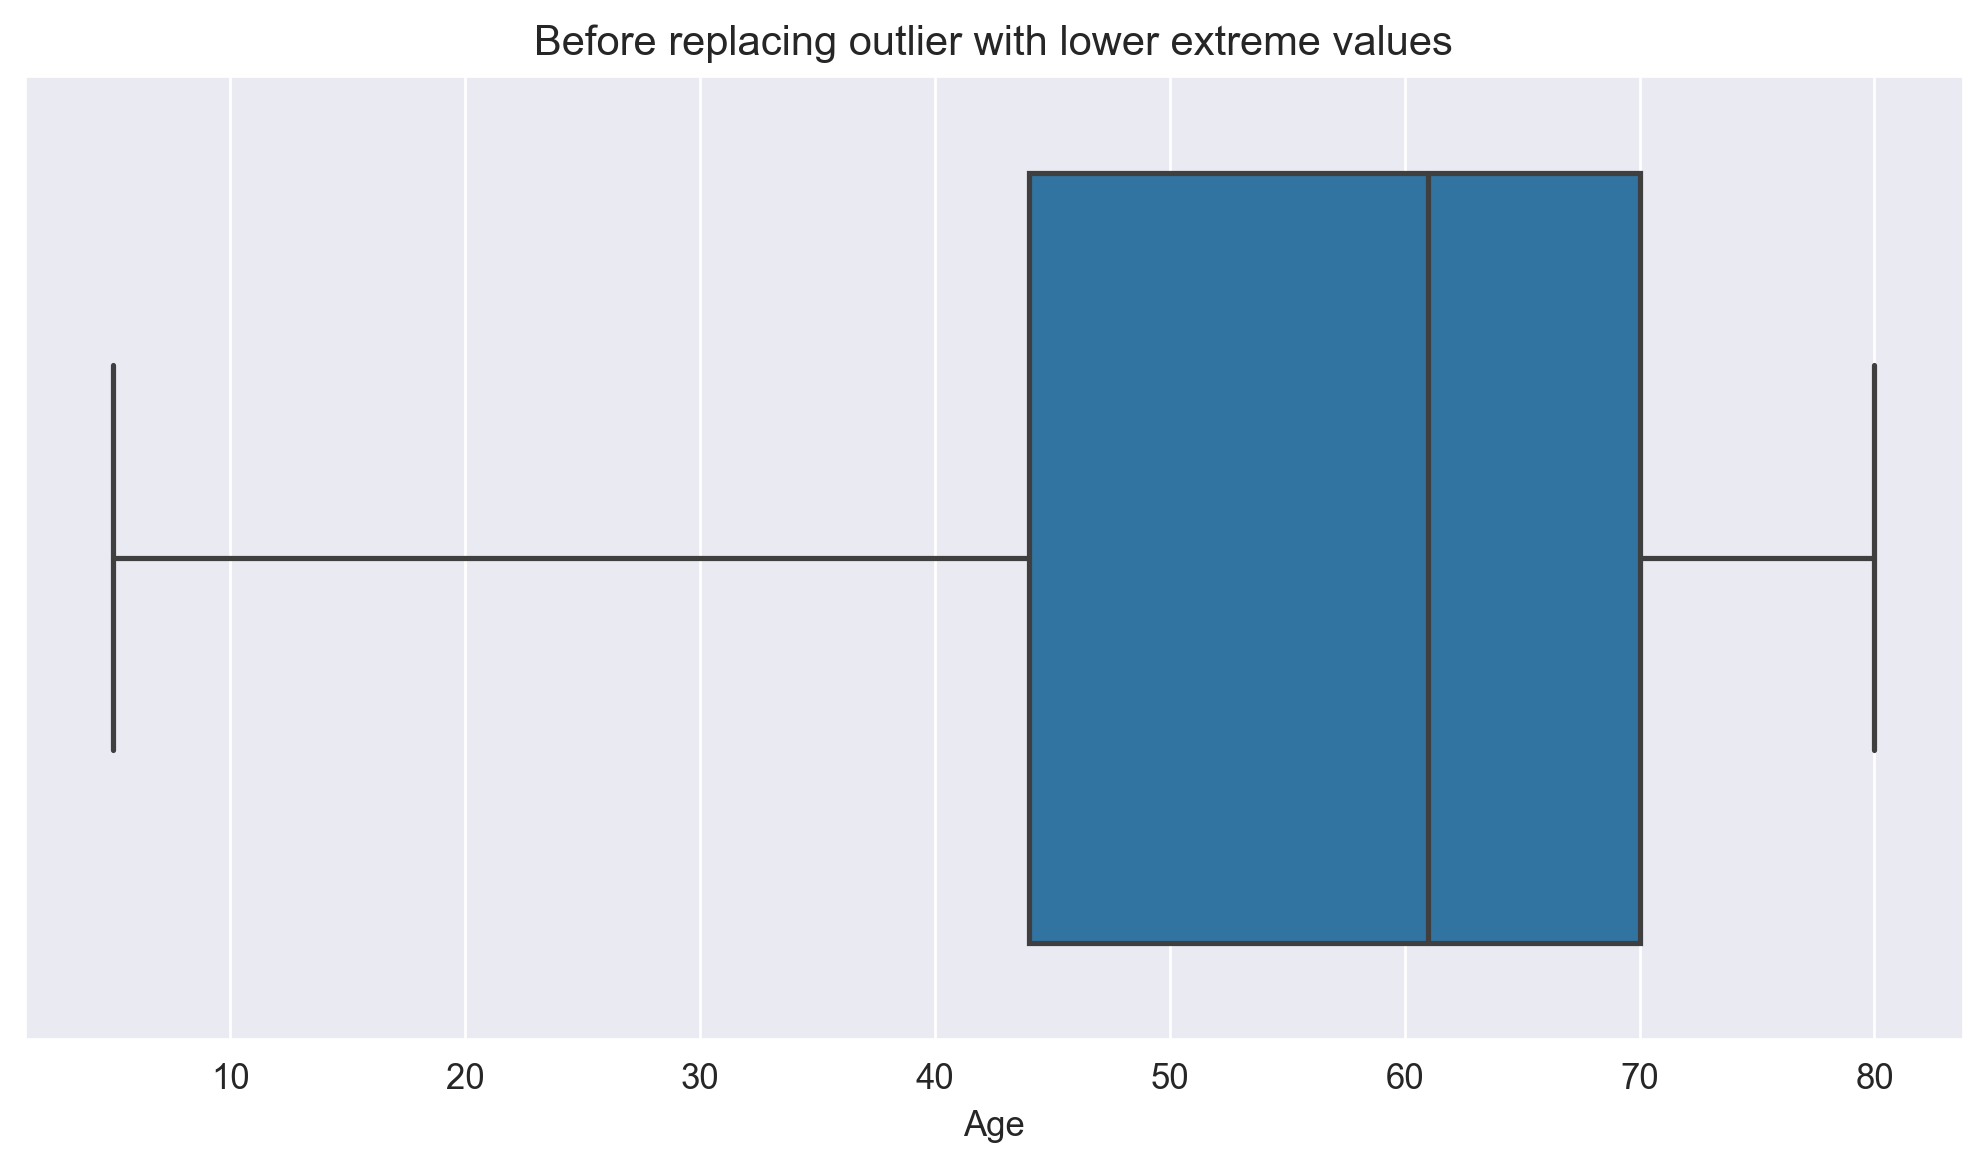

In [149]:
sns.boxplot(x = car["Age"])
plt.xlabel("Age")
plt.title ("Before replacing outlier with lower extreme values")

In [97]:
car[car['Age']<5.0]

Price  Age    KM   HP    CC  Doors  Gears  Quartely  Weight
109  17200    4     1  116  2000      5      5       283    1480
110  17200    4  4000  116  2000      5      5       283    1480
111  17200    4  1500  116  2000      5      5       283    1480
181  17200    2   225   97  1400      5      5        85    1110
182  17200    2    15  110  1600      5      5        85    1130
183  17200    1     1   98  1400      4      5        19    1100
184  17200    1     1  110  1600      5      5        19    1075

In [98]:
car.loc[car['Age']<5.0,'Age'] = 5.0

Text(0.5, 1.0, 'After replacing the outiler with lower extreme valuse')

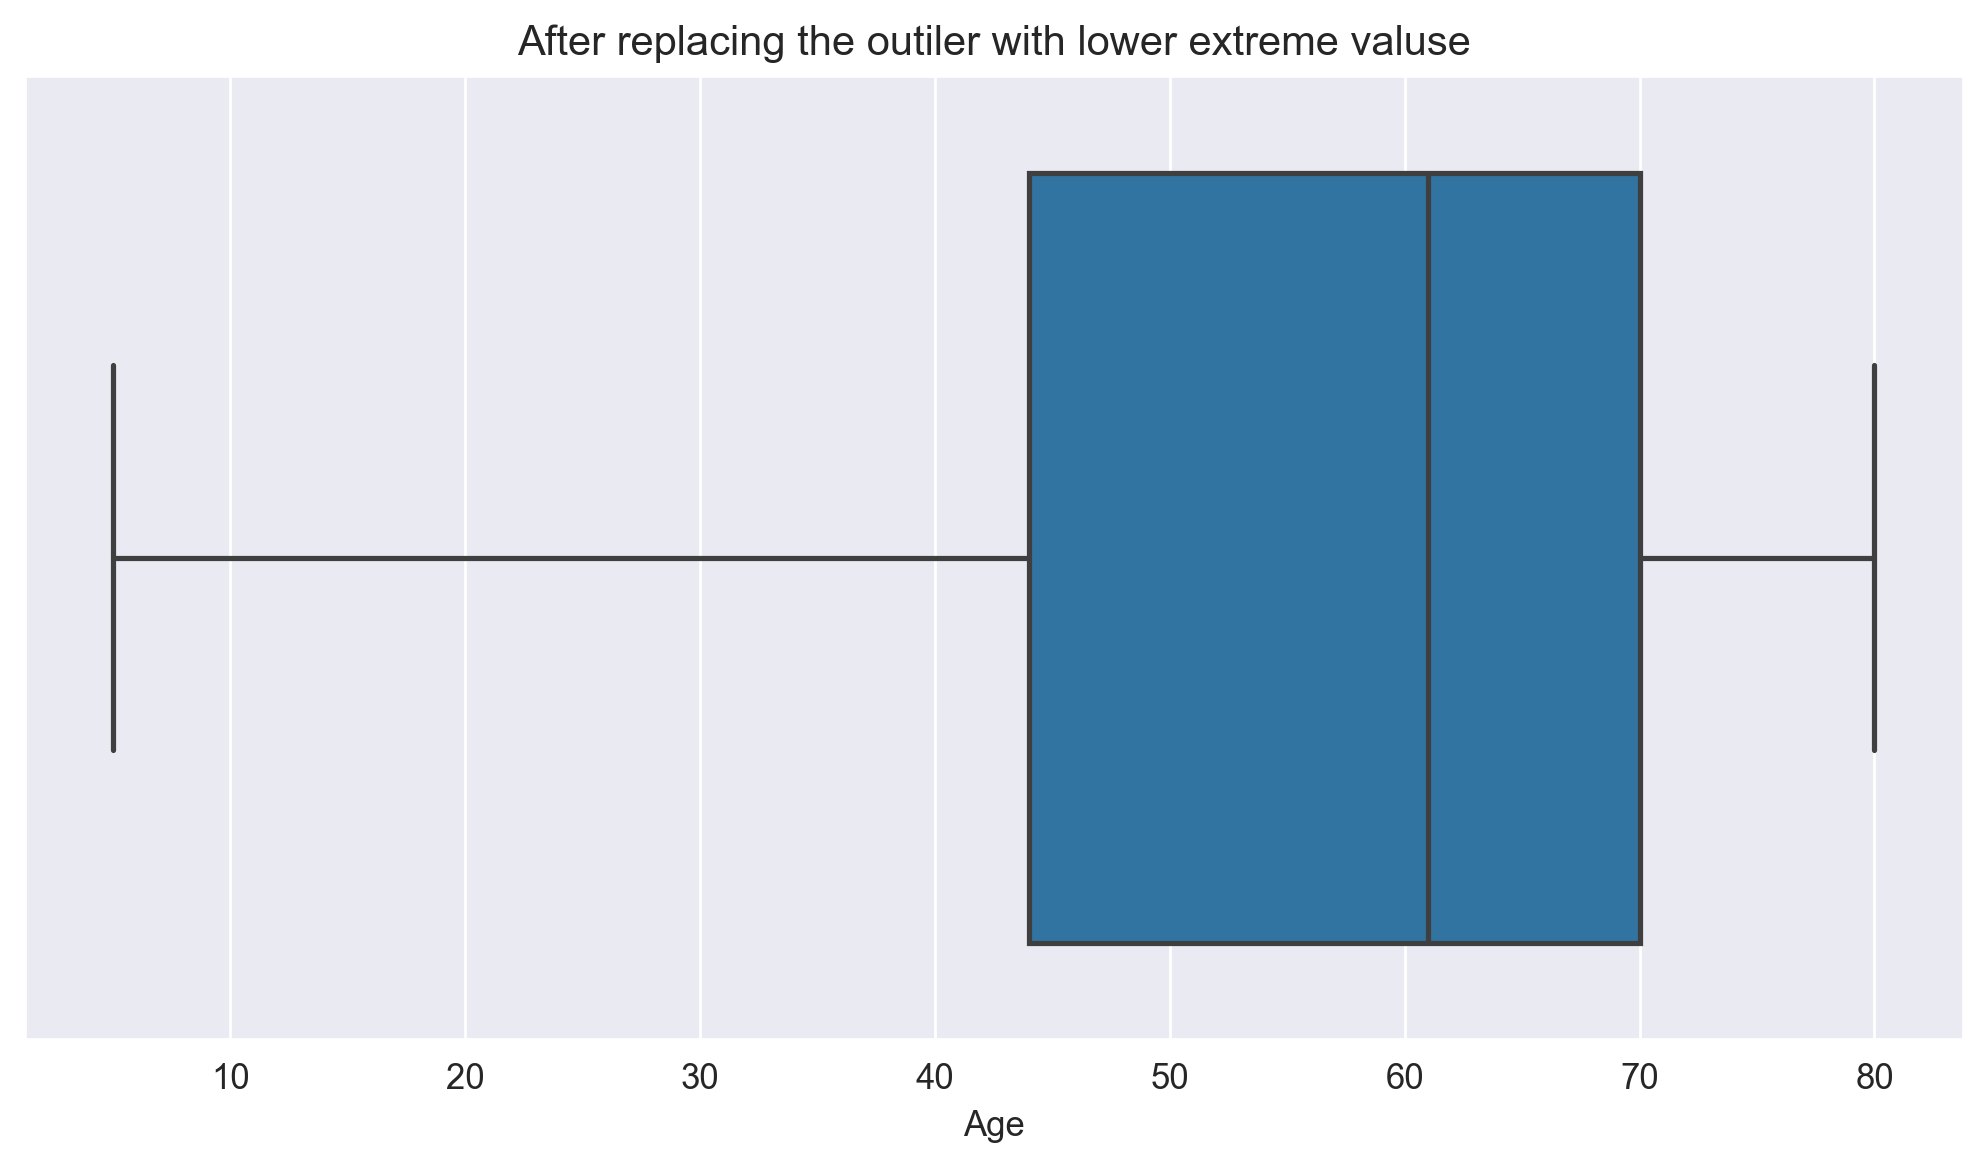

In [99]:
sns.boxplot(x=car["Age"])
plt.title("After replacing the outiler with lower extreme valuse")

Text(0.5, 1.0, 'Before replacing outlier with Upper extreme values')

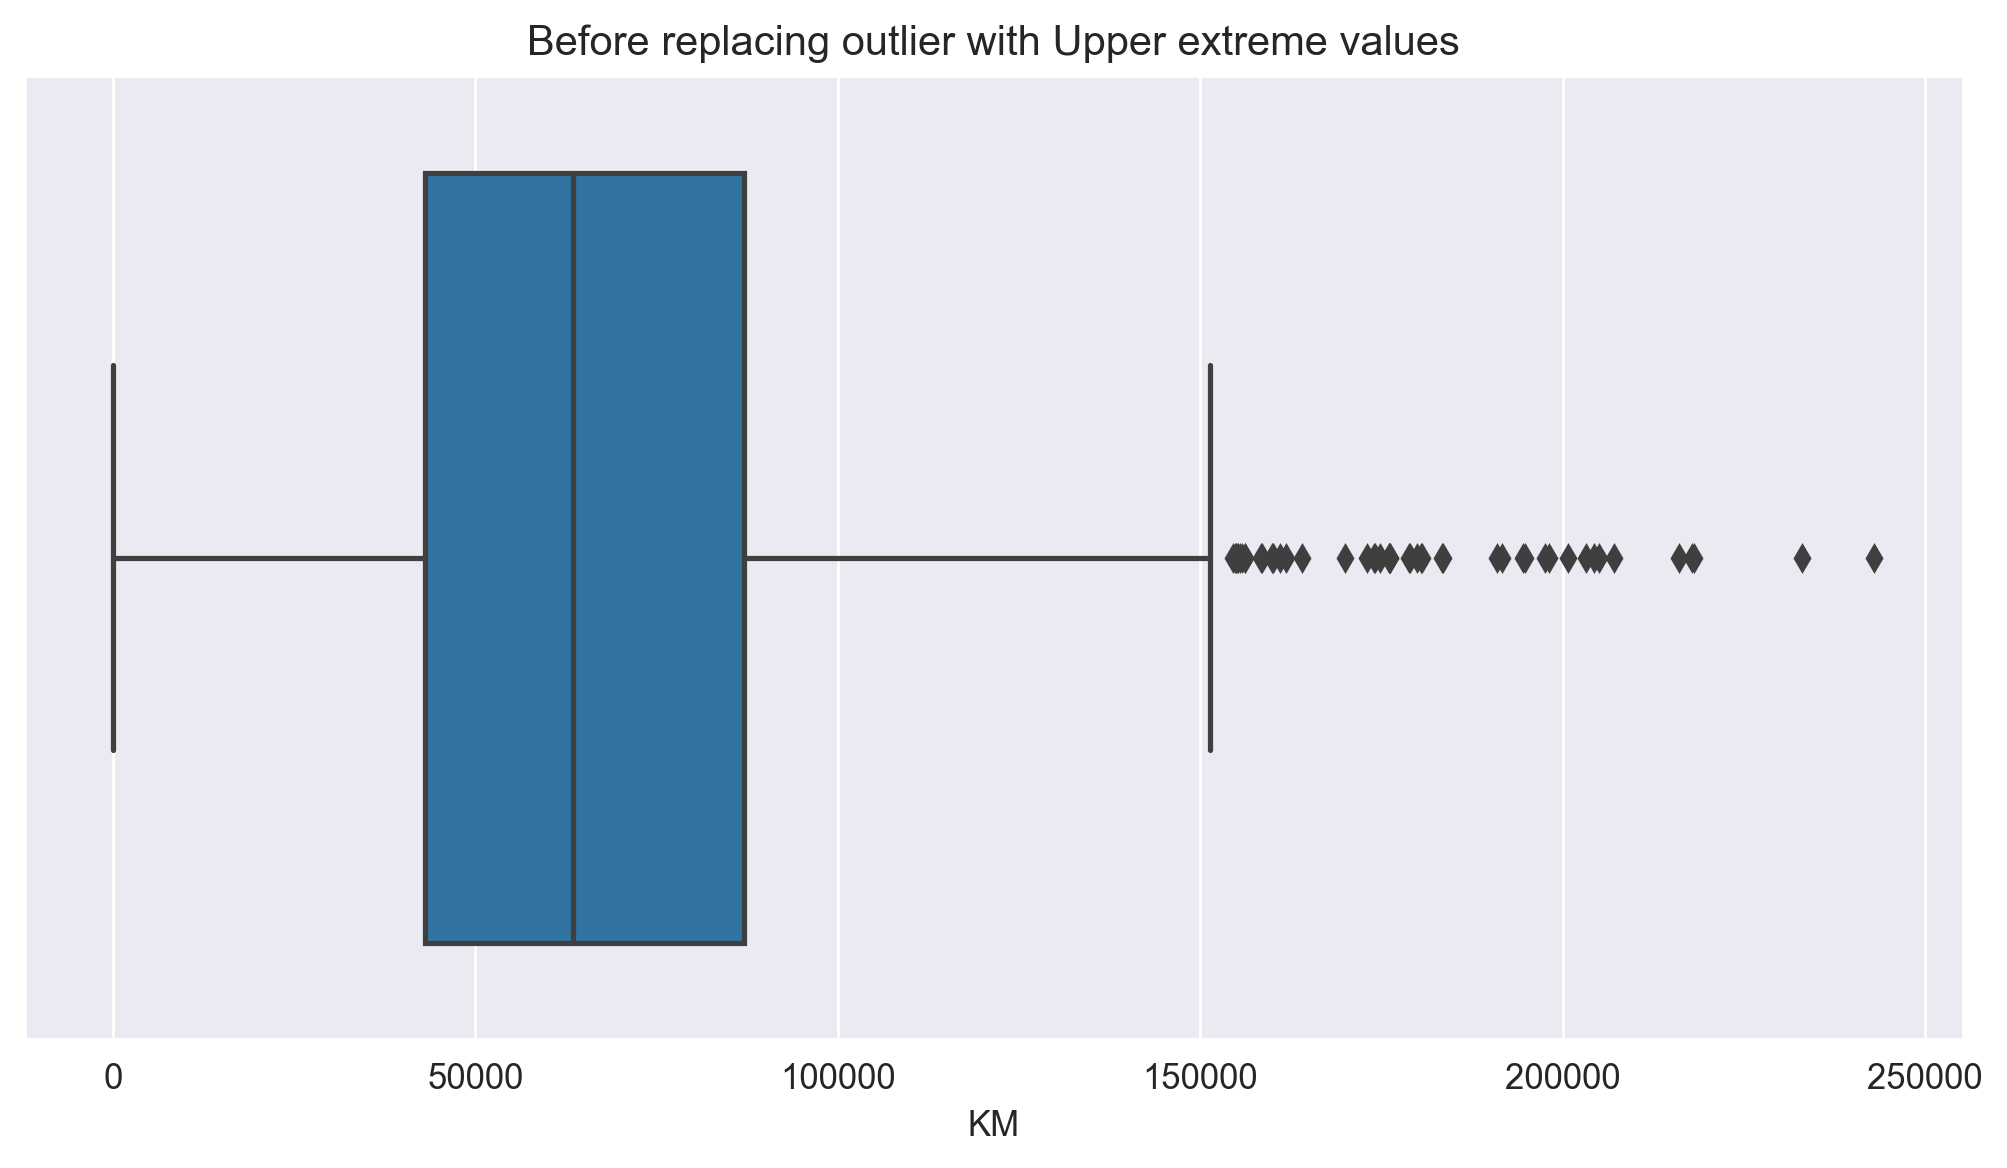

In [100]:
sns.boxplot(x = car["KM"])
plt.title ("Before replacing outlier with Upper extreme values")

In [101]:
car[car['KM']>153103.75]

Price  Age      KM   HP    CC  Doors  Gears  Quartely  Weight
185    6950   43  243000   69  1900      3      5       185    1110
186    9500   38  180638   90  2000      4      5       210    1160
187   11950   40  179860   90  2000      5      5       210    1205
188    7750   43  178858  110  1600      3      5       197    1084
189   11950   40  161000   69  1900      3      5       185    1105
190    4350   44  158320   69  1800      5      5        64    1110
377    6500   53  216000   69  1900      3      5       185    1110
378    6400   51  198167   69  1900      4      5       185    1095
379    7000   53  176000   69  1900      3      5       185    1105
380    7750   54  174139   72  2000      4      5       185    1100
381    8900   45  174000   69  1900      5      5       185    1095
602    6950   58  205000   72  2000      4      5       185    1100
603    7900   68  204250   72  2000      3      5       185    1115
604    5950   68  194545   86  1300      4      5        69    1000
605    7500   59  190900   72  2000      3      5       185    1115
606    7500   62  183500   72  2000      5      5       185    1140
607    6900   65  176184   72  2000      3      5       185    1115
608    5751   67  174833   72  2000      4      5       185    1100
609    6950   68  155720   86  1300      3      5        69    1015
610    7950   67  155500  110  1600      5      5        69    1050
611    7750   59  154783   72  2000      3      5       185    1120
612    7950   64  154462   72  2000      5      5       185    1135
1043   5900   73  232940   72  2000      5      5        40    1172
1044   6950   79  218118   72  2000      5      5       185    1150
1045   6000   78  217764   72  2000      5      5       185    1135
1046   5250   79  207114  110  1600      5      5       197    1114
1047   4400   74  203254   72  2000      3      5        64    1135
1048   6750   77  200732   72  2000      4      5       185    1100
1049   8500   69  197501   72  2000      5      5       185    1135
1050   6150   80  194765   72  2000      3      5       185    1120
1051   6950   76  191620   72  2000      5      5       185    1150
1052   5750   76  183277   72  2000      3      5       185    1115
1053   8750   78  180378   72  2000      4      5       185    1100
1054   6500   70  178800   72  2000      3      5       185    1115
1055   5950   73  176177  110  1600      5      5        85    1075
1056   6500   78  176000   86  1300      5      5        69    1035
1057  10500   77  172980   72  2000      5      5        64    1135
1058   8500   77  170000   72  2000      4      5       185    1100
1059   7950   71  164000  110  1600      3      5        19    1050
1060   5800   78  161775   86  1300      3      5        69    1015
1061   6750   80  160000   86  1300      3      5        69    1015
1062   6950   78  159968   72  2000      3      5       185    1115
1063   5740   74  159908  110  1600      3      5        69    1050
1064   6550   73  158492   86  1300      3      5        69    1015
1065   8950   69  156204   72  2000      3      5       185    1115
1066   6750   73  156169   86  1300      5      5        69    1035
1067   7950   78  155210  110  1600      3      5        69    1050
1068   7950   69  155000   72  2000      3      5       185    1115
1069   7450   76  154900   72  2000      5      5       185    1140

In [102]:
len(car[car['KM']>153103.75])

49

In [103]:
car.loc[car["KM"]>153103, "KM"] = 153103

Text(0.5, 1.0, 'After replacing the outiler with extreme values')

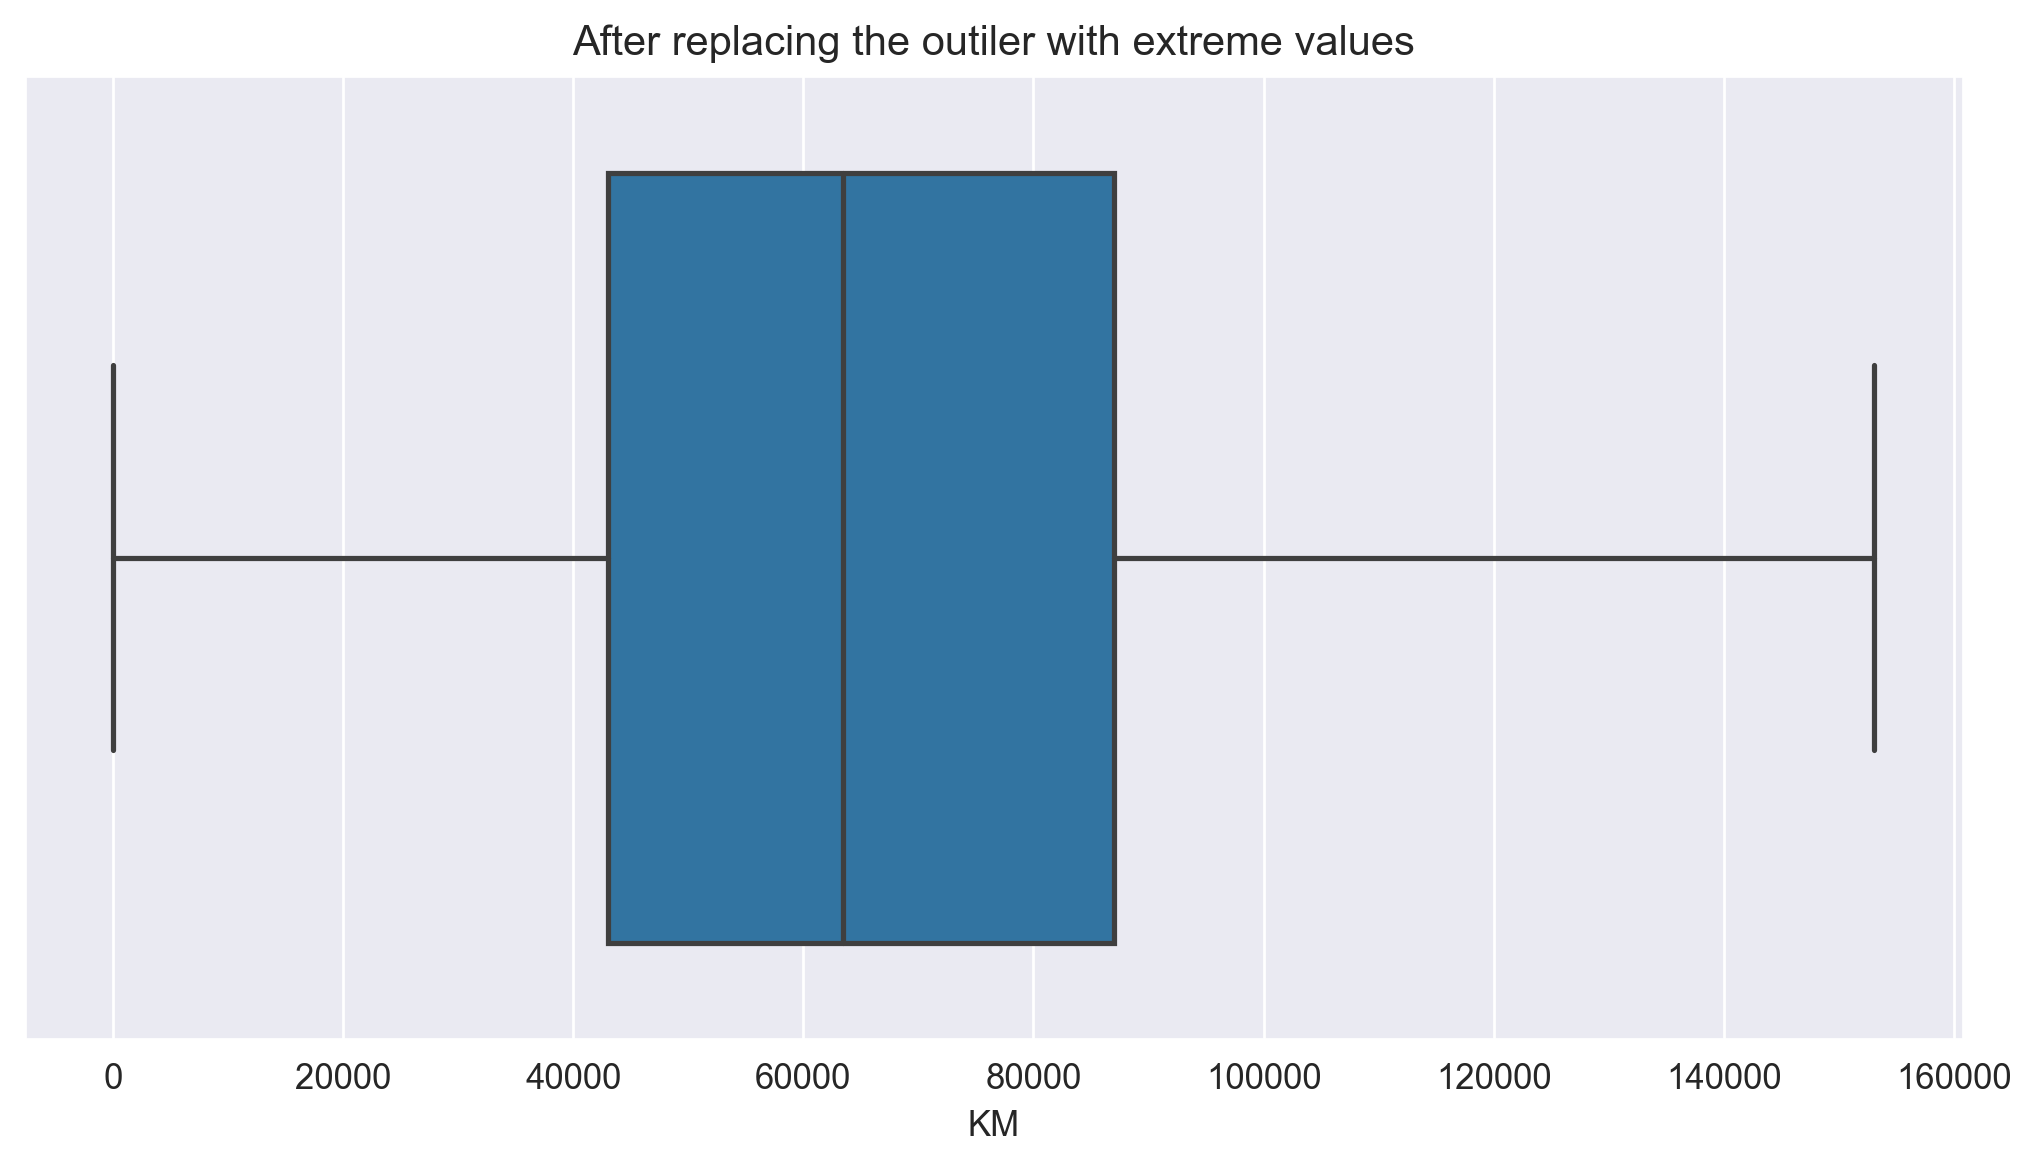

In [104]:
sns.boxplot(x = car["KM"])
plt.title ("After replacing the outiler with extreme values")

In [105]:
car.head()

Price  Age     KM  HP    CC  Doors  Gears  Quartely  Weight
0  13500   23  46986  90  2000      3      5       210    1165
1  13750   23  72937  90  2000      3      5       210    1165
2  13950   24  41711  90  2000      3      5       210    1165
3  14950   26  48000  90  2000      3      5       210    1165
4  13750   30  38500  90  2000      3      5       210    1170

Text(0.5, 1.0, 'Before the outlier replacing with upper extreme values')

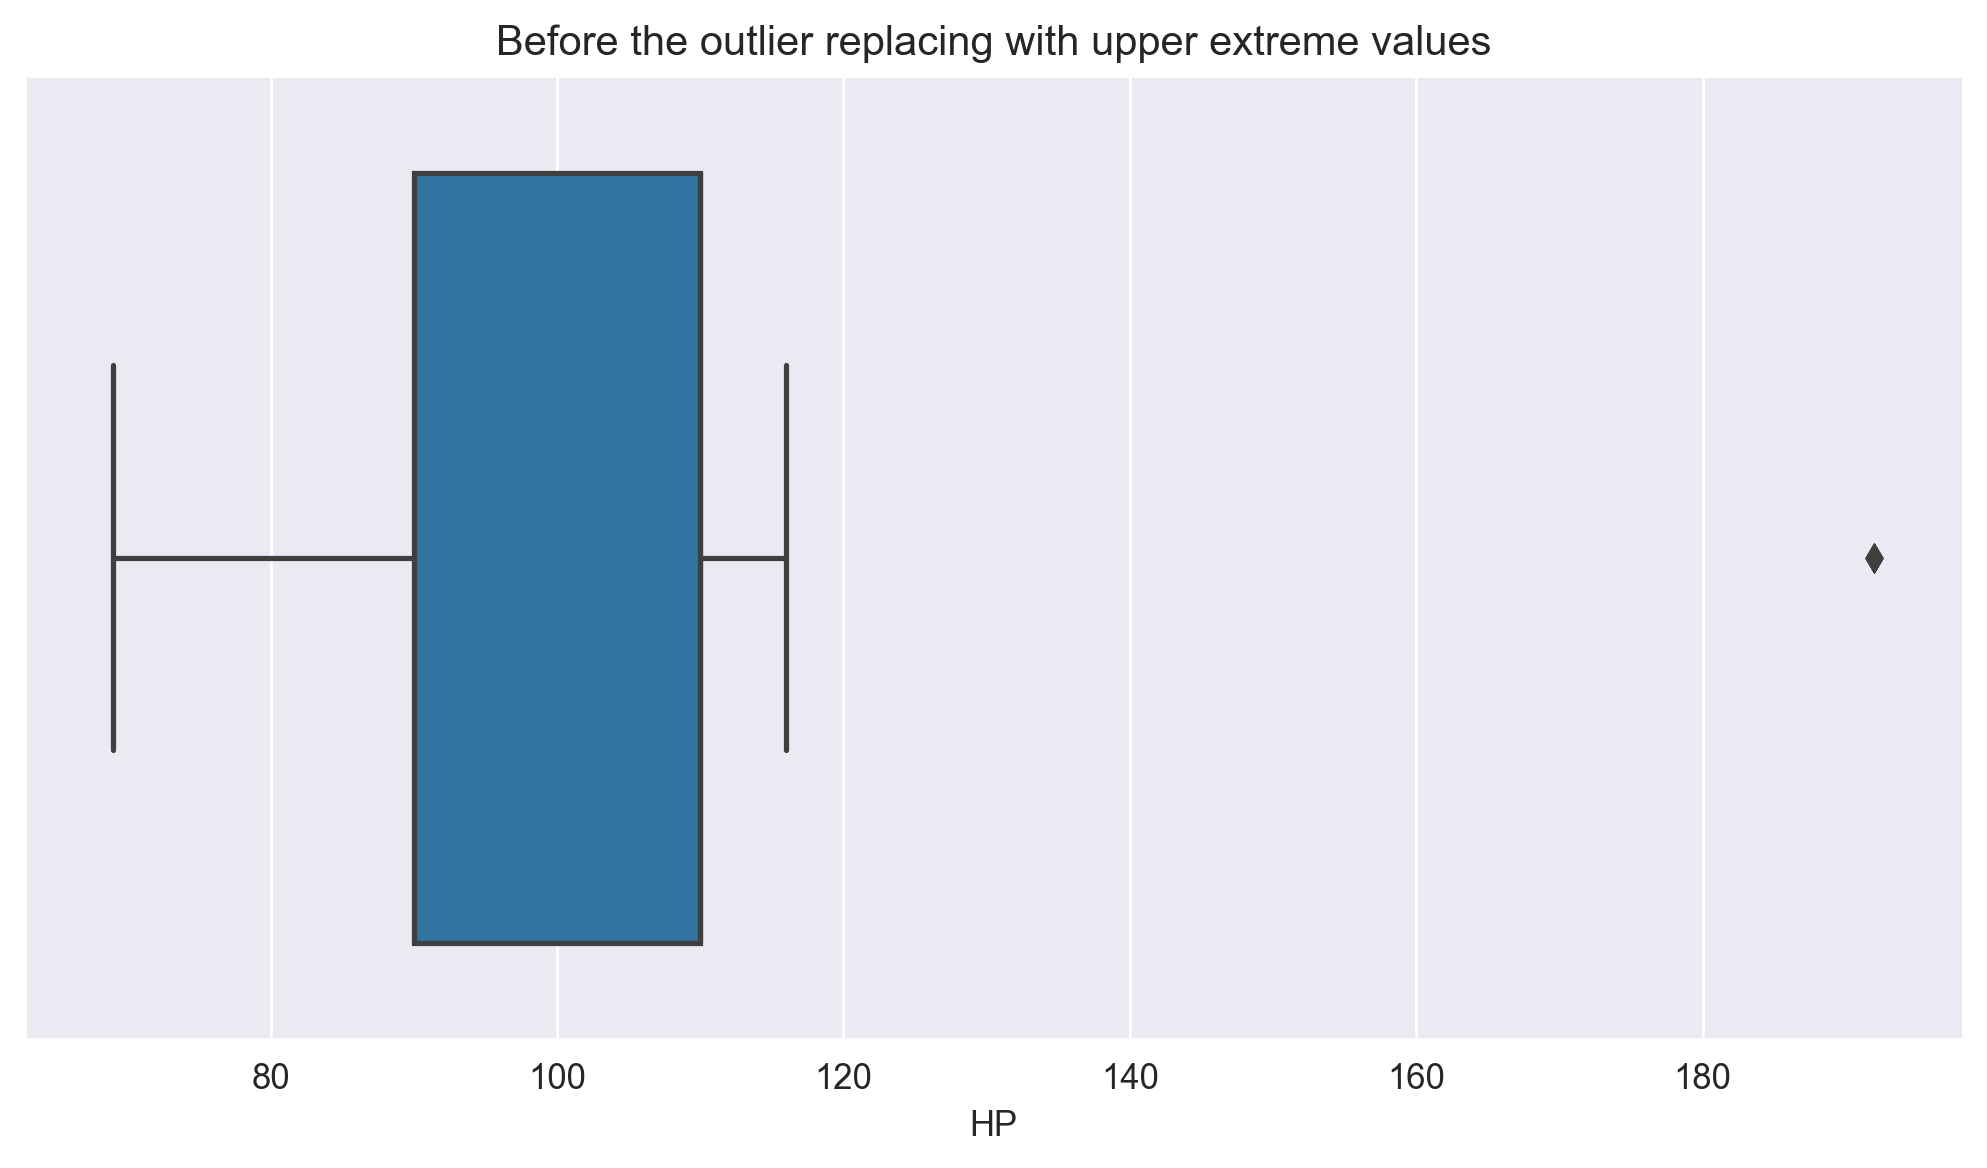

In [106]:
sns.boxplot(x = car["HP"])
plt.title ("Before the outlier replacing with upper extreme values")

In [107]:
outlier_detection(car,"HP")

(60.0, 140.0)

In [108]:
car[car["HP"]>140.0]

Price  Age     KM   HP    CC  Doors  Gears  Quartely  Weight
8    17200   27  19700  192  1800      3      5       100    1185
10   17200   25  31461  192  1800      3      6       100    1185
11   17200   22  43610  192  1800      3      6       100    1185
12   17200   25  32189  192  1800      3      6       100    1185
13   17200   31  23000  192  1800      3      6       100    1185
14   17200   32  34131  192  1800      3      6       100    1185
15   17200   28  18739  192  1800      3      6       100    1185
16   17200   30  34000  192  1800      3      5       100    1185
49   17200   31  64982  192  1800      5      6       100    1195
53   17200   27  49866  192  1800      5      5       100    1195
140  17200   19  21684  192  1800      5      5        19    1185

In [109]:
len(car[car["HP"]>140.0])

11

In [110]:
car.loc[car["HP"]>140.0, "HP"] = 140.0

Text(0.5, 1.0, 'After replacing outlier with upper extreme Values')

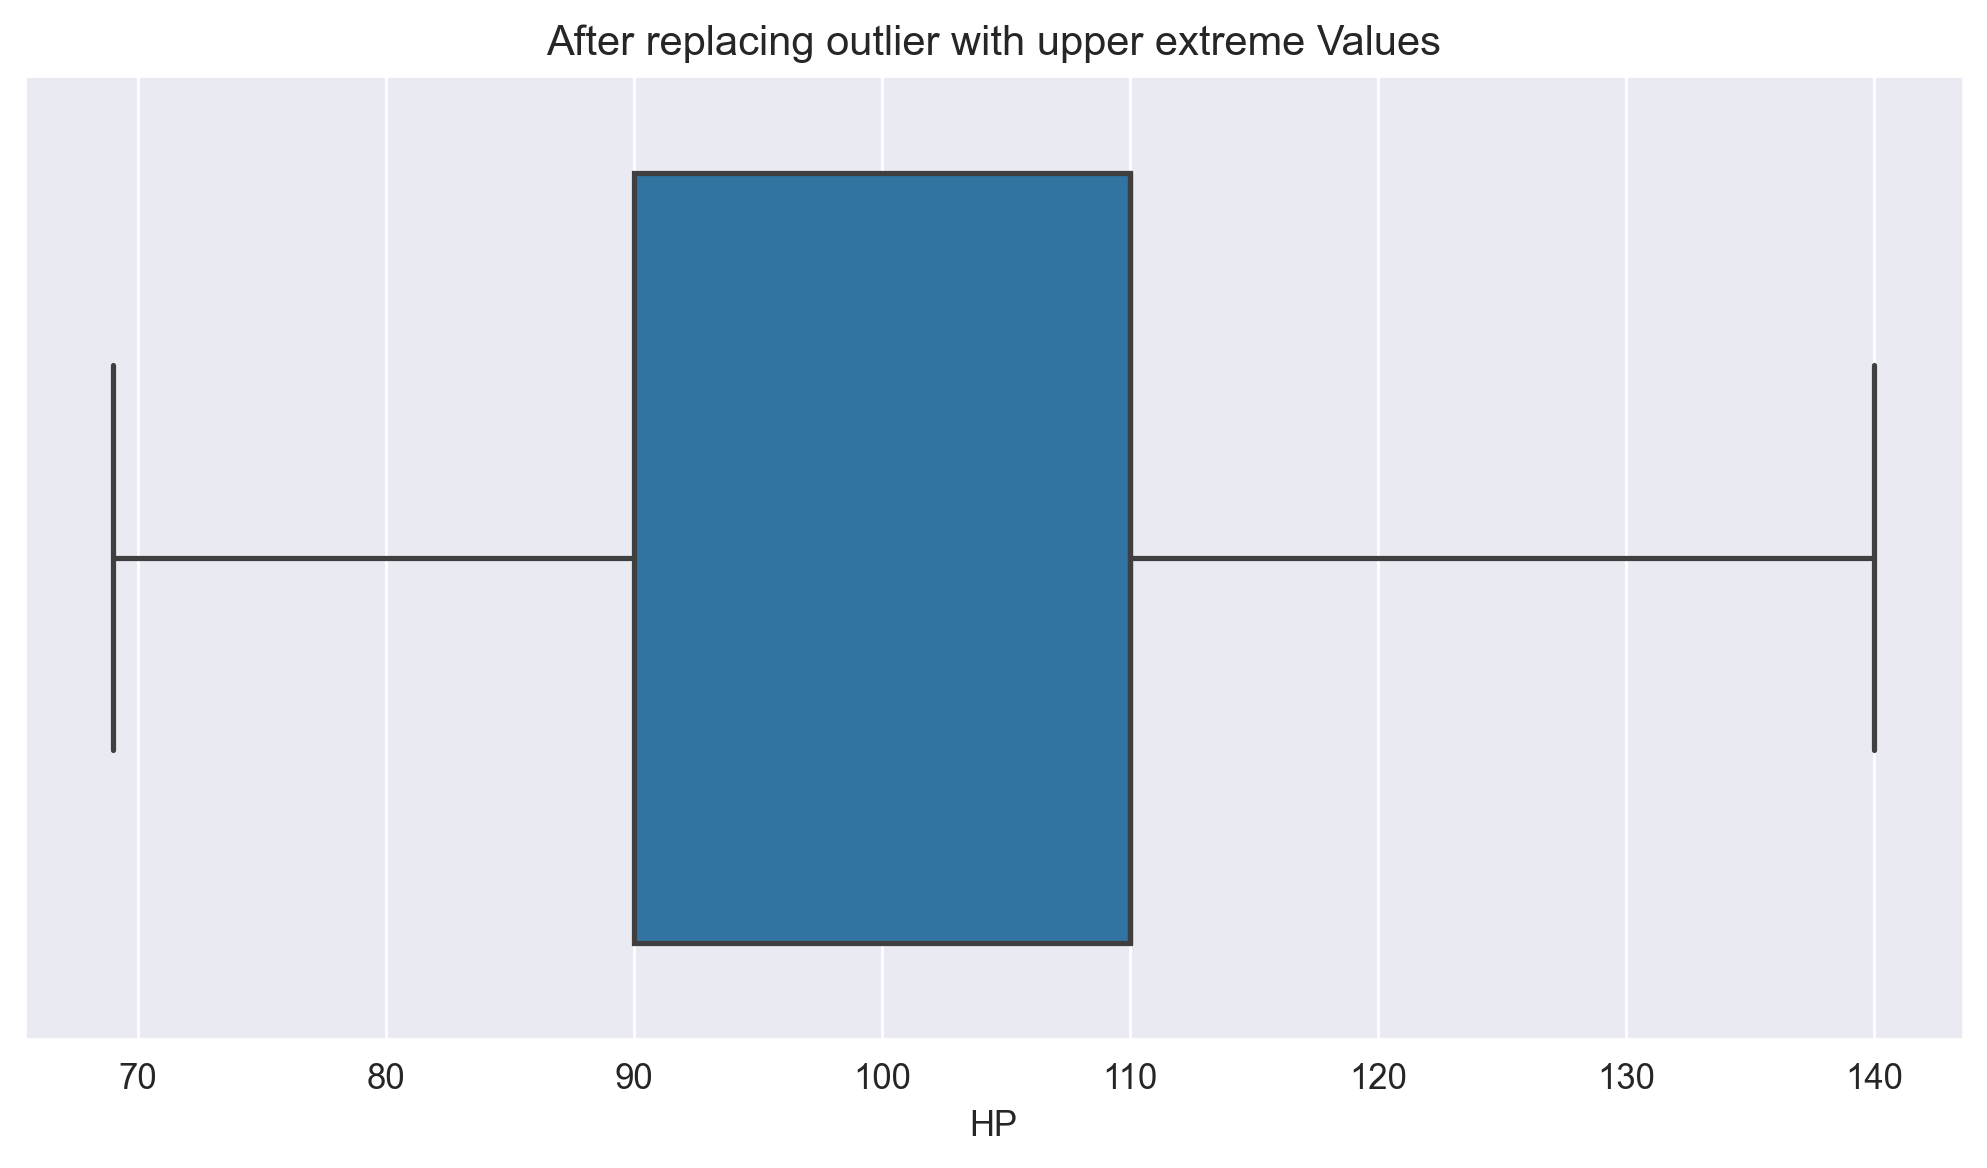

In [111]:
sns.boxplot(x = car["HP"])
plt.title ("After replacing outlier with upper extreme Values")

Text(0.5, 1.0, 'Before the outiler replacing with upper extreme values')

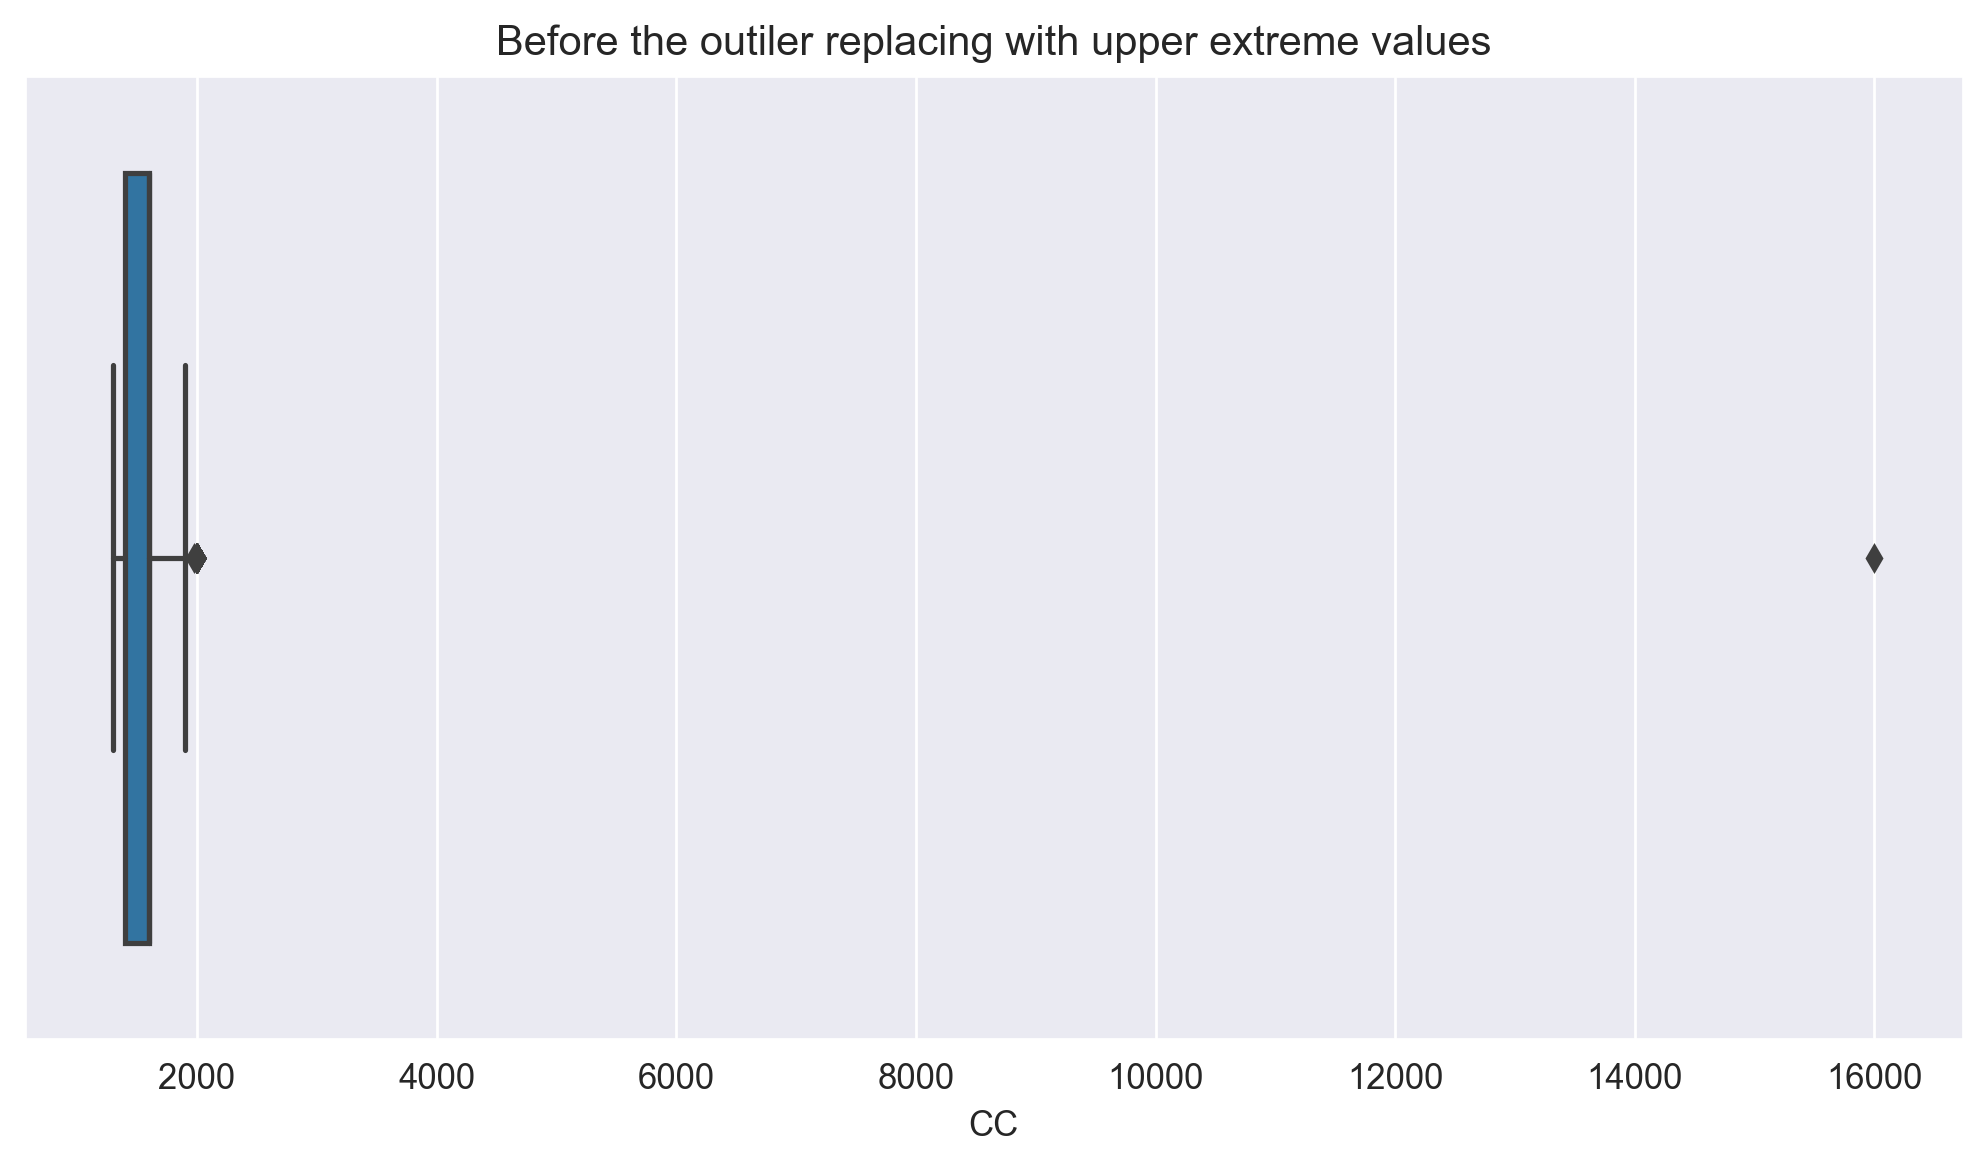

In [114]:
sns.boxplot(x = car["CC"])
plt.title ("Before the outiler replacing with upper extreme values")

In [116]:
outlier_detection(car, "CC")

(1100.0, 1900.0)

In [117]:
car.loc[car["CC"]>1900.0, "CC"] = 1900.0

Text(0.5, 1.0, 'After the replacing outiler with upper extreme values')

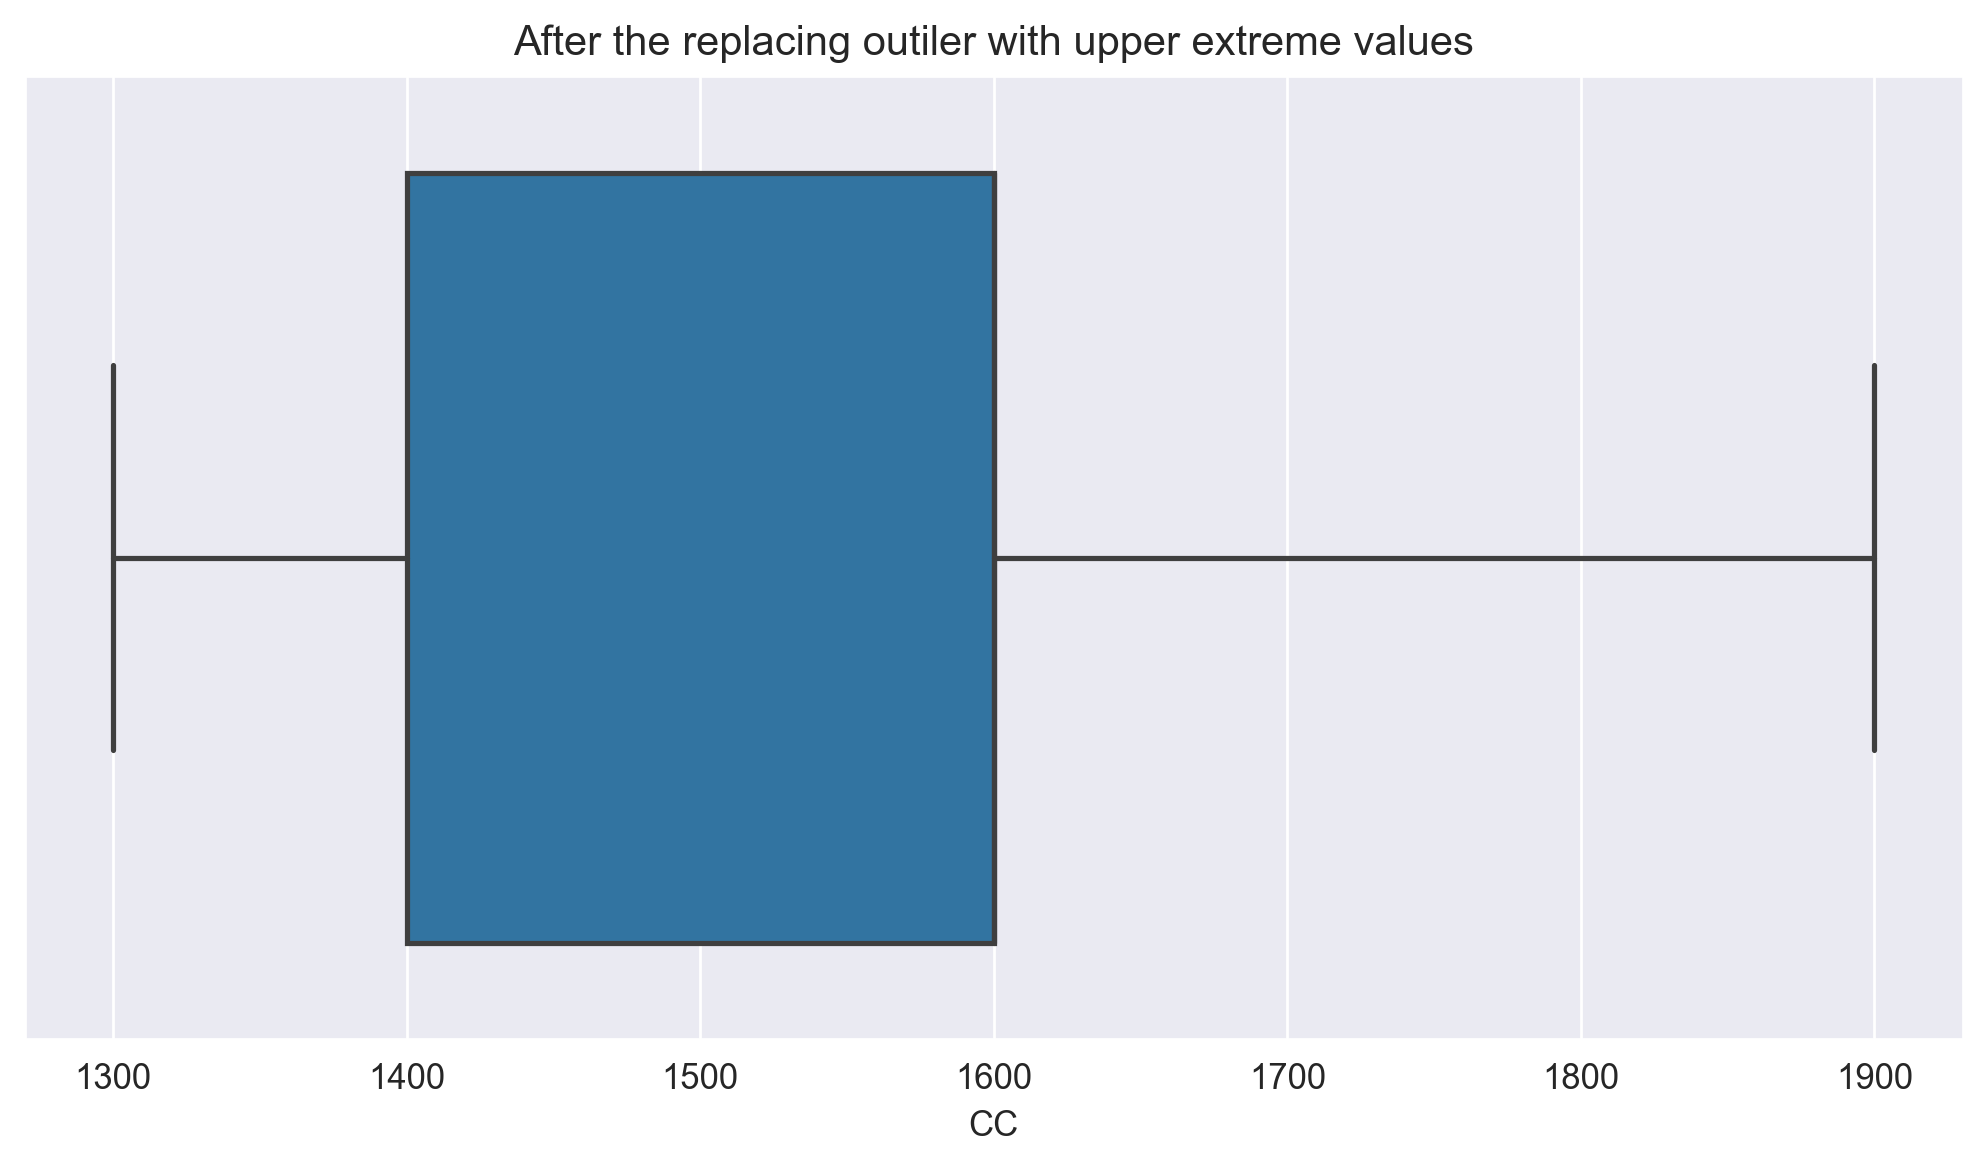

In [118]:
sns.boxplot(x= car["CC"])
plt.title("After the replacing outiler with upper extreme values")

Text(0.5, 1.0, 'Before the outiler replacing with upper and lower extreme values')

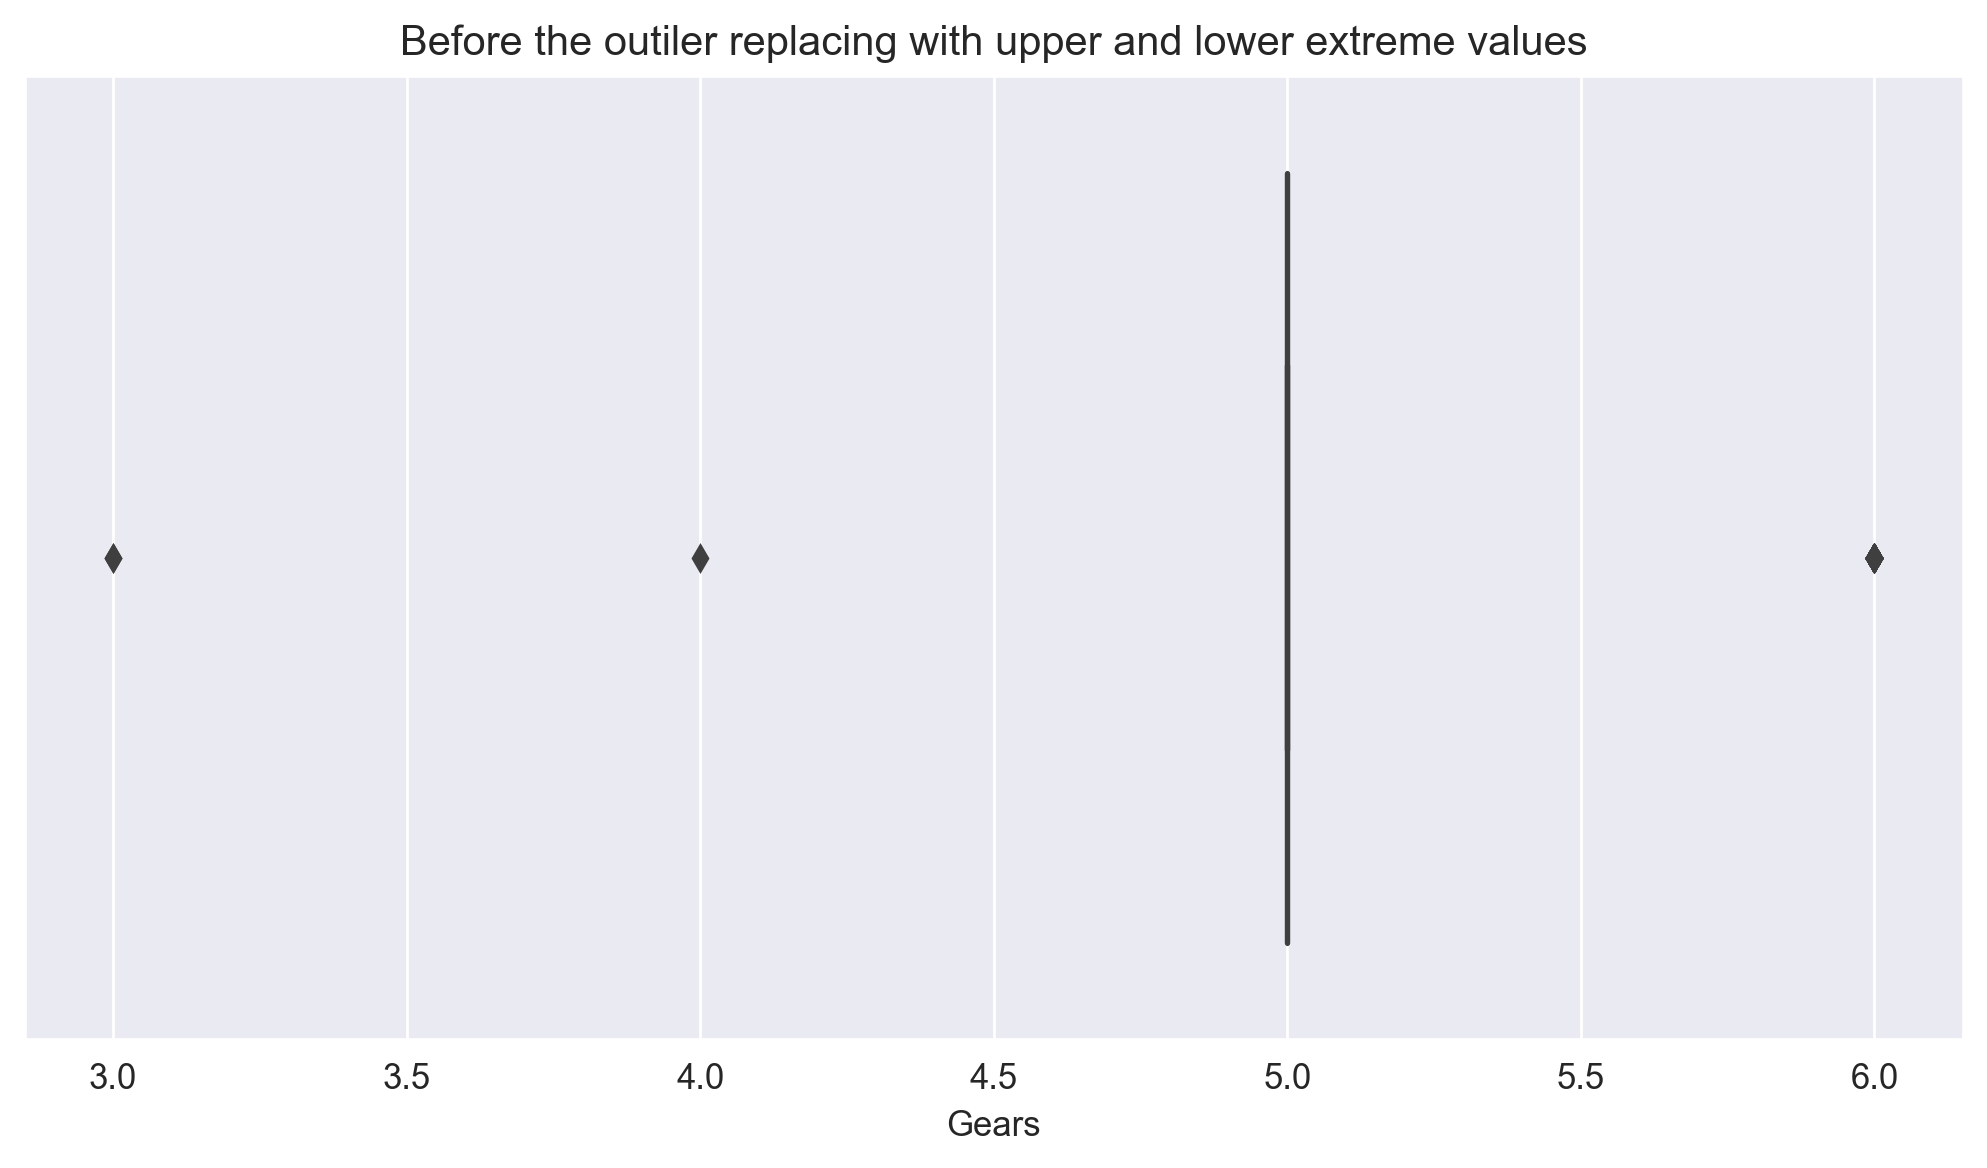

In [123]:
sns.boxplot(x = car["Gears"])
plt.title("Before the outiler replacing with upper and lower extreme values")

In [124]:
outlier_detection(car, "Gears")

(5.0, 5.0)

In [126]:
car[car["Gears"]>5.0]

Price  Age      KM   HP    CC  Doors  Gears  Quartely  Weight
10    17200   25   31461  140  1800      3      6       100    1185
11    17200   22   43610  140  1800      3      6       100    1185
12    17200   25   32189  140  1800      3      6       100    1185
13    17200   31   23000  140  1800      3      6       100    1185
14    17200   32   34131  140  1800      3      6       100    1185
15    17200   28   18739  140  1800      3      6       100    1185
49    17200   31   64982  140  1800      5      6       100    1195
329   11000   41   33000  110  1600      5      6        19    1075
443   11750   48   75045  110  1600      3      6        85    1055
460   11950   49   69659   86  1300      3      6        69    1025
585    9950   55   29650   86  1300      3      6        69    1025
613    8250   64  150585  110  1600      3      6        85    1065
617    8450   64  144000  110  1600      3      6        72    1065
622    8750   61  136956  110  1600      3      6        85    1065
642   10950   57  118833  110  1600      3      6        85    1065
658   10500   66  112000  110  1600      3      6        85    1065
660    9750   65  111769  110  1600      3      6        85    1065
682    8950   63  101469  110  1600      3      6        85    1065
690    9950   61   97648  110  1600      3      6        85    1065
708    9450   65   92226  110  1600      3      6        85    1065
729   11500   65   85889  110  1600      3      6        85    1065
740   10450   62   82421  110  1600      3      6        85    1065
746   10950   65   81192  110  1600      3      6        85    1065
752    9950   59   80430  110  1600      3      6        85    1065
785    9950   67   75429  110  1600      3      6        85    1065
800    9995   61   73894  110  1600      3      6        85    1065
810    9500   59   71366  110  1600      3      6        85    1065
826    9650   67   69000  110  1600      3      6        85    1065
827    9950   68   68865  110  1600      3      6        85    1065
834    9750   67   67762  110  1600      3      6        85    1065
837    9950   59   67010  110  1600      3      6        85    1065
841   10500   61   66259  110  1600      3      6        85    1065
845   10750   63   65896  110  1600      3      6        85    1065
872    9750   68   62292  110  1600      3      6        85    1065
912   12950   67   58058  110  1600      3      6        85    1065
914   10495   62   58000  110  1600      3      6        85    1065
919    9995   61   57169  110  1600      3      6        85    1065
920    9950   63   57124  110  1600      3      6        85    1065
938   10250   60   54554  110  1600      3      6        85    1065
963   10950   65   49942  110  1600      3      6        85    1065
1013  10450   65   36000  110  1600      3      6        85    1065
1014  10950   62   35512  110  1600      3      6        85    1065
1025  10750   60   31480  110  1600      3      6        85    1065

In [127]:
car.loc[car["Gears"]>5.0, "Gears"] = 5.0

In [128]:
car[car["Gears"]<5.0]

Price  Age     KM   HP    CC  Doors  Gears  Quartely  Weight
955   10950   58  51421  110  1600      5      3        85    1105
990    7950   58  43000  110  1600      4      3        72    1114
1425   9950   78  30964  110  1600      3      4        85    1080

In [129]:
car.loc[car["Gears"]<5.0, "Gears"] = 5.0

Text(0.5, 1.0, 'After the outiler replacing with upper and lower extreme values')

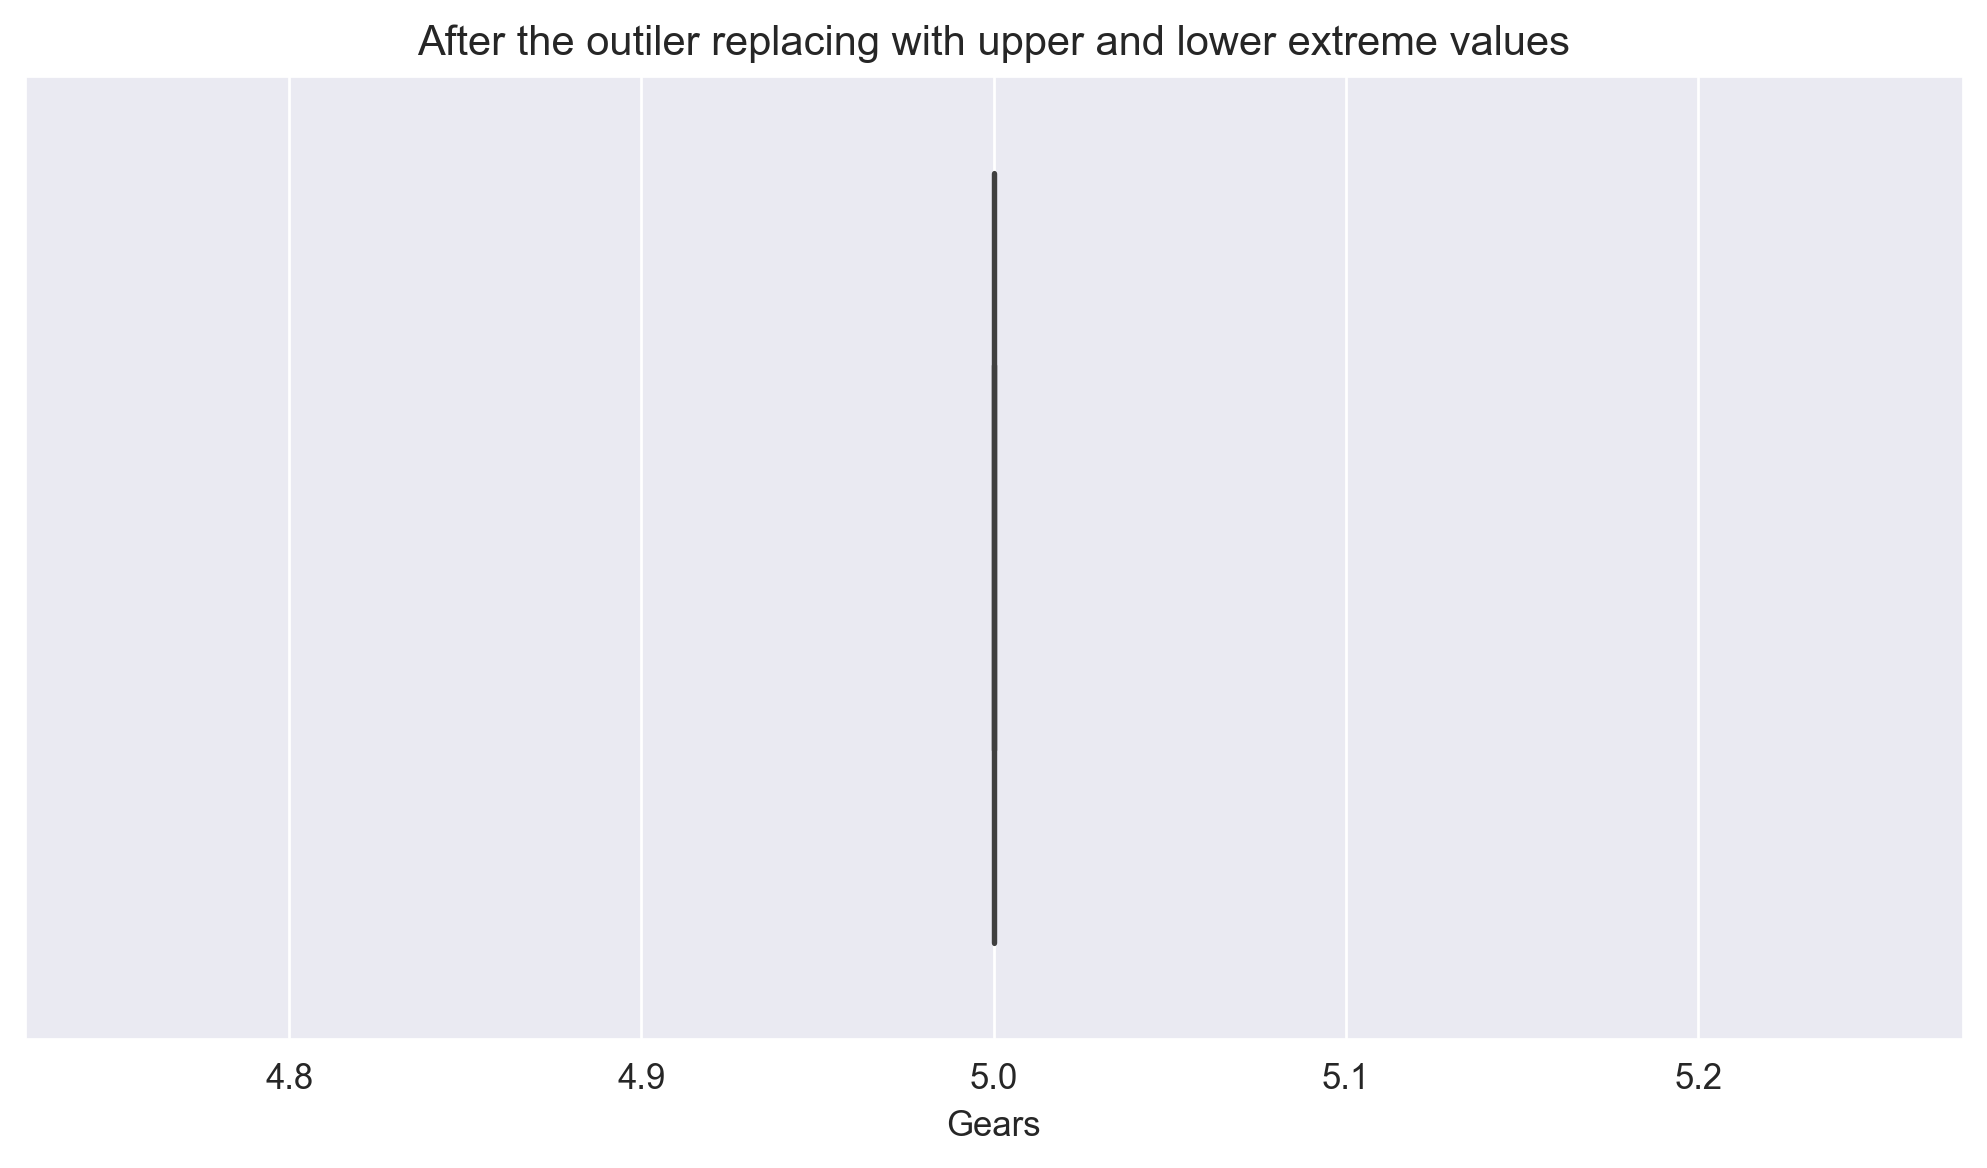

In [130]:
sns.boxplot(x = car["Gears"])
plt.title("After the outiler replacing with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outiler replacing with upper and lower extreme values')

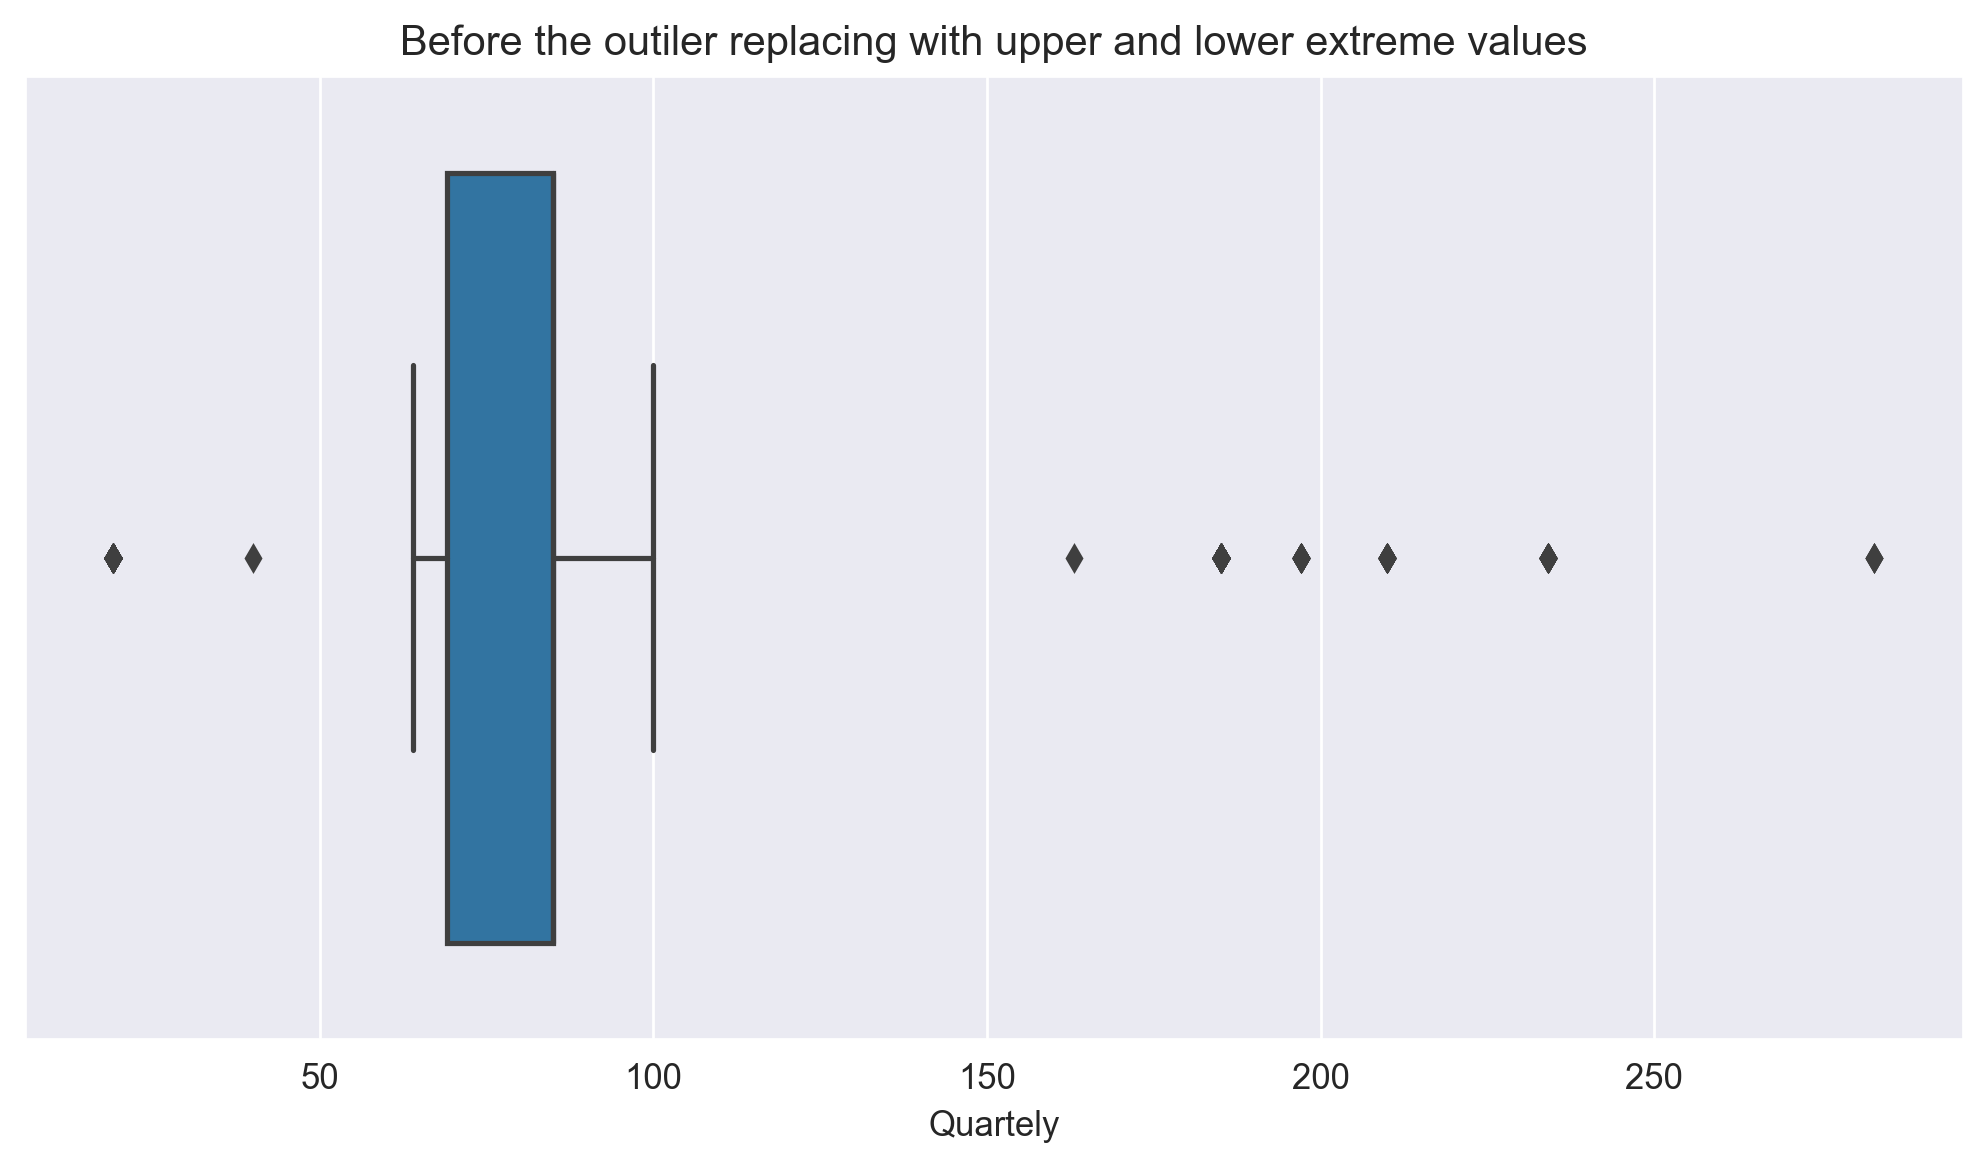

In [134]:
sns.boxplot(x = car["Quartely"])
plt.xlabel("Quartely")
plt.title("Before the outiler replacing with upper and lower extreme values")

In [135]:
outlier_detection(car, "Quartely")

(45.0, 109.0)

In [136]:
car[car["Quartely"]>109.0]

Price  Age     KM  HP    CC  Doors  Gears  Quartely  Weight
0     13500   23  46986  90  1900      3      5       210    1165
1     13750   23  72937  90  1900      3      5       210    1165
2     13950   24  41711  90  1900      3      5       210    1165
3     14950   26  48000  90  1900      3      5       210    1165
4     13750   30  38500  90  1900      3      5       210    1170
...     ...  ...    ...  ..   ...    ...    ...       ...     ...
1194   8750   74  89800  72  1900      3      5       185    1115
1201   6950   73  88186  72  1900      3      5       185    1115
1215   8500   70  85864  72  1900      5      5       185    1135
1319   9400   69  67092  72  1900      3      5       185    1115
1329   8950   71  65021  72  1900      3      5       185    1115

[150 rows x 9 columns]

In [137]:
car.loc[car["Quartely"]>109.0, "Quartely"] = 109.0

In [138]:
car[car["Quartely"]<45.0]

Price  Age     KM   HP    CC  Doors  Gears  Quartely  Weight
18    16750   24  25563  110  1600      3      5        19    1065
30    12950   29   9750   97  1400      3      5        19    1100
65    16950   26  32181  110  1600      5      5        19    1075
125   15950   20  36000  110  1600      5      5        19    1075
128   15850   13  33477  110  1600      5      5        19    1075
...     ...  ...    ...  ...   ...    ...    ...       ...     ...
1386   7450   78  52287  110  1600      5      5        19    1114
1387   8750   75  52000  110  1600      5      5        19    1075
1415   8950   79  40093  110  1600      5      5        19    1114
1422   7950   80  35821   86  1300      3      5        19    1015
1434   6950   76      1  110  1600      5      5        19    1114

[73 rows x 9 columns]

In [139]:
car.loc[car["Quartely"]<45.0, "Quartely"] = 45.0

Text(0.5, 1.0, 'After the outiler replacing with upper and lower extreme values')

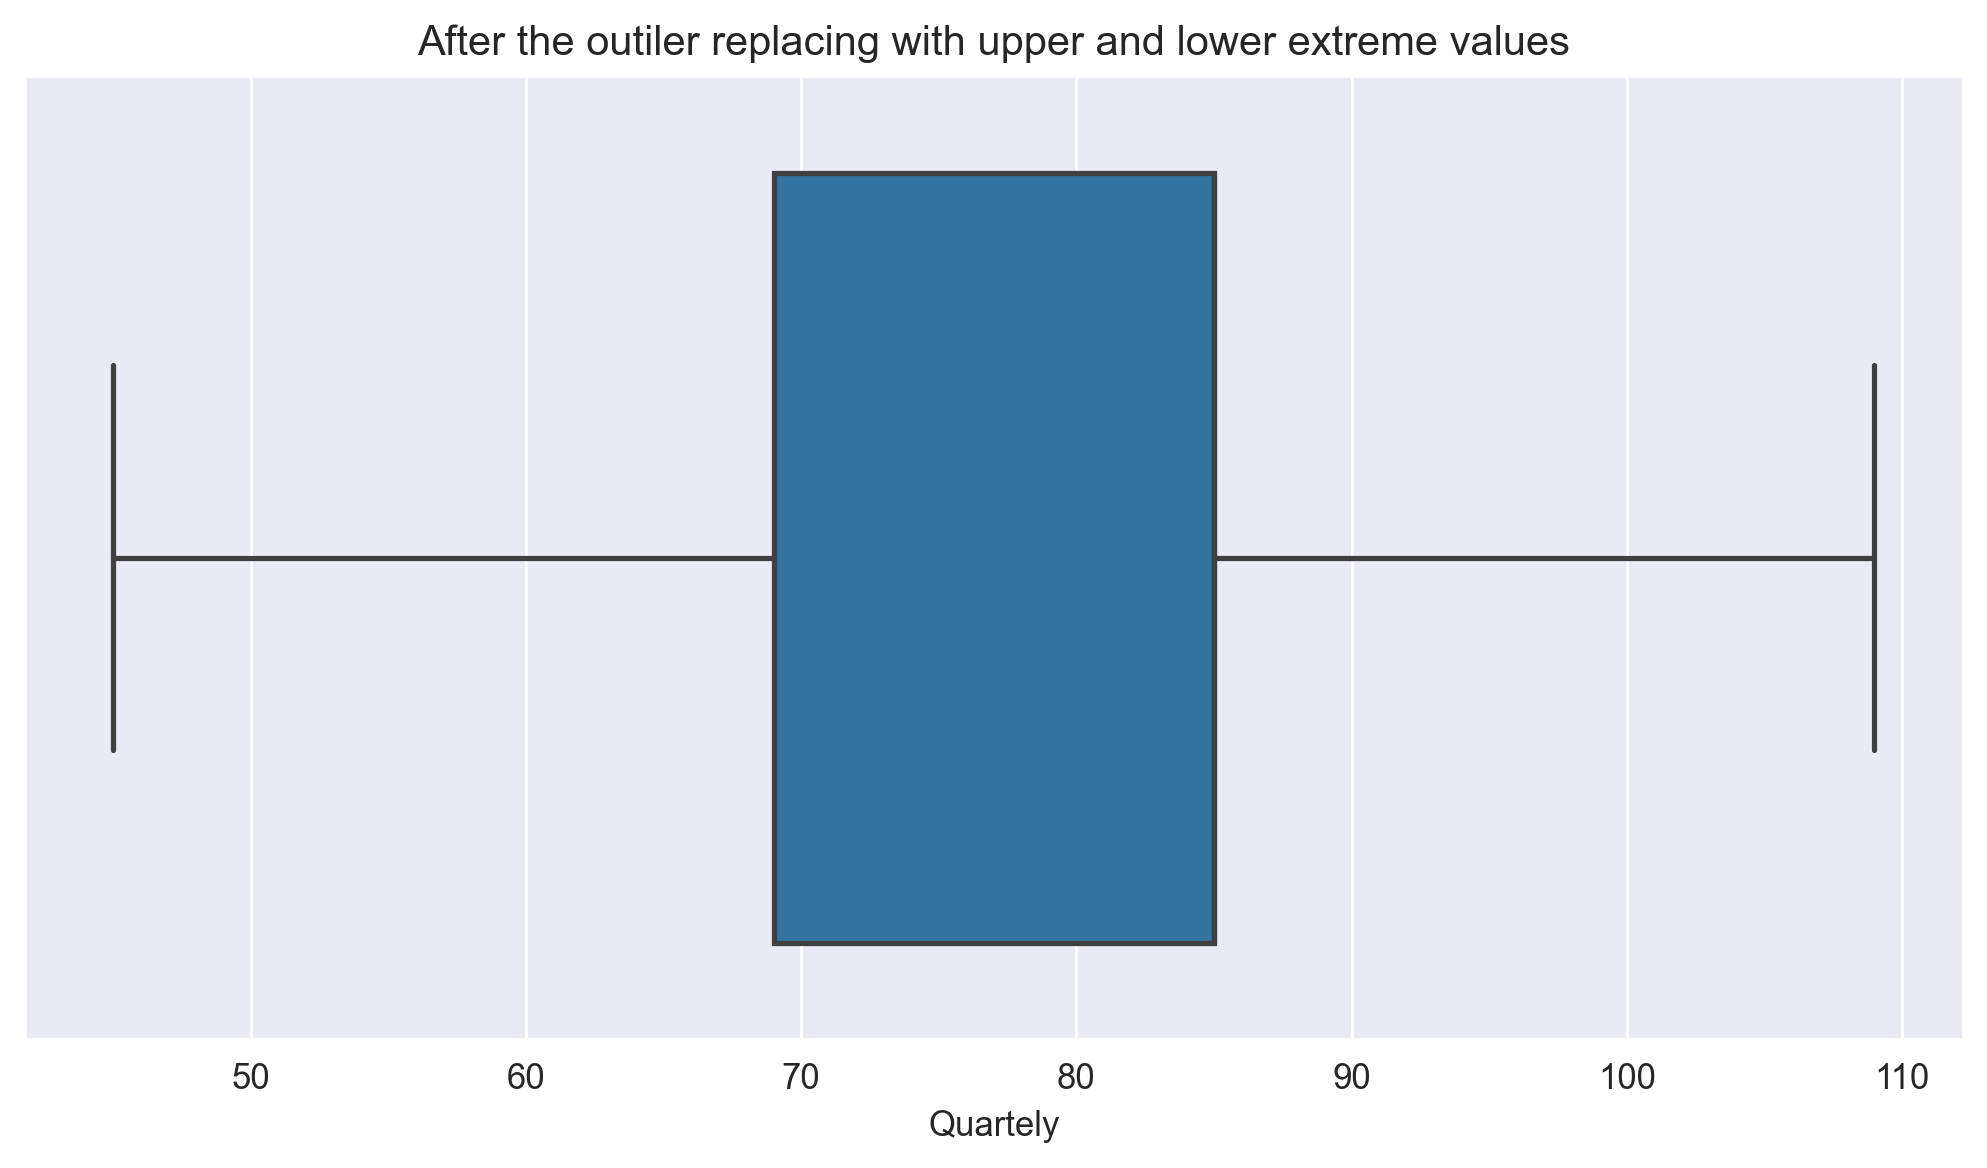

In [140]:
sns.boxplot(x = car["Quartely"])
plt.xlabel("Quartely")
plt.title("After the outiler replacing with upper and lower extreme values")

Text(0.5, 1.0, 'After the outiler replacing with upper and lower extreme values')

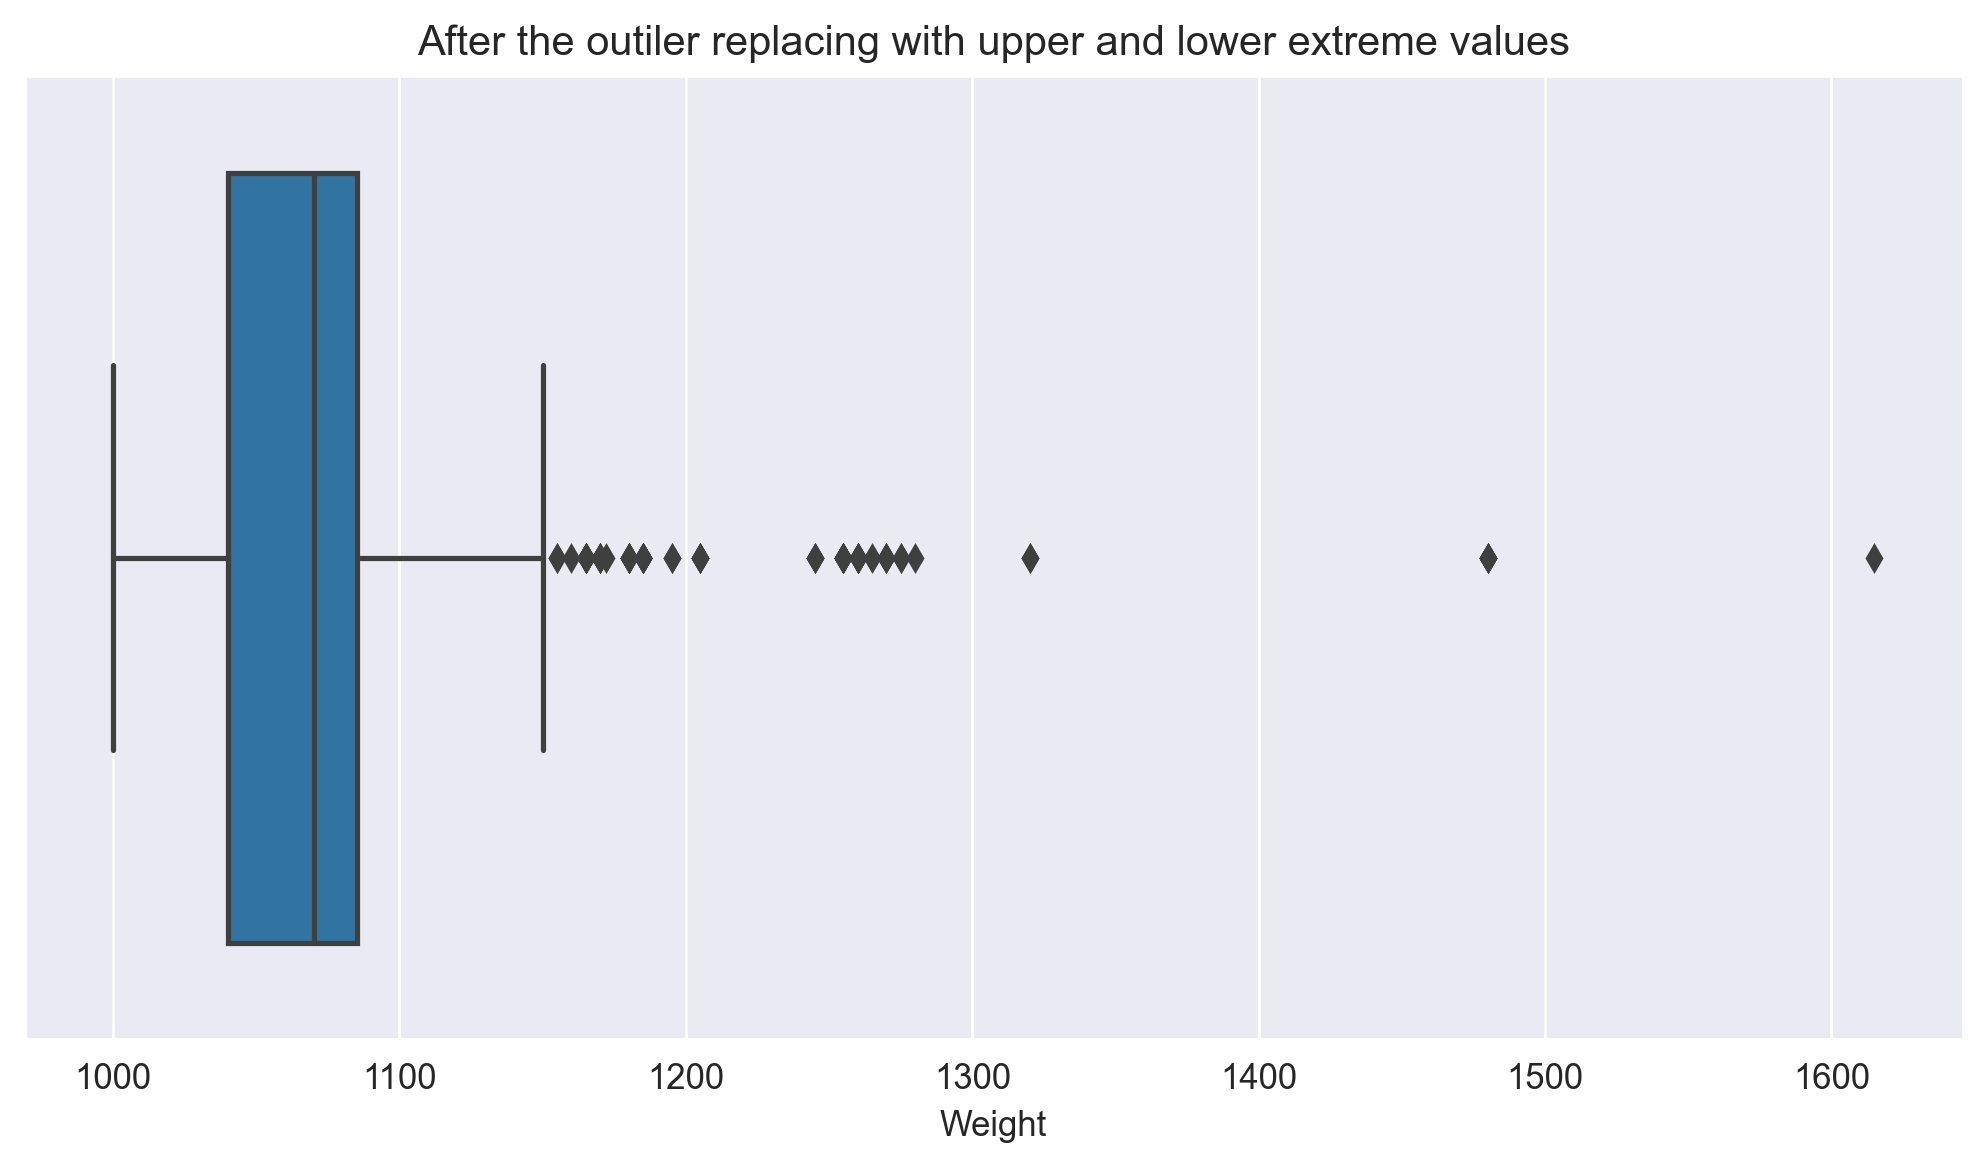

In [141]:
sns.boxplot(x = car["Weight"])
plt.xlabel("Weight")
plt.title("Before the outiler replacing with upper and lower extreme values")

In [142]:
outlier_detection(car, "Weight")

(972.5, 1152.5)

In [143]:
car[car["Weight"]>1152.5]

Price  Age      KM  HP    CC  Doors  Gears  Quartely  Weight
0     13500   23   46986  90  1900      3      5       109    1165
1     13750   23   72937  90  1900      3      5       109    1165
2     13950   24   41711  90  1900      3      5       109    1165
3     14950   26   48000  90  1900      3      5       109    1165
4     13750   30   38500  90  1900      3      5       109    1170
...     ...  ...     ...  ..   ...    ...    ...       ...     ...
600    7500   50       1  90  1900      3      5        64    1260
653    6950   65  114383  90  1900      3      5        64    1260
767   10950   59   78750  90  1900      5      5       109    1155
959    9390   66   50806  86  1300      3      5        45    1480
1043   5900   73  153103  72  1900      5      5        45    1172

[65 rows x 9 columns]

In [144]:
car.loc[car["Weight"]>1152.5, "Weight"] = 1152.5

Text(0.5, 1.0, 'After the outiler replacing with upper and lower extreme values')

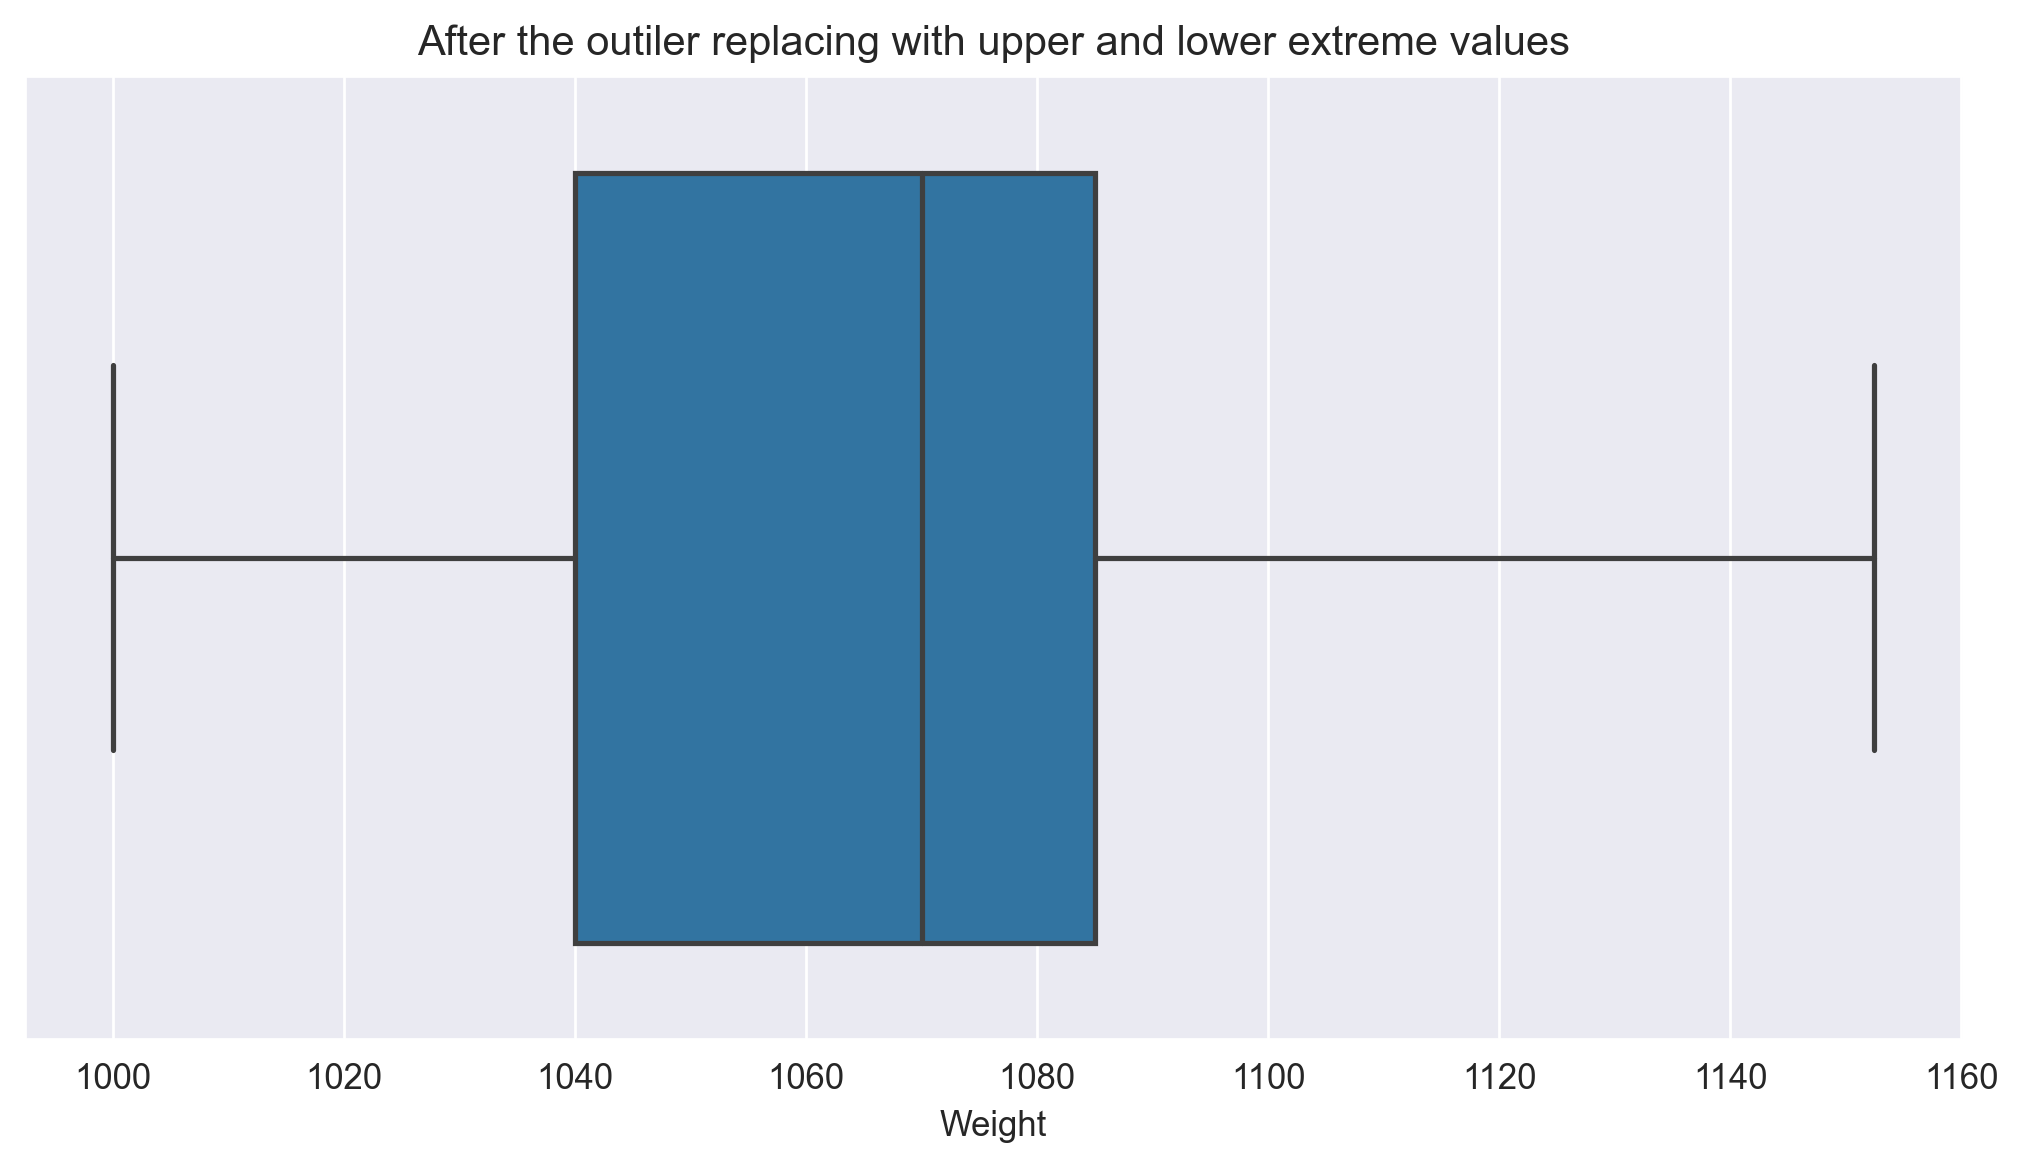

In [145]:
sns.boxplot(x = car["Weight"])
plt.xlabel("Weight")
plt.title("After the outiler replacing with upper and lower extreme values")

# See the above all the boxplot we can replace the outilers with upper and lower extreme values. Now, will see the all the box plot in the same cell and find out whether the outilers there or not

<Axes: >

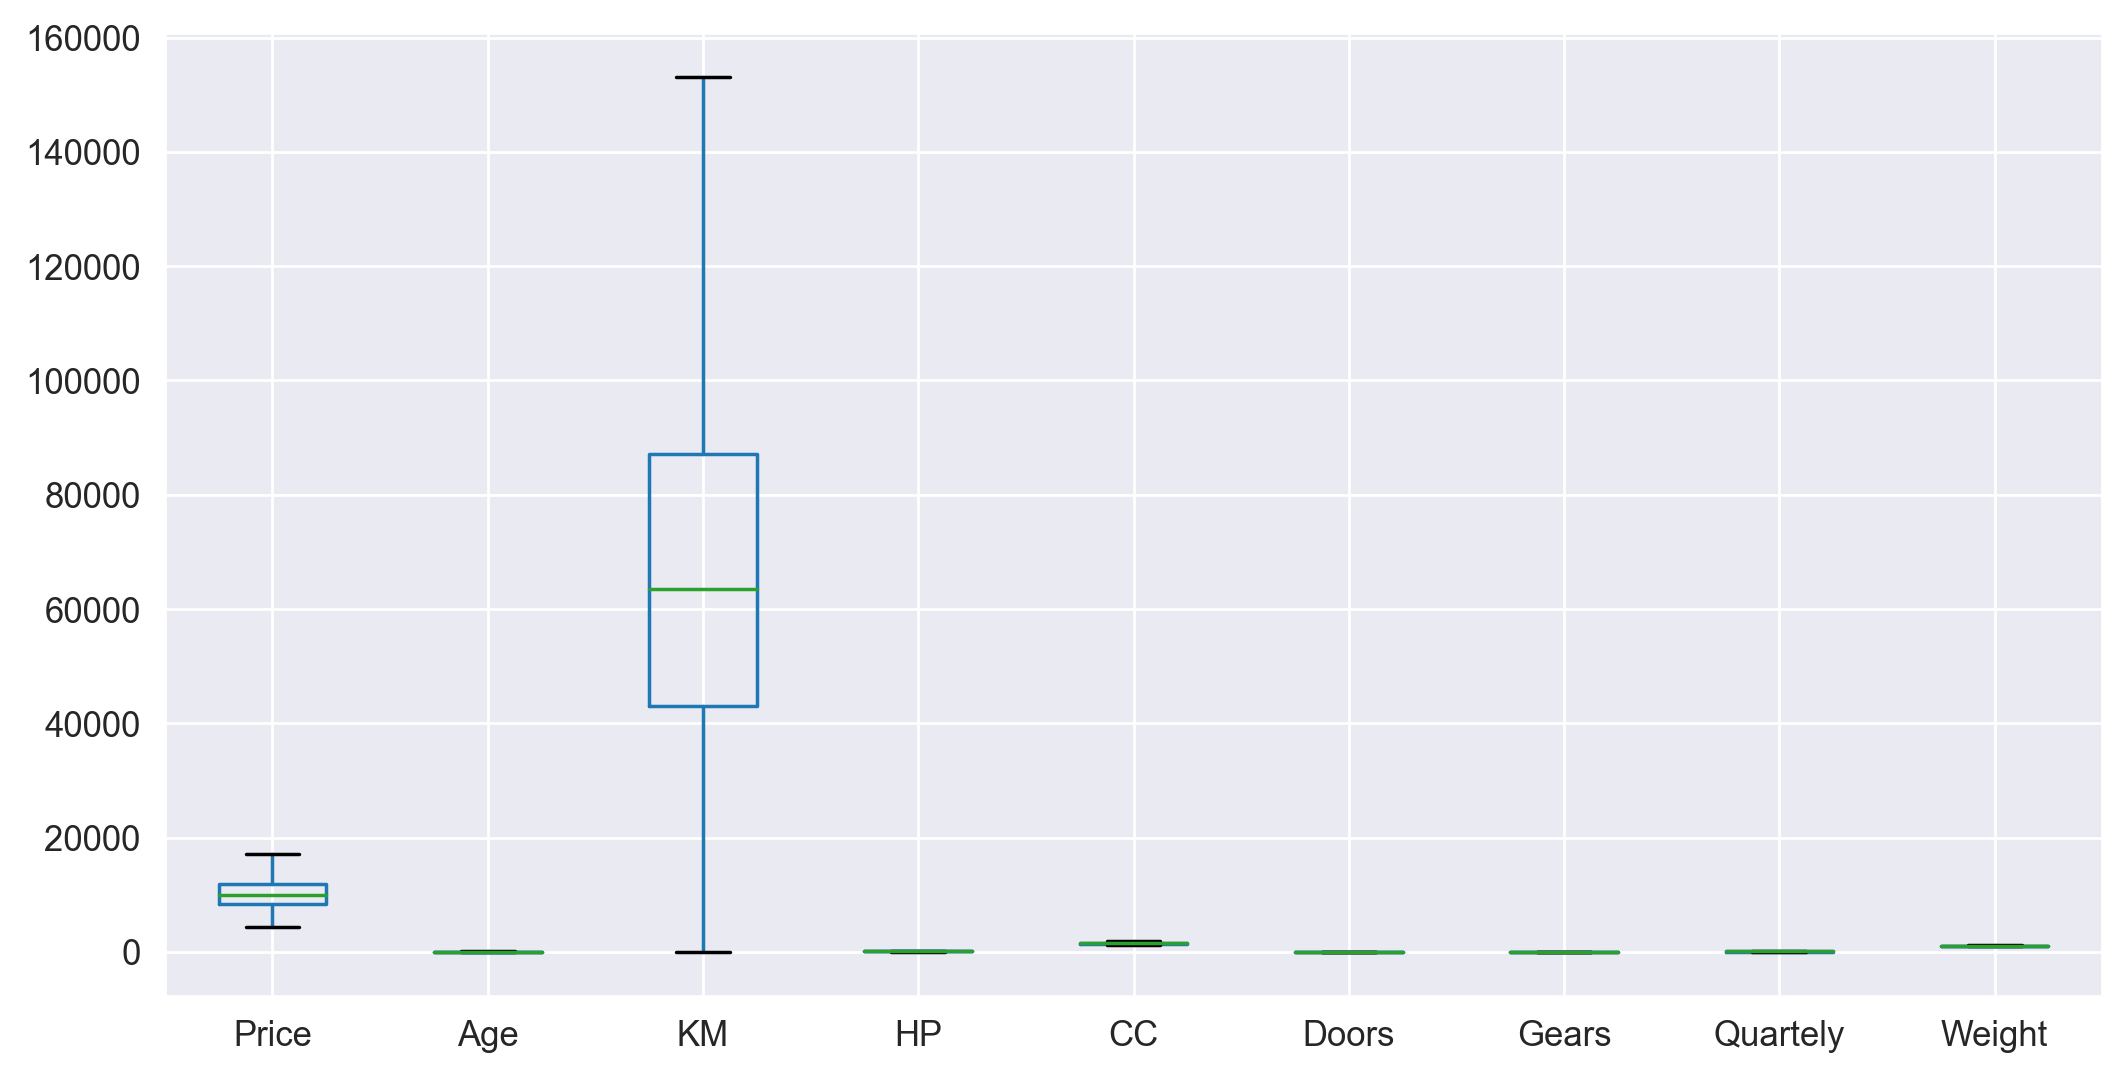

In [146]:
car.boxplot()

Text(0.5, 1.0, 'Weight')

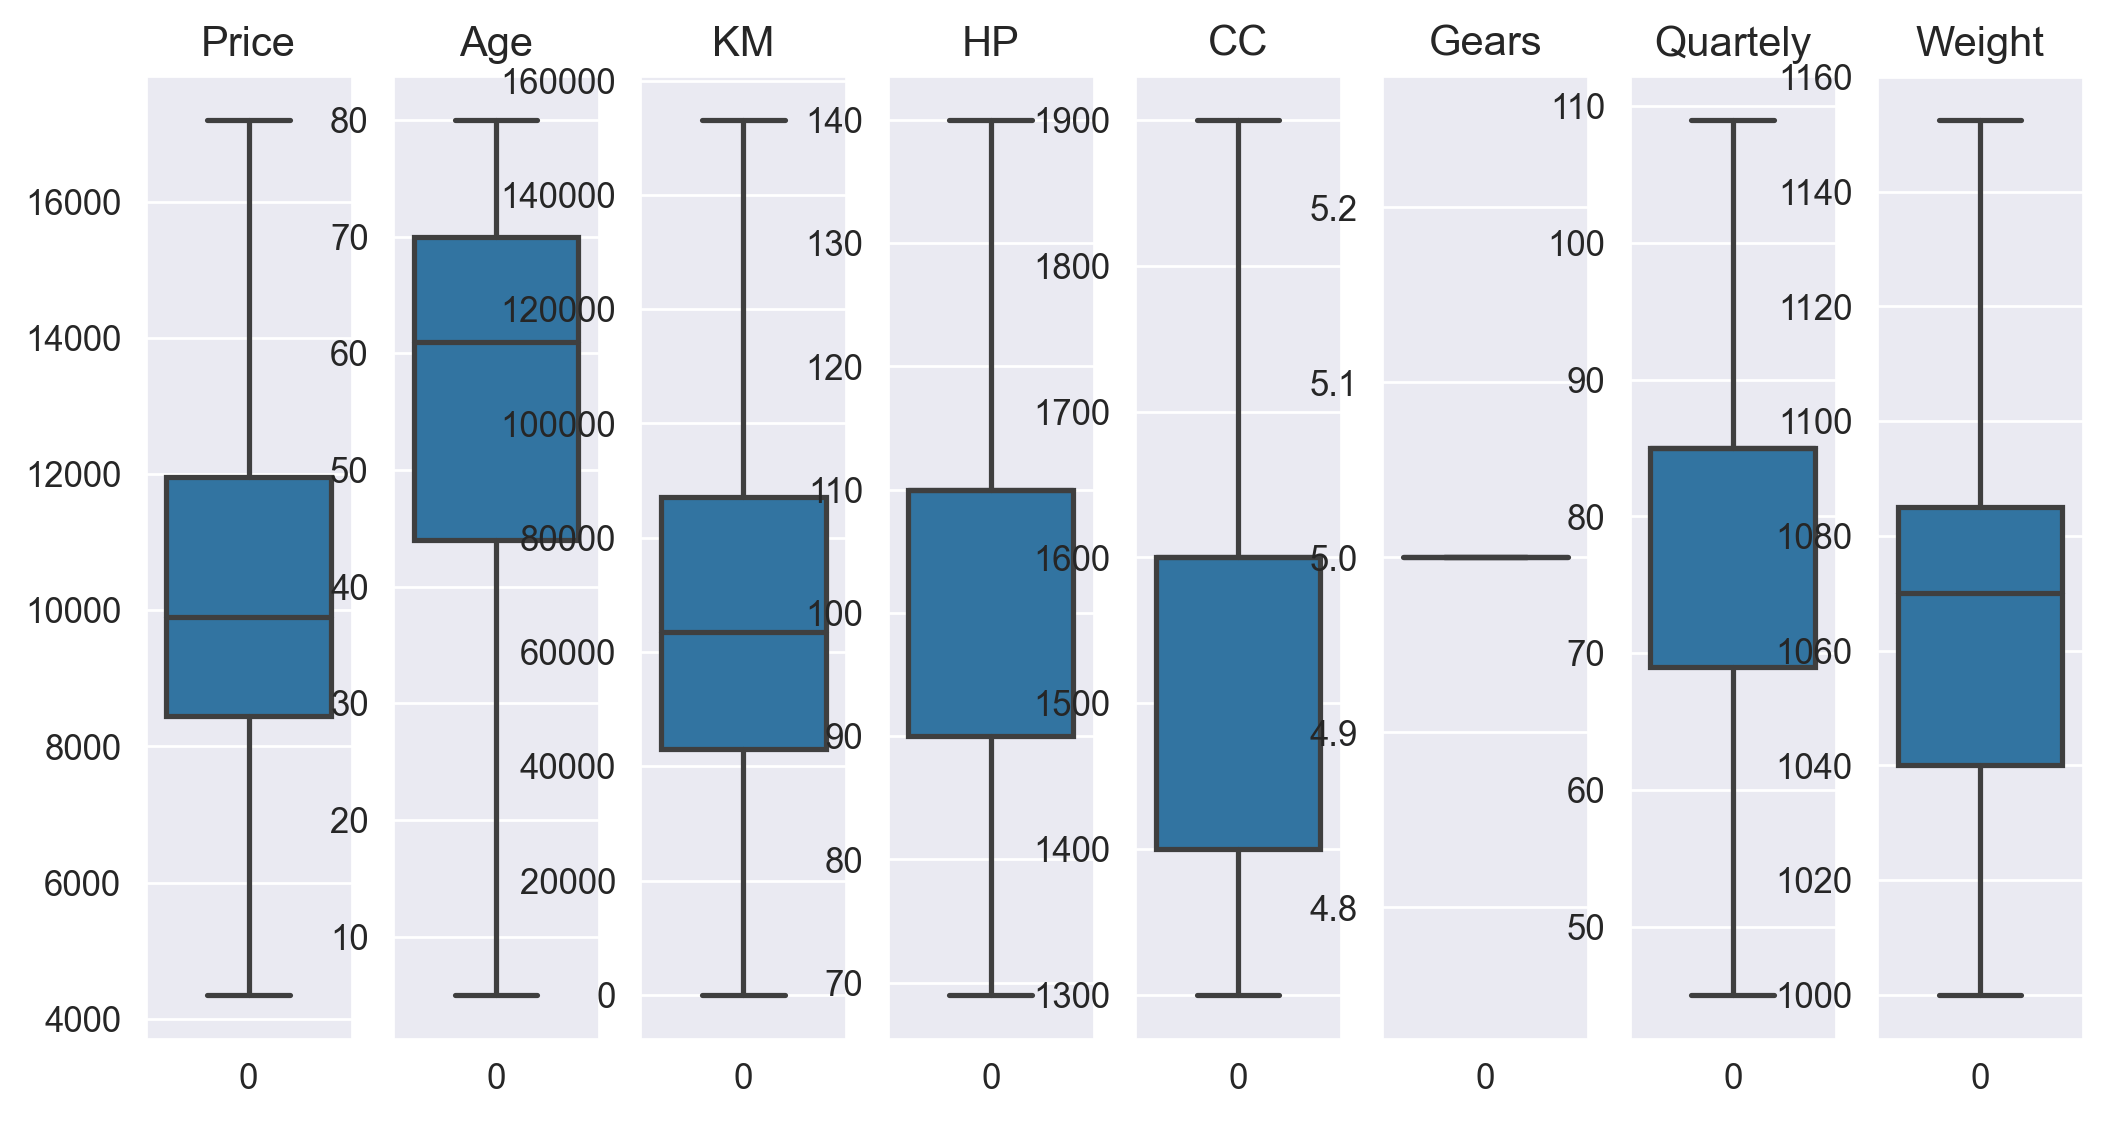

In [147]:
plt.subplot(1,8,1)
sns.boxplot(car['Price'])
plt.title("Price")

plt.subplot(1,8,2)
sns.boxplot(car['Age'])
plt.title("Age")

plt.subplot(1,8,3)
sns.boxplot(car['KM'])
plt.title("KM")

plt.subplot(1,8,4)
sns.boxplot(car['HP'])
plt.title("HP")

plt.subplot(1,8,5)
sns.boxplot(car['CC'])
plt.title("CC")

plt.subplot(1,8,6)
sns.boxplot(car['Gears'])
plt.title("Gears")

plt.subplot(1,8,7)
sns.boxplot(car['Quartely'])
plt.title("Quartely")

plt.subplot(1,8,8)
sns.boxplot(car['Weight'])
plt.title("Weight")

# Use the sacaterplot and find out the correlation between the all the independed values

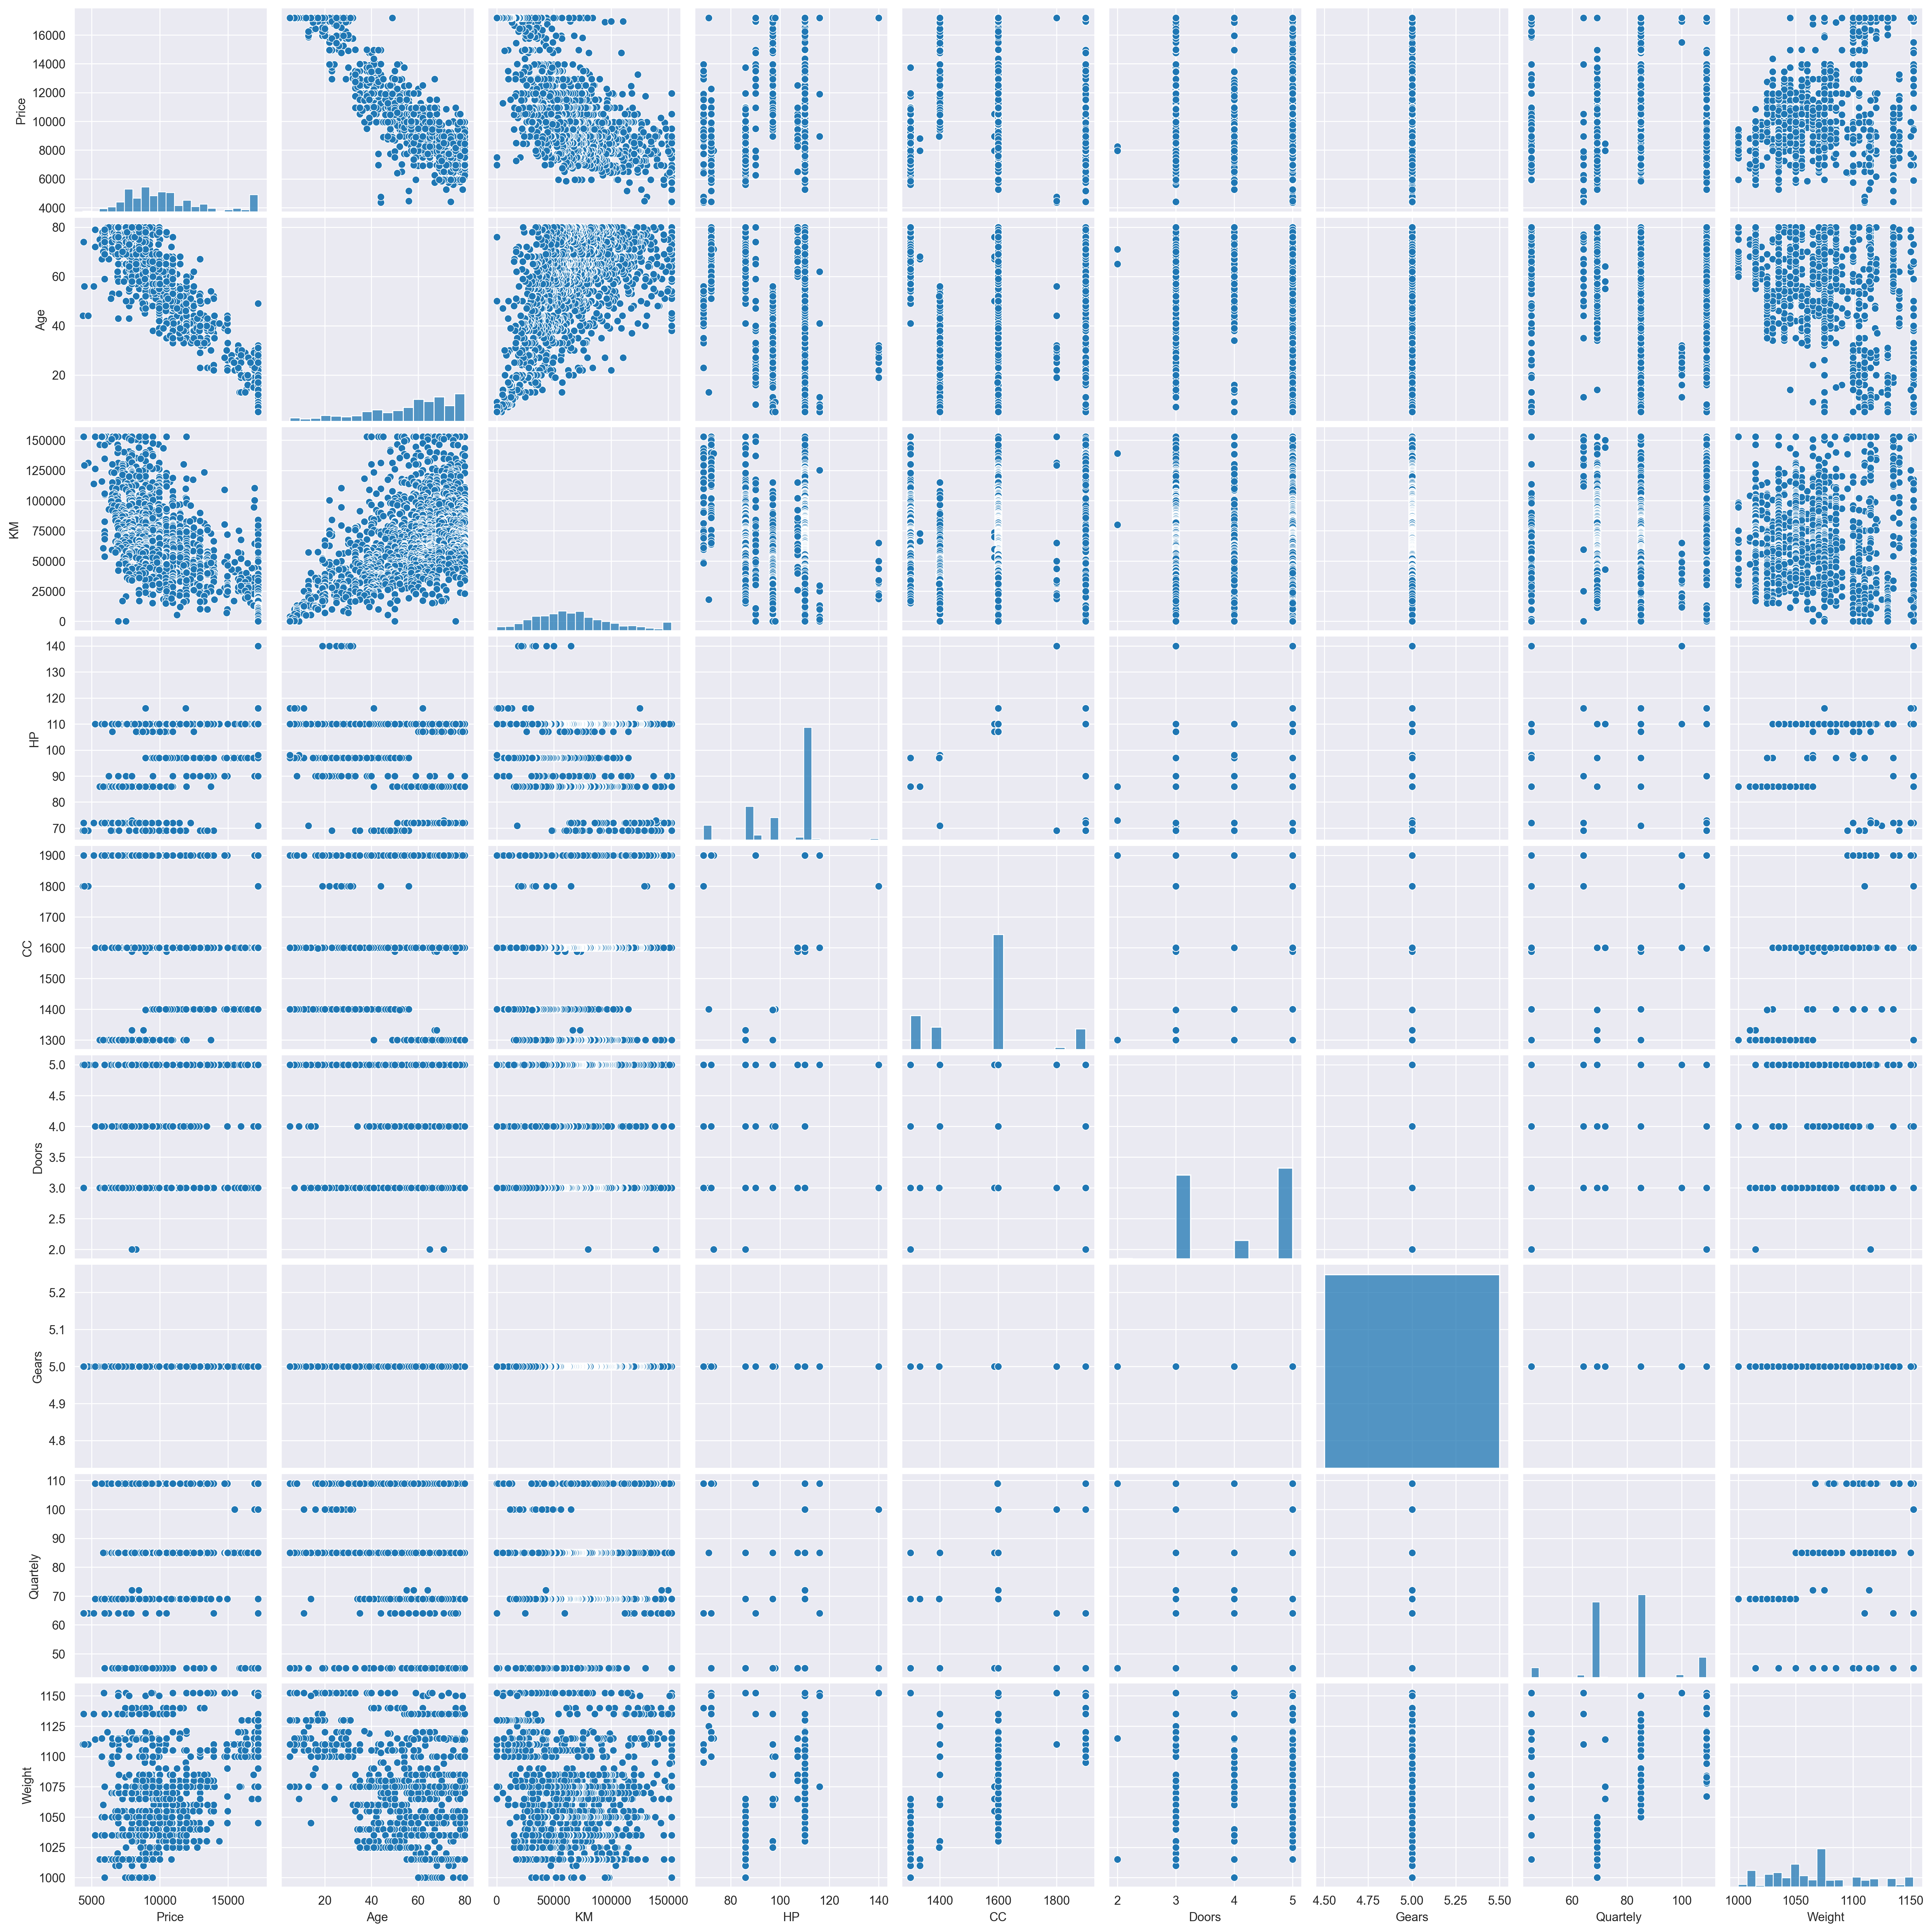

In [151]:
sns.pairplot(car)

# Correlation

<Axes: >

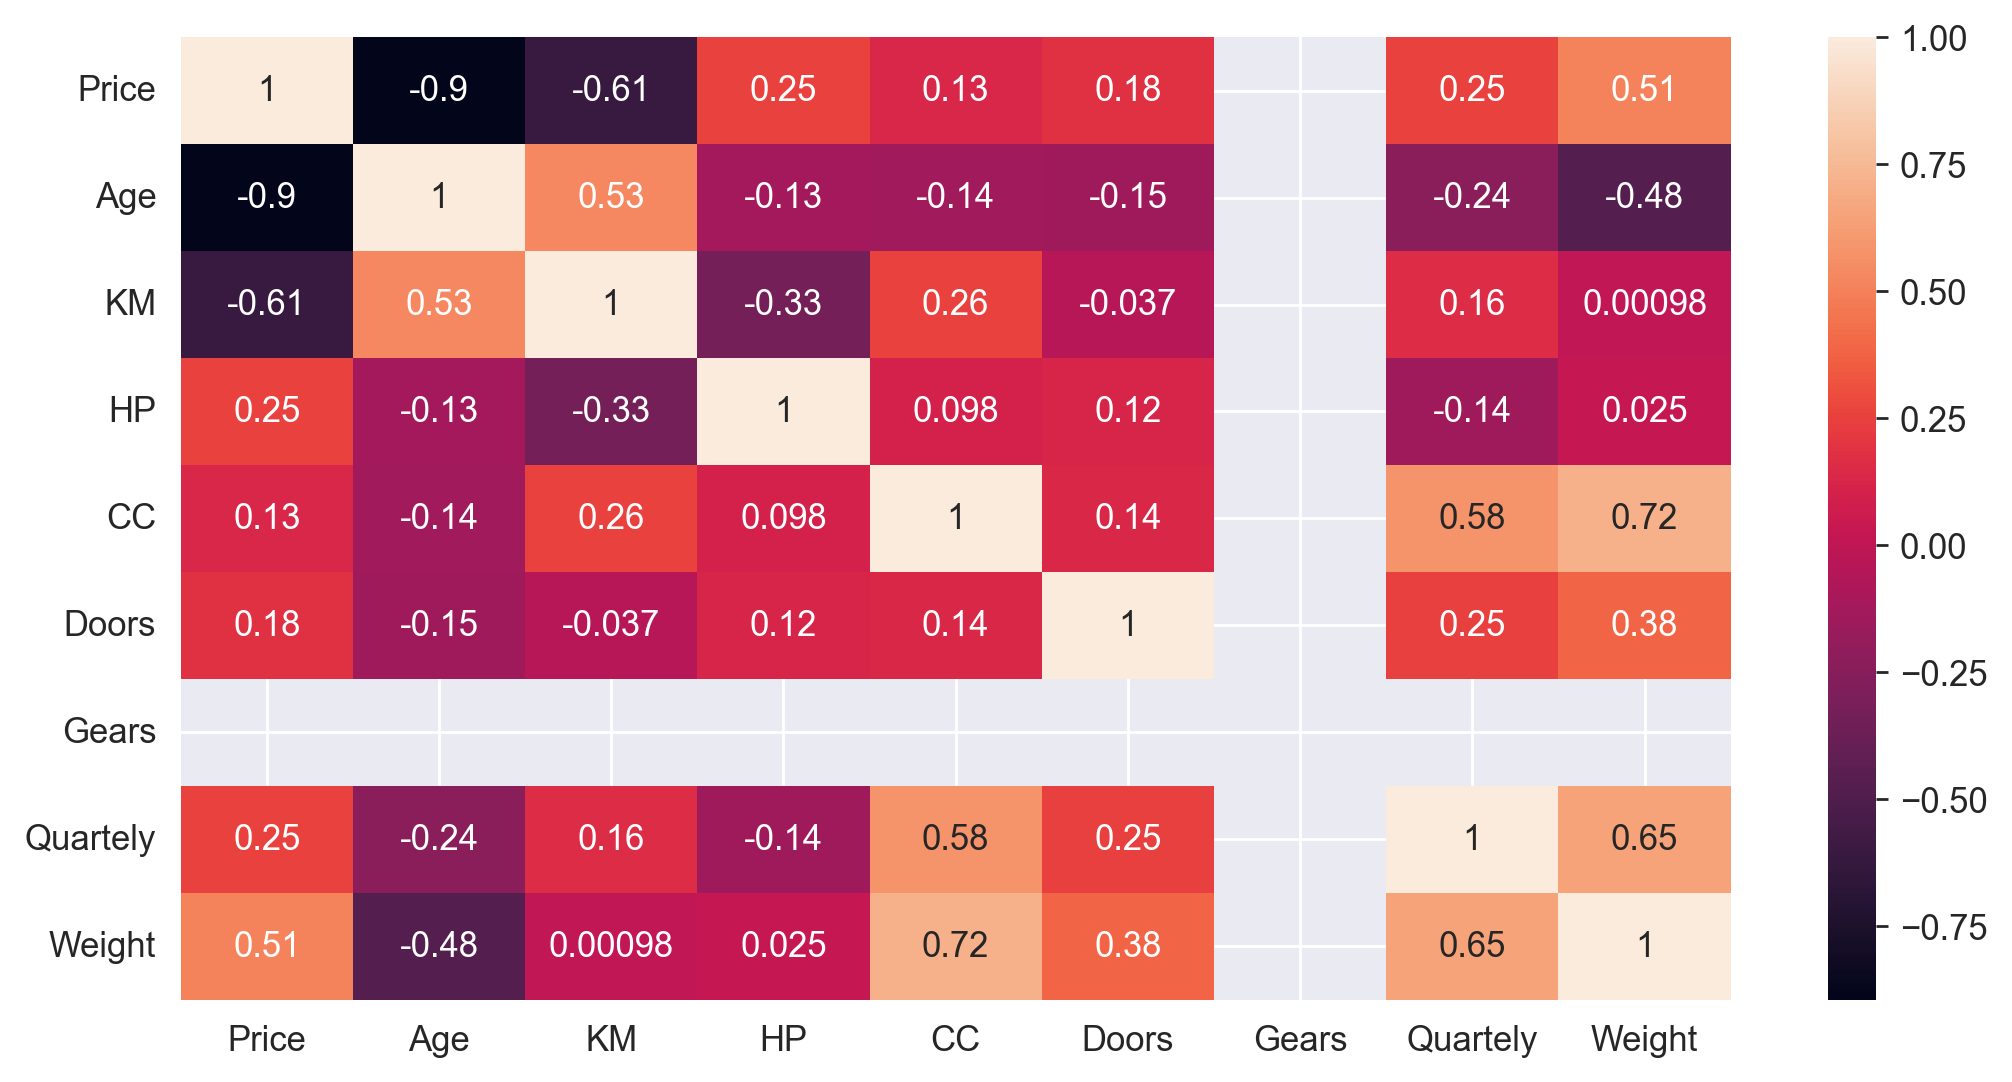

In [152]:
sns.heatmap(car.corr(), annot= True)

# See the above correlation heatmap, we can easly find out the CC,HP columns are highly correlated and also the Weight, and KM columns are also highly correlated. Hence, we have to find out the multicorelative relationship between the independed columns

# Model Building

In [154]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+Quartely+Weight", data= car).fit()

In [155]:
model.pvalues

Intercept     8.451494e-04
Age          5.205085e-291
KM            1.767103e-41
HP            6.510296e-30
CC            1.978754e-19
Doors         1.638099e-03
Gears         8.451494e-04
Quartely      8.289243e-07
Weight        2.315862e-41
dtype: float64

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1320.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:22:13   Log-Likelihood:                -12071.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1427   BIC:                         2.420e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -177.3407     53.022     -3.345      0.001    -281.350     -73.332
Age         -106.1905      2.266    -46.862      0.000    -110.636    -101.745
KM            -0.0161      0.001    -13.935      0.000      -0.018      -0.014
HP            29.2491      2.516     11.625      0.000      24.314      34.185
CC            -2.6973      0.295     -9.146      0.000      -3.276      -2.119
Doors       -108.6891     34.449     -3.155      0.002    -176.265     -41.113
Gears       -886.7035    265.109     -3.345      0.001   -1406.748    -366.659
Quartely      13.5611      2.739      4.950      0.000       8.187      18.935
Weight        21.2916      1.530     13.913      0.000      18.290      24.293
==============================================================================
Omnibus:                       52.544   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.555
Skew:                          -0.115   Prob(JB):                     3.67e-30
Kurtosis:                       4.488   Cond. No.                     3.65e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Calculate VIF

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
car.head()

Price  Age     KM  HP    CC  Doors  Gears  Quartely  Weight
0  13500   23  46986  90  1900      3      5       109  1152.5
1  13750   23  72937  90  1900      3      5       109  1152.5
2  13950   24  41711  90  1900      3      5       109  1152.5
3  14950   26  48000  90  1900      3      5       109  1152.5
4  13750   30  38500  90  1900      3      5       109  1152.5

In [159]:
data = car.drop(columns = ["Price"])
data

Age     KM   HP    CC  Doors  Gears  Quartely  Weight
0      23  46986   90  1900      3      5       109  1152.5
1      23  72937   90  1900      3      5       109  1152.5
2      24  41711   90  1900      3      5       109  1152.5
3      26  48000   90  1900      3      5       109  1152.5
4      30  38500   90  1900      3      5       109  1152.5
...   ...    ...  ...   ...    ...    ...       ...     ...
1430   69  20544   86  1300      3      5        69  1025.0
1431   72  19000   86  1300      3      5        69  1015.0
1432   71  17016   86  1300      3      5        69  1015.0
1433   70  16916   86  1300      3      5        69  1015.0
1434   76      1  110  1600      5      5        45  1114.0

[1435 rows x 8 columns]

# List comprehension

In [160]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [163]:
vif["Features"] = data.columns
vif

Features
0       Age
1        KM
2        HP
3        CC
4     Doors
5     Gears
6  Quartely
7    Weight

In [168]:
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif

Features          VIF
0       Age     2.120527
1        KM     1.926808
2        HP     1.315786
3        CC     2.980206
4     Doors     1.295417
5     Gears  2287.339582
6  Quartely     1.950592
7    Weight     4.007977

# Here, we have to check the highest VIF values and we have to drop that particluiar values

# MODEL VALIDATION TECHNIQUES¶

# 1.Residual Analysis


In [170]:
model1 = smf.ols('Price~Age+KM+HP+CC+Doors+Quartely+Weight', data=car).fit()
model1.rsquaredx

0.8661808932589645

In [171]:
model1.resid

0      -1890.314780
1      -1223.484398
2      -1418.852408
3       -105.456129
4      -1033.285019
           ...     
1430   -1674.506807
1431    2177.180362
1432    -305.877584
1433   -1663.674328
1434   -3056.044089
Length: 1435, dtype: float64

# Q-Q plot

In [173]:
import statsmodels.api as sm
sm.qqplot(model1.resid, line = 'q');

# Get index for higher residuals

In [174]:
np.argmax(model1.resid), np.max(model1.resid)

(522, 5097.2131634905345)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [175]:
model1.params

Intercept   -4610.858129
Age          -106.190524
KM             -0.016062
HP             29.249132
CC             -2.697260
Doors        -108.689101
Quartely       13.561139
Weight         21.291565
dtype: float64

In [176]:
model1.fittedvalues

0       15390.314780
1       14973.484398
2       15368.852408
3       15055.456129
4       14783.285019
            ...     
1430     9174.506807
1431     8667.819638
1432     8805.877584
1433     8913.674328
1434    10006.044089
Length: 1435, dtype: float64

In [177]:
model1.resid

0      -1890.314780
1      -1223.484398
2      -1418.852408
3       -105.456129
4      -1033.285019
           ...     
1430   -1674.506807
1431    2177.180362
1432    -305.877584
1433   -1663.674328
1434   -3056.044089
Length: 1435, dtype: float64

Text(0, 0.5, 'Errors')

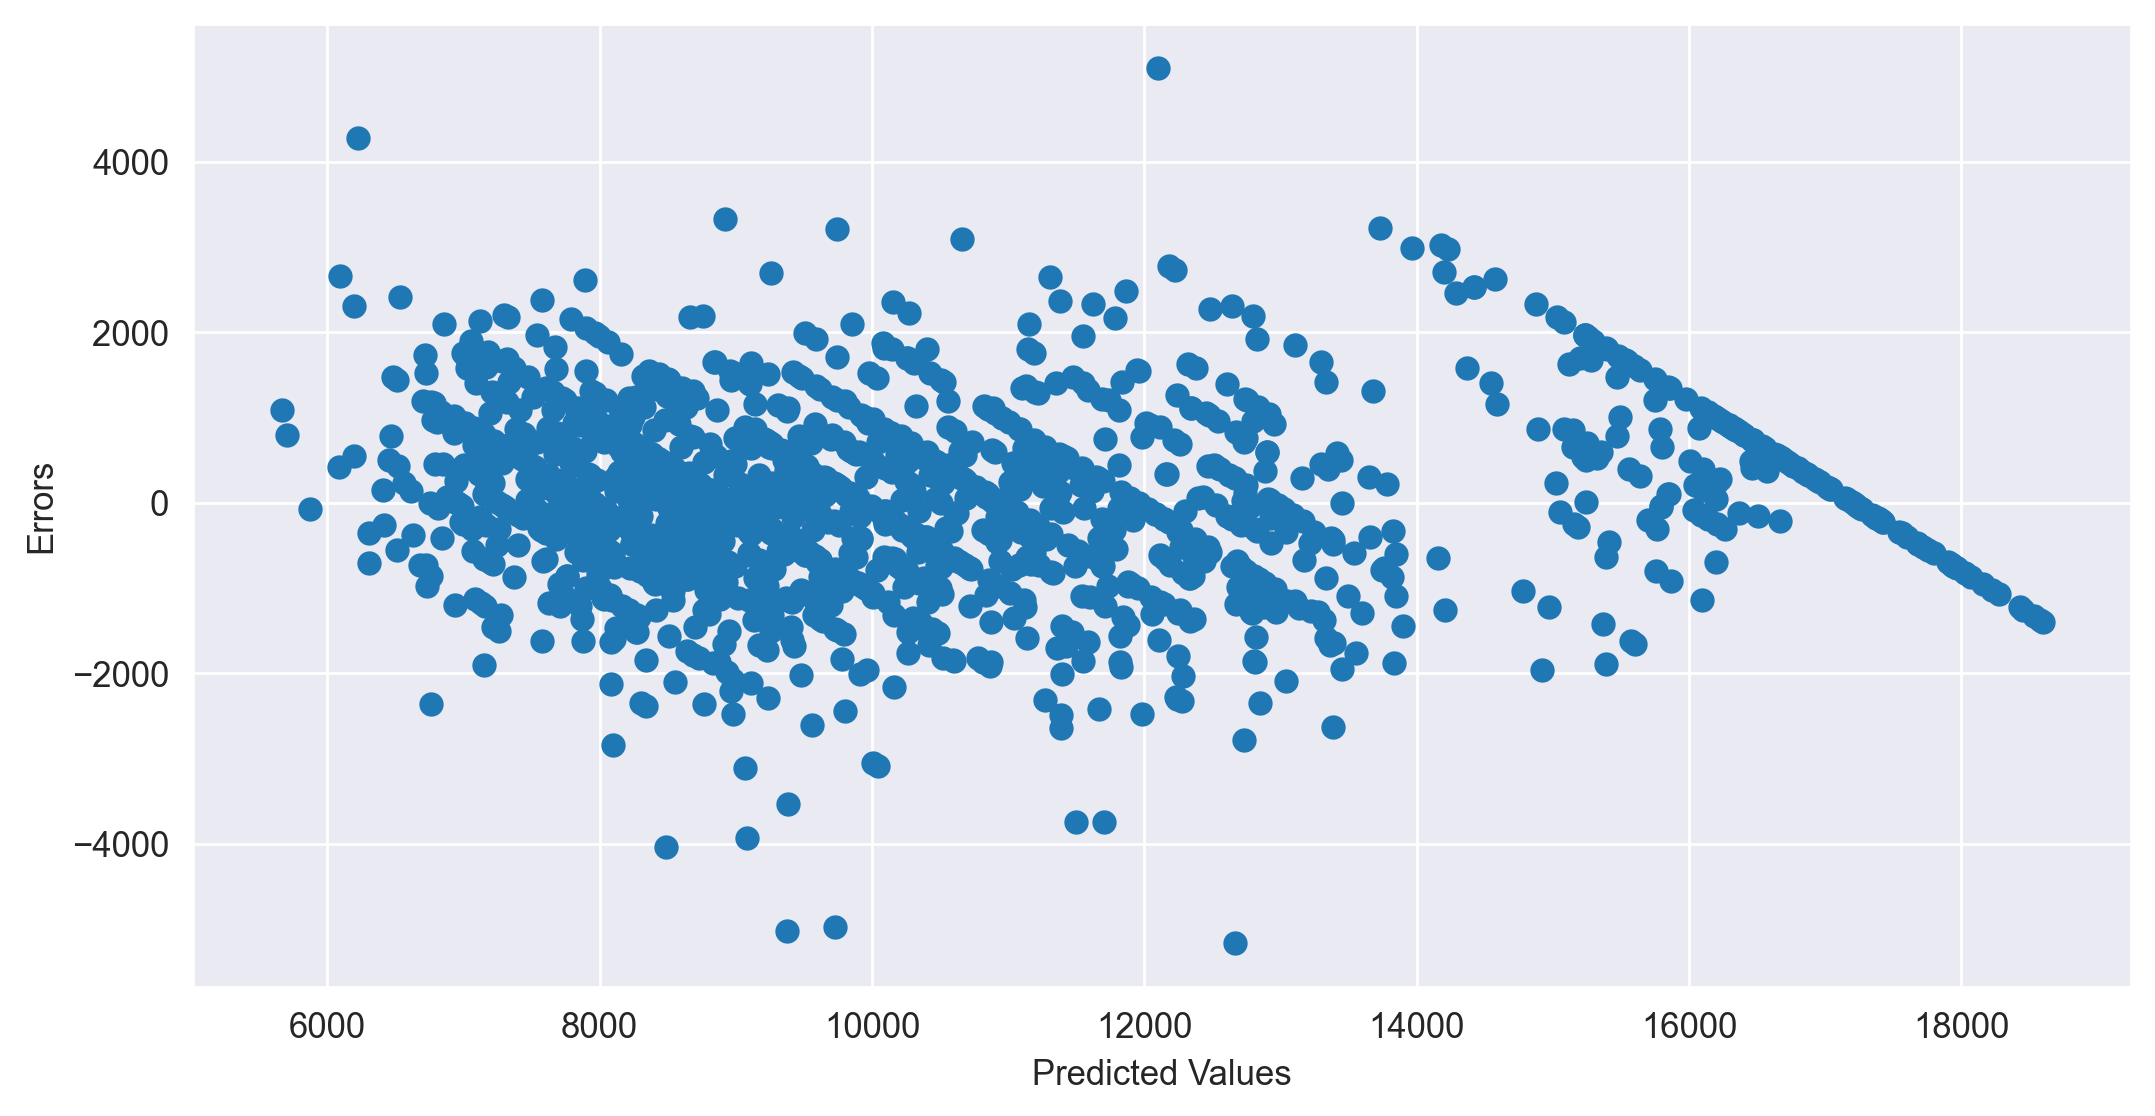

In [179]:
plt.scatter(model1.fittedvalues, model1.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Errors")

# 3.Residual VS Regressor

In [180]:
data

Age     KM   HP    CC  Doors  Gears  Quartely  Weight
0      23  46986   90  1900      3      5       109  1152.5
1      23  72937   90  1900      3      5       109  1152.5
2      24  41711   90  1900      3      5       109  1152.5
3      26  48000   90  1900      3      5       109  1152.5
4      30  38500   90  1900      3      5       109  1152.5
...   ...    ...  ...   ...    ...    ...       ...     ...
1430   69  20544   86  1300      3      5        69  1025.0
1431   72  19000   86  1300      3      5        69  1015.0
1432   71  17016   86  1300      3      5        69  1015.0
1433   70  16916   86  1300      3      5        69  1015.0
1434   76      1  110  1600      5      5        45  1114.0

[1435 rows x 8 columns]

In [181]:
sm.graphics.plot_fit(model1,'Age');

In [182]:
sm.graphics.plot_fit(model1,'KM');

In [183]:
sm.graphics.plot_fit(model1,'HP');

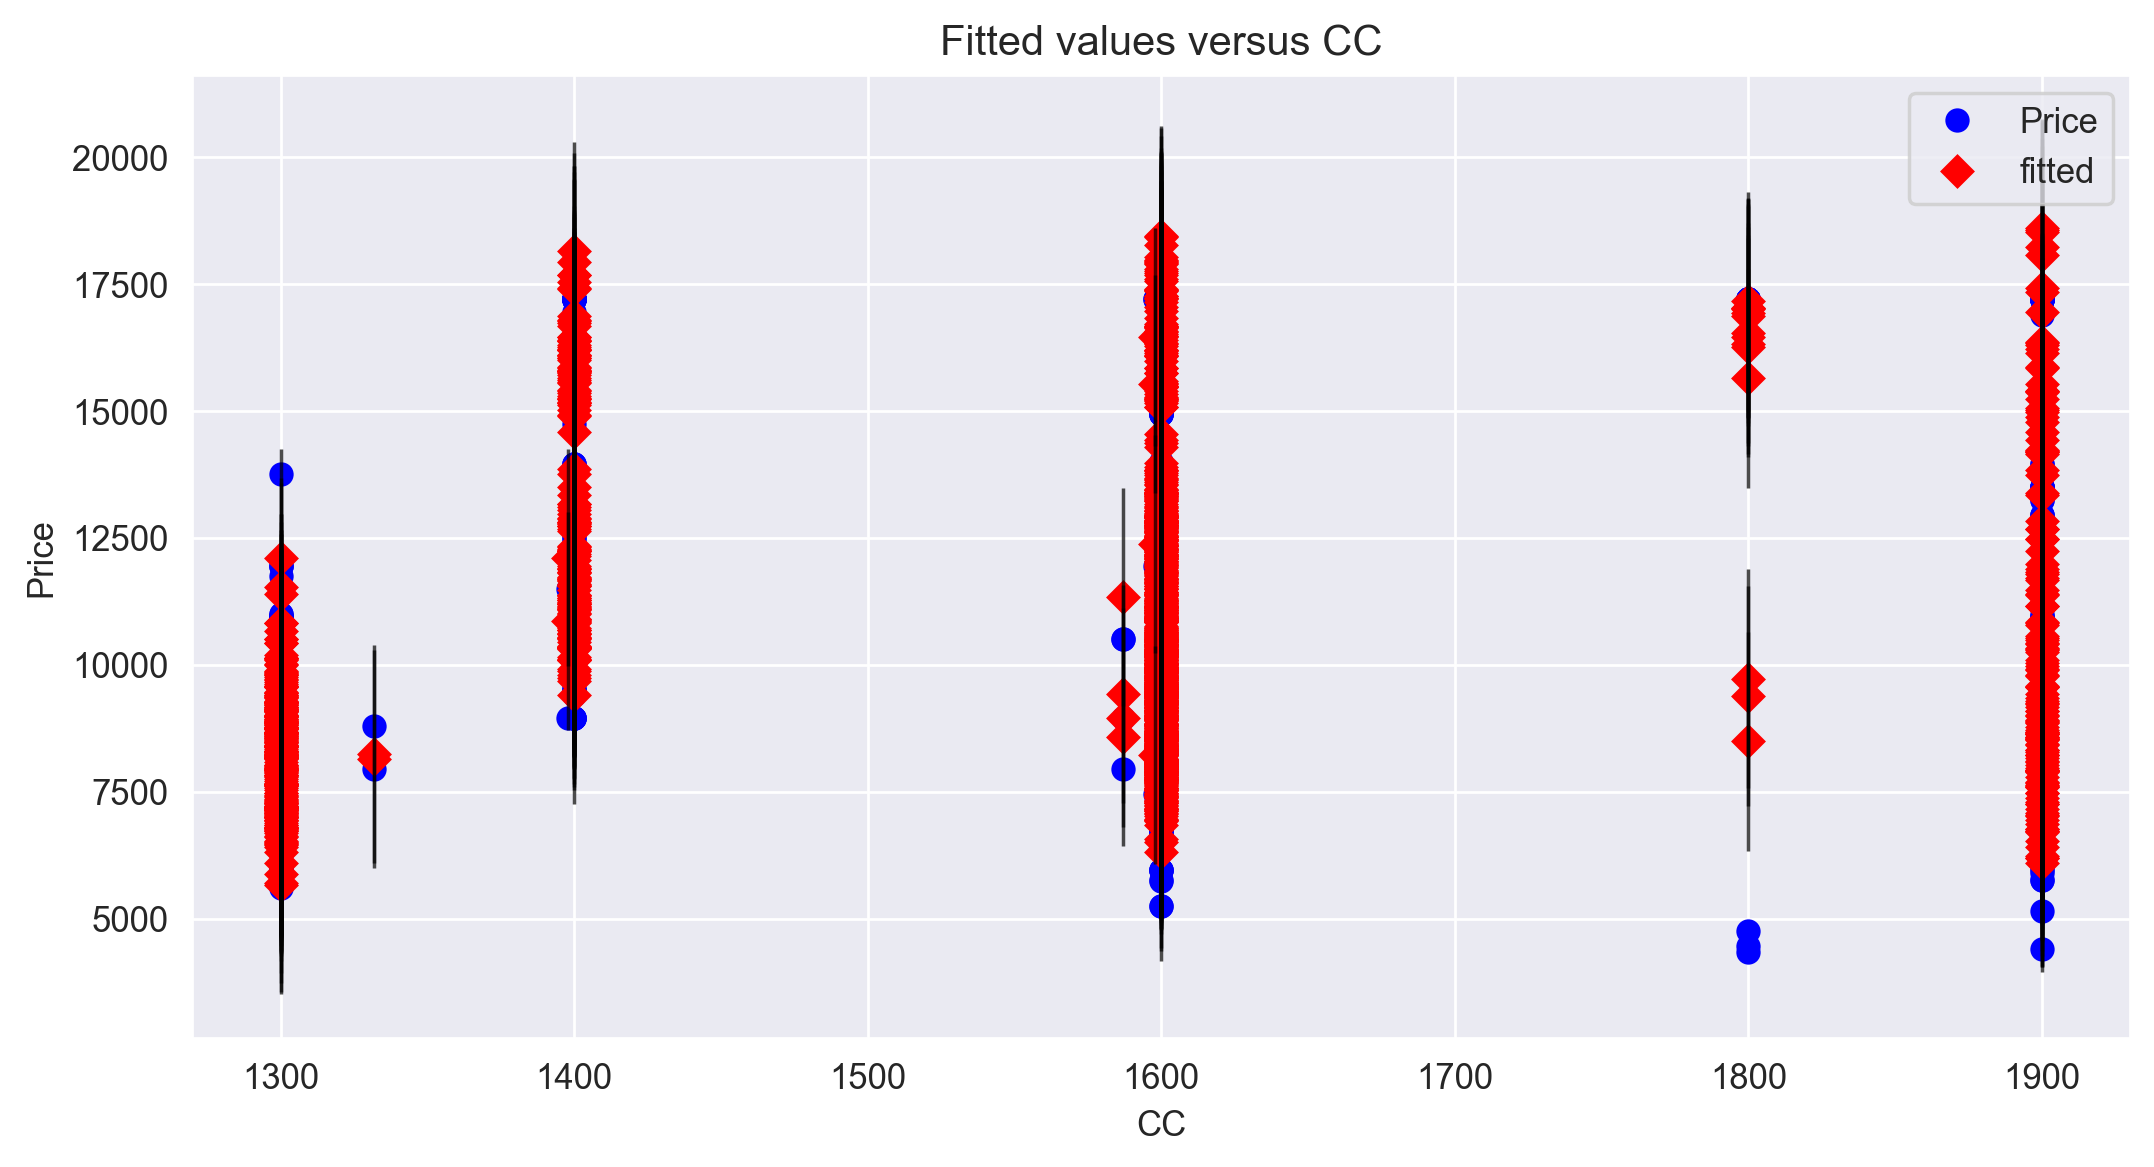

In [184]:
sm.graphics.plot_fit(model1,"CC");

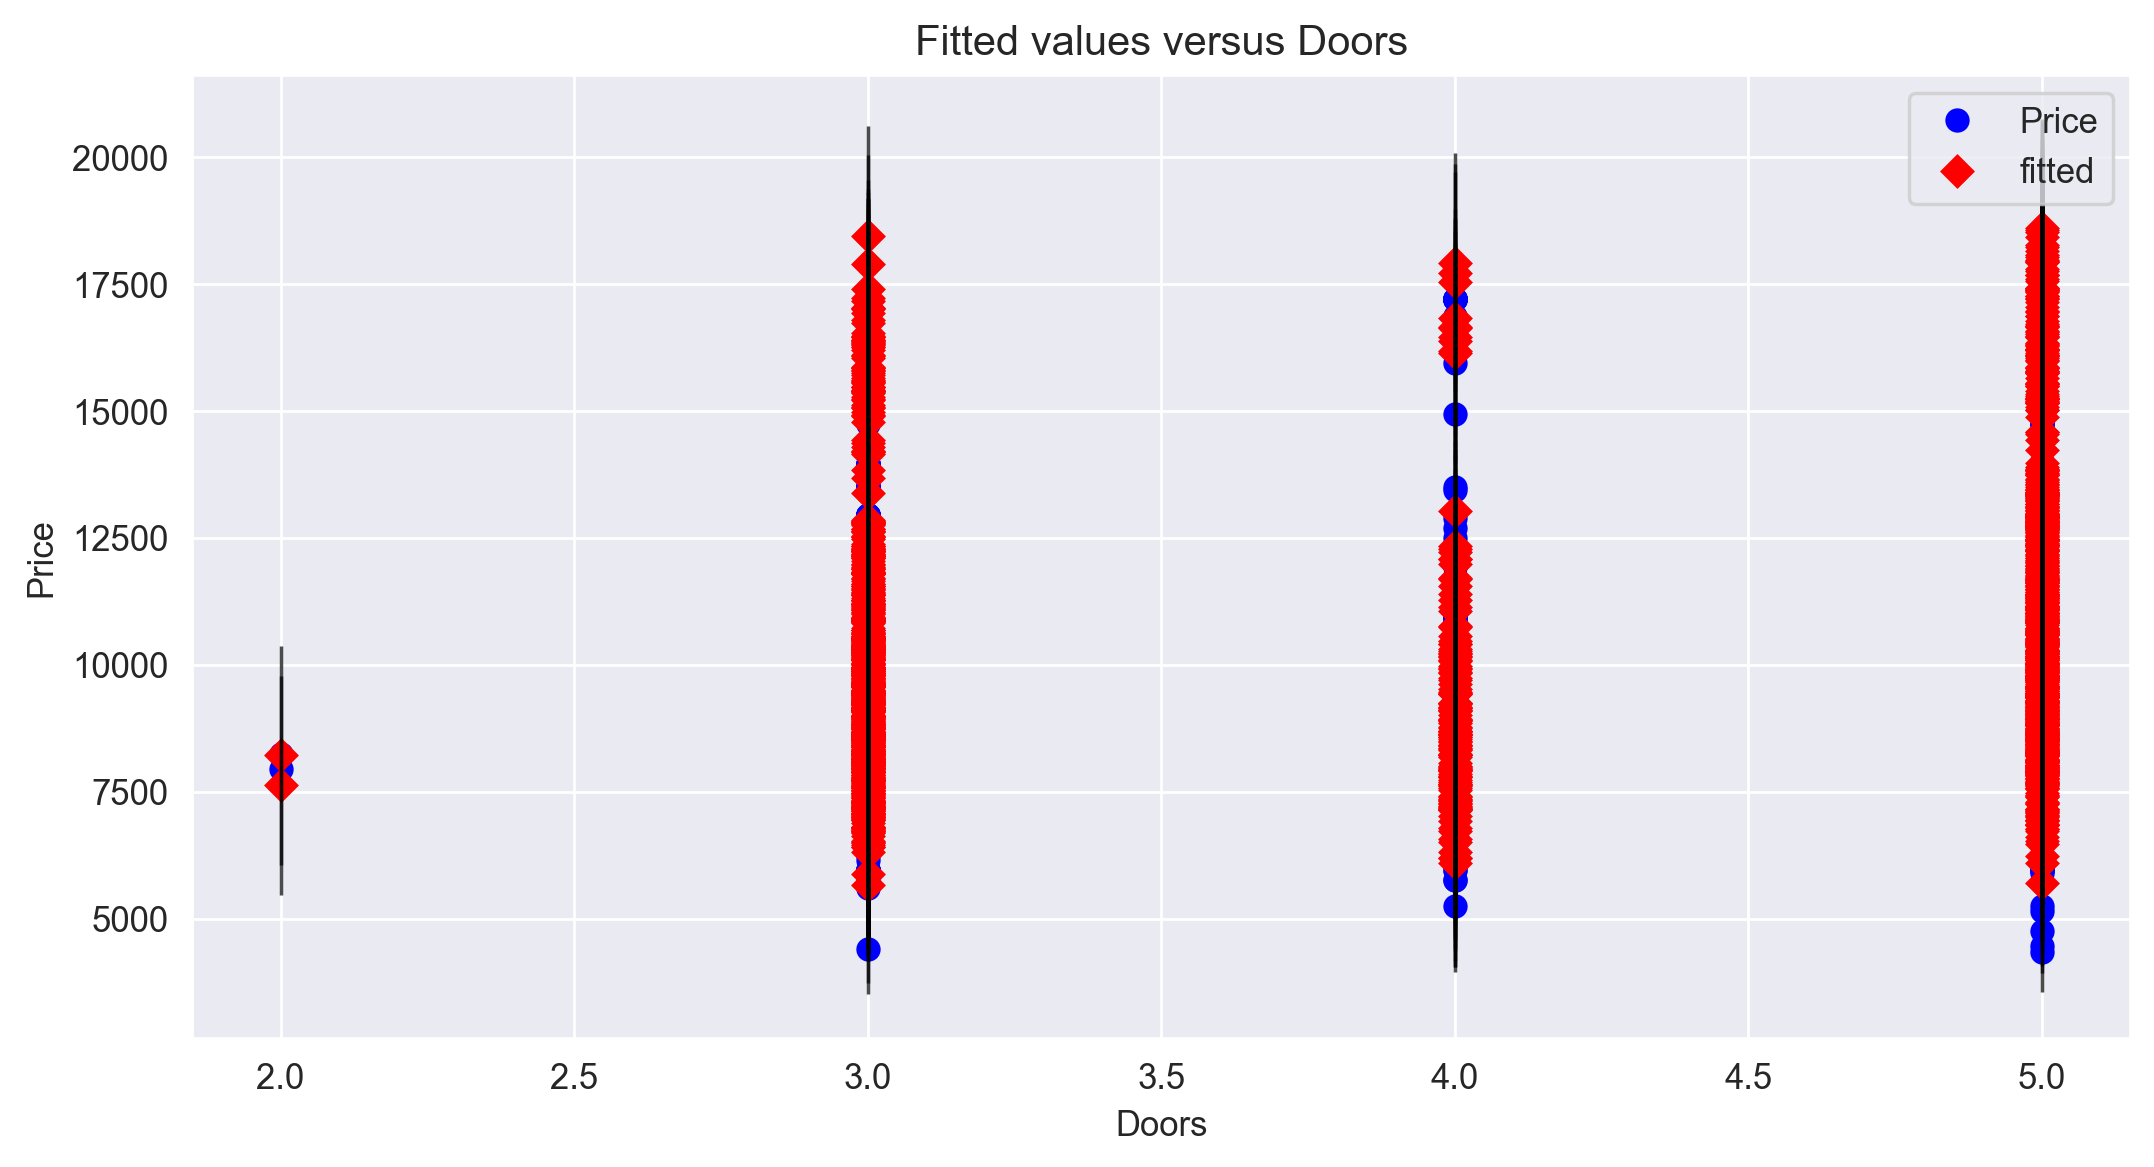

In [185]:
sm.graphics.plot_fit(model1,"Doors");

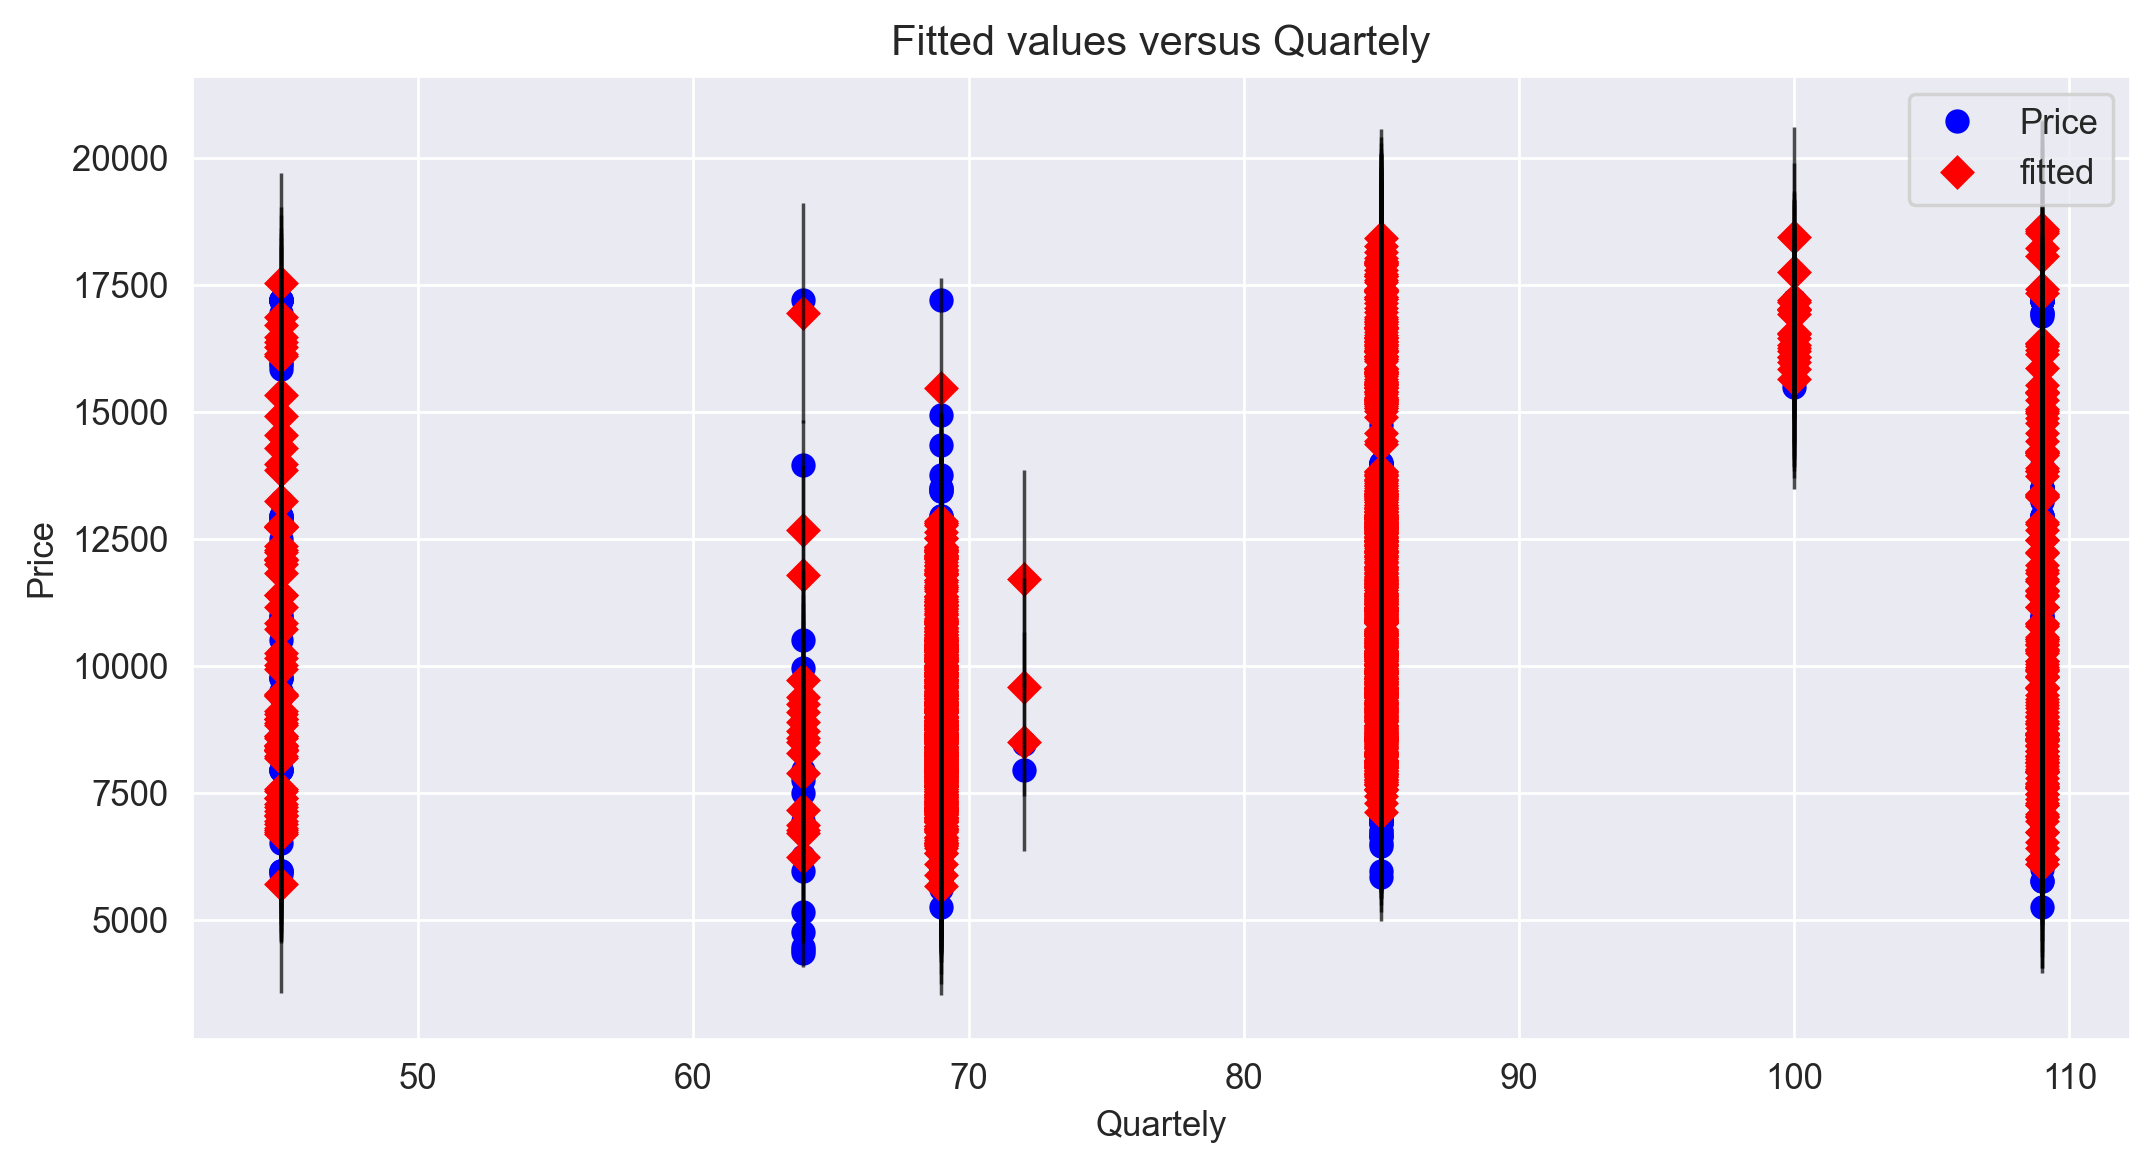

In [187]:
sm.graphics.plot_fit(model1,"Quartely");

In [188]:
sm.graphics.plot_fit(model1,"Weight");

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [189]:
model1

In [190]:
#Find the influence data
inf = model1.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [191]:
c

array([3.42261000e-03, 1.36237036e-03, 1.98142588e-03, ...,
       7.35711879e-05, 2.13234949e-03, 2.53510358e-02])

Text(0, 0.5, 'Cooks Distance')

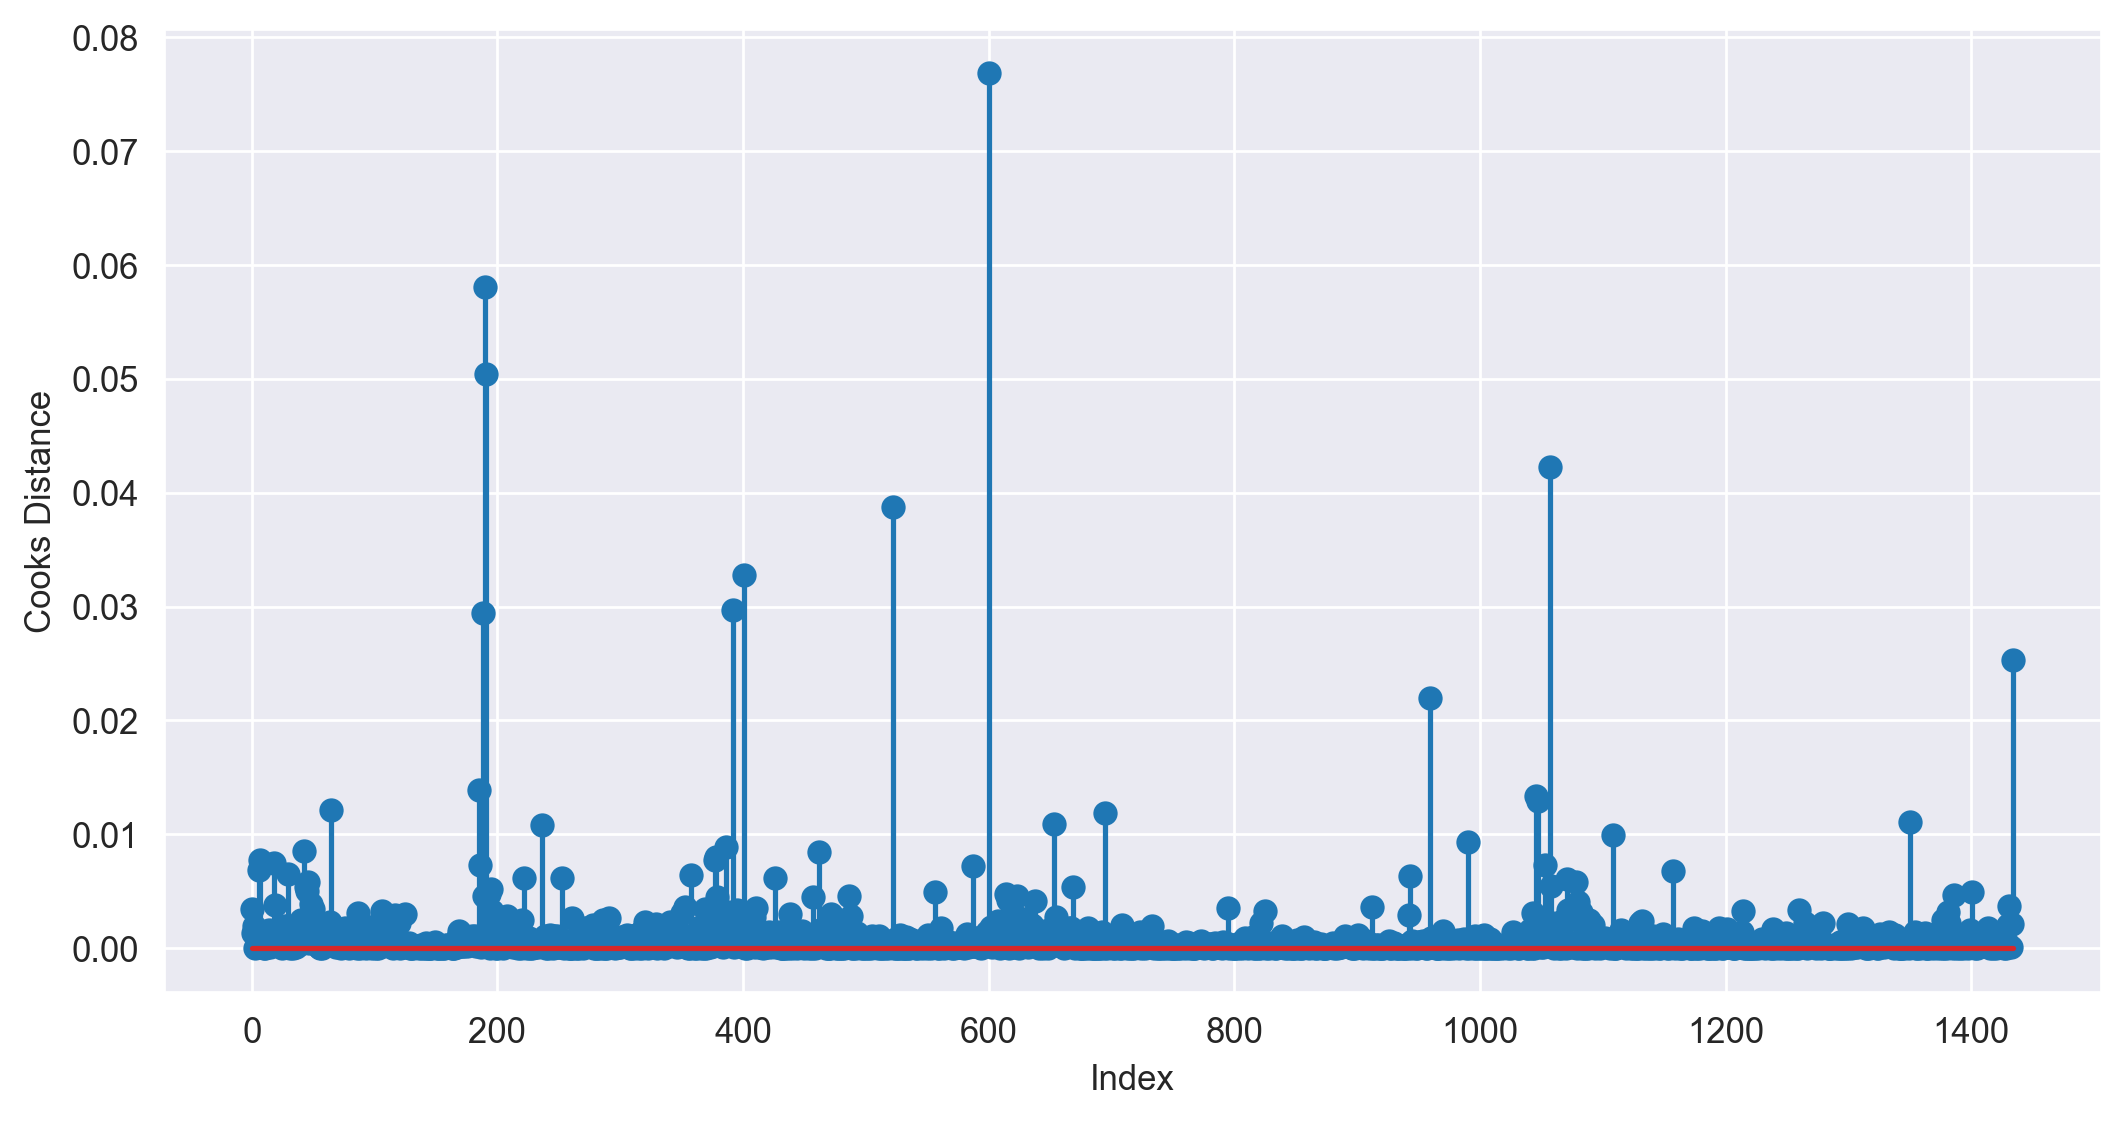

In [192]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

# As shown in the above cook distance map, no values are greater than one. As a result, there are no data points indicating influence.

In [193]:
np.argmax(c), np.max(c)

(600, 0.0768733552189867)

# Influence Plot

In [194]:
from statsmodels.graphics.regressionplots import influence_plot

In [195]:
influence_plot(model1);

# Calculate cutoff

In [196]:
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.08147632311977716

In [199]:
influence_plot(model1)
plt.axvline(lv, linestyle = '--', color = 'red')

In [201]:
final_model = smf.ols("Price~Age+KM+HP+CC+Doors+Quartely+Weight", data= car).fit()

In [211]:
final_model.rsquared

0.8661808932589645

In [202]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1320.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:01:36   Log-Likelihood:                -12071.
No. Observations:                1435   AIC:                         2.416e+04
Df Residuals:                    1427   BIC:                         2.420e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4610.8581   1378.565     -3.345      0.001   -7315.089   -1906.627
Age         -106.1905      2.266    -46.862      0.000    -110.636    -101.745
KM            -0.0161      0.001    -13.935      0.000      -0.018      -0.014
HP            29.2491      2.516     11.625      0.000      24.314      34.185
CC            -2.6973      0.295     -9.146      0.000      -3.276      -2.119
Doors       -108.6891     34.449     -3.155      0.002    -176.265     -41.113
Quartely      13.5611      2.739      4.950      0.000       8.187      18.935
Weight        21.2916      1.530     13.913      0.000      18.290      24.293
==============================================================================
Omnibus:                       52.544   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.555
Skew:                          -0.115   Prob(JB):                     3.67e-30
Kurtosis:                       4.488   Cond. No.                     3.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# See the above R and R Square values there are 0.866 values which good sing the model is performing is well.

# Predicting values for final_model

In [206]:
predicated = pd.DataFrame()
predicated["Age"] = car.Age
predicated["KM"] = car.KM
predicated["HP"] = car.HP
predicated["CC"] = car.CC
predicated["Doors"] = car.Doors
predicated["Quartely"] = car.Quartely
predicated["Weight"] = car.Weight
predicated["Price"] = car.Price
predicated["Predicated_Price"] = pd.DataFrame(final_model.predict(predicated[['Age', 'KM', 'HP', 'CC', 'Doors', 'Quartely', 'Weight']]))
predicated

Age     KM   HP    CC  Doors  Quartely  Weight  Price  Predicated_Price
0      23  46986   90  1900      3       109  1152.5  13500      15390.314780
1      23  72937   90  1900      3       109  1152.5  13750      14973.484398
2      24  41711   90  1900      3       109  1152.5  13950      15368.852408
3      26  48000   90  1900      3       109  1152.5  14950      15055.456129
4      30  38500   90  1900      3       109  1152.5  13750      14783.285019
...   ...    ...  ...   ...    ...       ...     ...    ...               ...
1430   69  20544   86  1300      3        69  1025.0   7500       9174.506807
1431   72  19000   86  1300      3        69  1015.0  10845       8667.819638
1432   71  17016   86  1300      3        69  1015.0   8500       8805.877584
1433   70  16916   86  1300      3        69  1015.0   7250       8913.674328
1434   76      1  110  1600      5        45  1114.0   6950      10006.044089

[1435 rows x 9 columns]

In [207]:
Log_model = smf.ols("np.log(Price)~np.log(Age+KM+HP+CC+Doors+Quartely+Weight)", data= car).fit()
Log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     953.6
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          6.26e-161
Time:                        14:15:06   Log-Likelihood:                 214.38
No. Observations:                1435   AIC:                            -424.8
Df Residuals:                    1433   BIC:                            -414.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 12.2228      0.097    125.559      0.000      12.032      12.414
np.log(Age + KM + HP + CC + Doors + Quartely + Weight)    -0.2726      0.009    -30.880      0.000      -0.290      -0.255
==============================================================================
Omnibus:                       36.149   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.128
Skew:                          -0.008   Prob(JB):                     2.42e-18
Kurtosis:                       4.165   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
Squrt_model = smf.ols("np.sqrt(Price)~np.sqrt(Age+KM+HP+CC+Doors+Quartely+Weight)", data= car).fit()
Squrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Price)   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     1029.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          1.26e-170
Time:                        14:16:15   Log-Likelihood:                -5434.3
No. Observations:                1435   AIC:                         1.087e+04
Df Residuals:                    1433   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                 135.5895      1.100    123.287      0.000     133.432     137.747
np.sqrt(Age + KM + HP + CC + Doors + Quartely + Weight)    -0.1329      0.004    -32.079      0.000      -0.141      -0.125
==============================================================================
Omnibus:                       28.889   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.086
Skew:                           0.302   Prob(JB):                     1.08e-07
Kurtosis:                       3.415   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""